##### Target:-
- Need to perform clustering to summarize customer segments.

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

- Dataset:- Customer Personality Analysis.xlsx

In [2]:
#Read Dataset
data = pd.read_excel("Customer personality Analysis.xlsx")
data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04       58       635  ...                  7   
1            1  2014-03-08       38        11  ...                  5   
2            0  2013-08-21       26       426  ...                  4   
3            0  2014-02-10       26        11  ...                  6   
4            0  2014-01-19       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [3]:
#Show all features present in dataset.
pd.set_option('display.max_columns', None)
data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2012-09-04       58       635         88              546   
1            1  2014-03-08       38        11          1                6   
2            0  2013-08-21       26       426         49              127   
3            0  2014-02-10       26        11          4               20   
4            0  2014-01-19       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  2013-06-13       46       709         43              182   
2236         1  2014-06-10       56       406          0               30   
2237         0  2014-01-25       91       908         48              217   
2238         1  2014-01-24        8       428         30              214   
2239         1  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

In [4]:
#Rearranging columns in sequence.
data = data[['ID','Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','Dt_Customer','Recency','Complain','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Z_CostContact','Z_Revenue']]
data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  Complain  MntWines  MntFruits  \
0            0  2012-09-04       58         0       635         88   
1            1  2014-03-08       38         0        11          1   
2            0  2013-08-21       26         0       426         49   
3            0  2014-02-10       26         0        11          4   
4            0  2014-01-19       94         0       173         43   
...        ...         ...      ...       ...       ...        ...   
2235         1  2013-06-13       46         0       709         43   
2236         1  2014-06-10       56         0       406          0   
2237         0  2014-01-25       91         0       908         48   
2238         1  2014-01-24        8         0       428         30   
2239         1  2012-10-15       40         0        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0                 546              172                88            88   
1                   6                2                 1             6   
2                 127              111                21            42   
3                  20               10                 3             5   
4                 118               46                27            15   
...               ...              ...               ...           ...   
2235              182               42               118           247   
2236               30                0                 0             8   
2237              217               32                12            24   
2238              214               80                30            61   
2239               61                2                 1            21   

      NumDealsPurchases  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
0                     3             0             0             0   
1                     2             0             0             0   
2                     1             0             0             0   
3                     2             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  2             0             0             0   
2236                  7             1             0             0   
2237                  1             0             0             0   
2238                  2             0             0             0   
2239                  3             0             0             0   

      AcceptedCmp4  AcceptedCmp5  Response  NumWebPurchases  \
0                0             0         1                8   
1                0             0         0                1   
2                0             0         0                8   
3                0             0         0                2   
4                0             0         0                5   
...            ...           ...       ...              ...   
2235             0             0         0                9   
2236             0             0         0                8   
2237             1

###### EDA

In [5]:
data.shape

(2240, 29)

- Dataset contains 2240 observations and 29 variables.

In [6]:
#Checking Datatypes.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   Complain             2240 non-null   int64         
 10  MntWines             2240 non-null   int64         
 11  MntFruits            2240 non-null   int64         
 12  MntMeatProducts      2240 non-null   int64         
 13  MntFishProducts      2240 non-nul

- Datatypes of all variables are correct.

In [7]:
#Describe numerical variables.
data.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     Complain     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375     0.009375   303.935714    26.302232       166.950000   
std      28.962453     0.096391   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000     0.000000         0.000000   
25%      24.000000     0.000000    23.750000     1.000000        16.000000   
50%      49.000000     0.000000   173.500000     8.000000        67.000000   
75%      74.000000     0.000000   504.250000    33.000000       232.000000   
max      99.000000     1.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count   2240.000000   2240.000000   2240.000000   2240.000000   2240.000000   
mean       0.064286      0.013393      0.072768      0.074554      0.072768   
std        0.245316      0.114976      0.259813      0.262728      0.259813   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count  2240.000000      2240.000000          2240.000000        2240.000000   
mean      0.149107         4.084821             2.662054           5.790179   
std       0.356274         2.778714             2.923101           3.250958   
min       0.000000         0.000000             0.000000           0.000000   
25%       0.000000         2.000000             0.000000           3.000000   
50%       0.000000         4.000000             2.000000           5.000000   
75%       0.000000         6.000000             4.000000           8.000000   
max       1.000000        27.000000            28.000000          13.000000   

       NumWebVisitsMonth  Z_CostContact  Z_Revenue  
count        2240.000000         2240.0     2240.0  
mean            5.316518            3.0       11.0  
std             2.426645            0.0        0.0  
min             0.000000            3.0       11.0  
25%             3.000000            3.0       11.0  
50%             6.000000            3.0       11.0  
75%             7.000000            3.0       11.0  
max            20.000000            3.0       11.0

In [8]:
#Describe categorical variables.
data.describe(include='O')

Education Marital_Status
count         2240           2240
unique           5              8
top     Graduation        Married
freq          1127            864

In [9]:
#Checking null entries
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
Complain                0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
Response                0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Z_CostContact           0
Z_Revenue               0
dtype: int64

In [10]:
#24 Null entries
data[data['Income'].isna()]

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Graduation        Married     NaN        0         0   
319    2863        1970  Graduation         Single     NaN        1         2   
1379  10475        1970      Master       Together     NaN        0         1   
1382   2902        1958  Graduation       Together     NaN        1         1   
1383   4345        1964    2n Cycle         Single     NaN        1         1   
1386   3769        1972         PhD       Together     NaN        1         0   
2059   7187        1969      Master       Together     NaN        1         1   
2061   1612        1981         PhD         Single     NaN        1         0   
2078   5079        1971  Graduation        Married     NaN        1         1   
2079  10339        1954      Master       Together     NaN        0         1   
2081   3117        1955  Graduation         Single     NaN        0         1   
2084   5250        1943      Master          Widow     NaN        0         0   
2228   8720        1978    2n Cycle       Together     NaN        0         0   

     Dt_Customer  Recency  Complain  MntWines  MntFruits  MntMeatProducts  \
10    2013-11-15       11         0         5          5                6   
27    2013-02-20       19         0         5          1                3   
43    2013-11-05       80         0        81         11               50   
48    2014-01-01       96         0        48          5               48   
58    2013-06-17       57         0        11          3               22   
71    2012-09-14       25         0        25          3               43   
90    2012-11-19        4         0       230         42              192   
91    2014-05-27       45         0         7          0                8   
92    2013-11-23       87         0       445         37              359   
128   2013-07-11       23         0       352          0               27   
133   2013-08-11       96         0       231         65              196   
312   2013-06-03       69         0       861        138              461   
319   2013-08-23       67         0       738         20              172   
1379  2013-04-01       39         0       187          5               65   
1382  2012-09-03       87         0        19          4               12   
1383  2014-01-12       49         0         5          1                9   
1386  2014-03-02       17         0        25          1               13   
2059  2013-05-18       52         0       375         42               48   
2061  2013-05-31       82         0        23          0               15   
2078  2013-03-03       82         0        71          1               16   
2079  2013-06-23       83         0       161          0               22   
2081  2013-10-18       95         0       264          0               21   
2084  2013-10-30       75         0       532        126              490   
2228  2012-08-12       53         0        32          2             1607   

      MntFishProducts  MntSweetProducts  MntGoldProds  Nu

<AxesSubplot:xlabel='Income', ylabel='Count'>

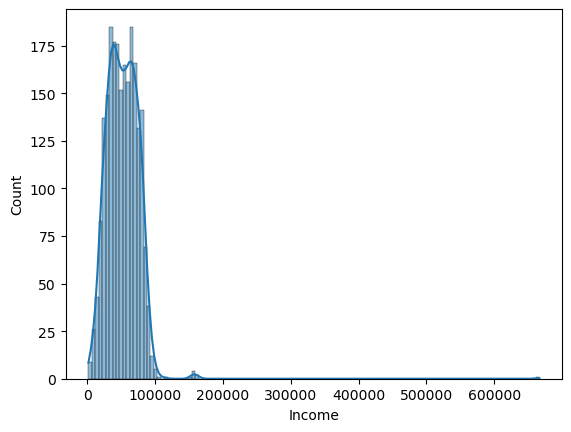

In [11]:
#Checking data is skewed or not.
sns.histplot(data['Income'], kde=True)

In [12]:
#Filling null values with median value because data is skewed.
data['Income'].fillna(data['Income'].median(), inplace=True)

In [13]:
#Recheck null entries
data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
Complain               0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
Response               0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Z_CostContact          0
Z_Revenue              0
dtype: int64

In [14]:
#Checking duplicate entries.
data[data.duplicated()]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, Complain, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Z_CostContact, Z_Revenue]
Index: []

In [15]:
#Checkinh Unique ID numbers.
data['ID'].nunique()

2240

In [16]:
data['Z_CostContact'].unique()

array([3], dtype=int64)

In [17]:
data['Z_Revenue'].unique()

array([11], dtype=int64)

- variable/parametres 'Z_CostContact' & 'Z_Revenue' contains same value for each entry, so they are not helpful for analysis.

In [18]:
#Dropping unneccessory variables.
data.drop(['ID','Z_CostContact','Z_Revenue'], inplace=True, axis=1)
data

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  Complain  MntWines  MntFruits  MntMeatProducts  \
0     2012-09-04       58         0       635         88              546   
1     2014-03-08       38         0        11          1                6   
2     2013-08-21       26         0       426         49              127   
3     2014-02-10       26         0        11          4               20   
4     2014-01-19       94         0       173         43              118   
...          ...      ...       ...       ...        ...              ...   
2235  2013-06-13       46         0       709         43              182   
2236  2014-06-10       56         0       406          0               30   
2237  2014-01-25       91         0       908         48              217   
2238  2014-01-24        8         0       428         30              214   
2239  2012-10-15       40         0        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             1             0             0             0             0   
2237             0             0             0             1             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0            1                8                   10                  4   
1            0                1                    1                  2   
2            0                8                    2                 10   
3            0                

In [19]:
#Correlation between variables.
data.corr()

Year_Birth    Income   Kidhome  Teenhome   Recency  \
Year_Birth             1.000000 -0.160899  0.230176 -0.352111 -0.019871   
Income                -0.160899  1.000000 -0.425326  0.018965 -0.004061   
Kidhome                0.230176 -0.425326  1.000000 -0.036133  0.008827   
Teenhome              -0.352111  0.018965 -0.036133  1.000000  0.016198   
Recency               -0.019871 -0.004061  0.008827  0.016198  1.000000   
Complain              -0.030128 -0.027187  0.040207  0.003138  0.013231   
MntWines              -0.157773  0.576903 -0.496297  0.004846  0.016064   
MntFruits             -0.017917  0.428791 -0.372581 -0.176764 -0.004306   
MntMeatProducts       -0.030872  0.577805 -0.437129 -0.261160  0.023056   
MntFishProducts       -0.041625  0.437564 -0.387644 -0.204187  0.001079   
MntSweetProducts      -0.018133  0.436131 -0.370673 -0.162475  0.022670   
MntGoldProds          -0.061818  0.321938 -0.349595 -0.021725  0.016693   
NumDealsPurchases     -0.060846 -0.082315  0.221798  0.387741 -0.001098   
AcceptedCmp1          -0.005930  0.274891 -0.172339 -0.140090 -0.019283   
AcceptedCmp2          -0.006539  0.087581 -0.081716 -0.015605 -0.001781   
AcceptedCmp3           0.061774 -0.016064  0.014674 -0.042677 -0.032991   
AcceptedCmp4          -0.060510  0.182718 -0.161600  0.038886  0.018826   
AcceptedCmp5           0.007123  0.334893 -0.205634 -0.191050  0.000129   
Response               0.021325  0.132867 -0.080008 -0.154446 -0.198437   
NumWebPurchases       -0.145040  0.380554 -0.361647  0.155500 -0.010726   
NumCatalogPurchases   -0.121275  0.586826 -0.502237 -0.110769  0.025110   
NumStorePurchases     -0.128272  0.526600 -0.499683  0.050695  0.000799   
NumWebVisitsMonth      0.121139 -0.549785  0.447846  0.134884 -0.021445   

                     Complain  MntWines  MntFruits  MntMeatProducts  \
Year_Birth          -0.030128 -0.157773  -0.017917        -0.030872   
Income              -0.027187  0.576903   0.428791         0.577805   
Kidhome              0.040207 -0.496297  -0.372581        -0.437129   
Teenhome             0.003138  0.004846  -0.176764        -0.261160   
Recency              0.013231  0.016064  -0.004306         0.023056   
Complain             1.000000 -0.039007  -0.005166        -0.023483   
MntWines            -0.039007  1.000000   0.389637         0.562667   
MntFruits           -0.005166  0.389637   1.000000         0.543105   
MntMeatProducts     -0.023483  0.562667   0.543105         1.000000   
MntFishProducts     -0.020953  0.399753   0.594804         0.568402   
MntSweetProducts    -0.022485  0.386581   0.567164         0.523846   
MntGoldProds        -0.030861  0.387516   0.392995         0.350609   
NumDealsPurchases    0.000420  0.010940  -0.132114        -0.122415   
AcceptedCmp1        -0.025499  0.354133   0.194748         0.309761   
AcceptedCmp2        -0.011334  0.205907  -0.009773         0.043033   
AcceptedCmp3         0.008415  0.062202   0.014727         0.018272   
AcceptedCmp4        -0.027611  0.373286   0.010152         0.102912   
AcceptedCmp5        -0.009419  0.472613   0.215833         0.373769   
Response            -0.001707  0.247254   0.125289         0.236335   
NumWebPurchases     -0.016310  0.542265   0.296735         0.293761   
NumCatalogPurchases -0.020453  0.635226   0.487917         0.723827   
NumStorePurchases   -0.016524  0.642100   0.461758         0.479659   
NumWebVisitsMonth    0.019769 -0.320653  -0.418383        -0.539470   

                     MntFishProducts  MntSweetProducts  MntGoldProds  \
Year_Birth                 -0.041625         -0.018133     -0.061818   
Income                      0.437564          0.436131      0.321938   
Kidhome                    -0.387644         -0.370673     -0.349595   
Teenhome                   -0.204187         -0.162475     -0.021725   
Recency                     0.001079          0.022670      0.016693   
Complain                   -0.020953         -0.022485     -0.030861   
MntWines   

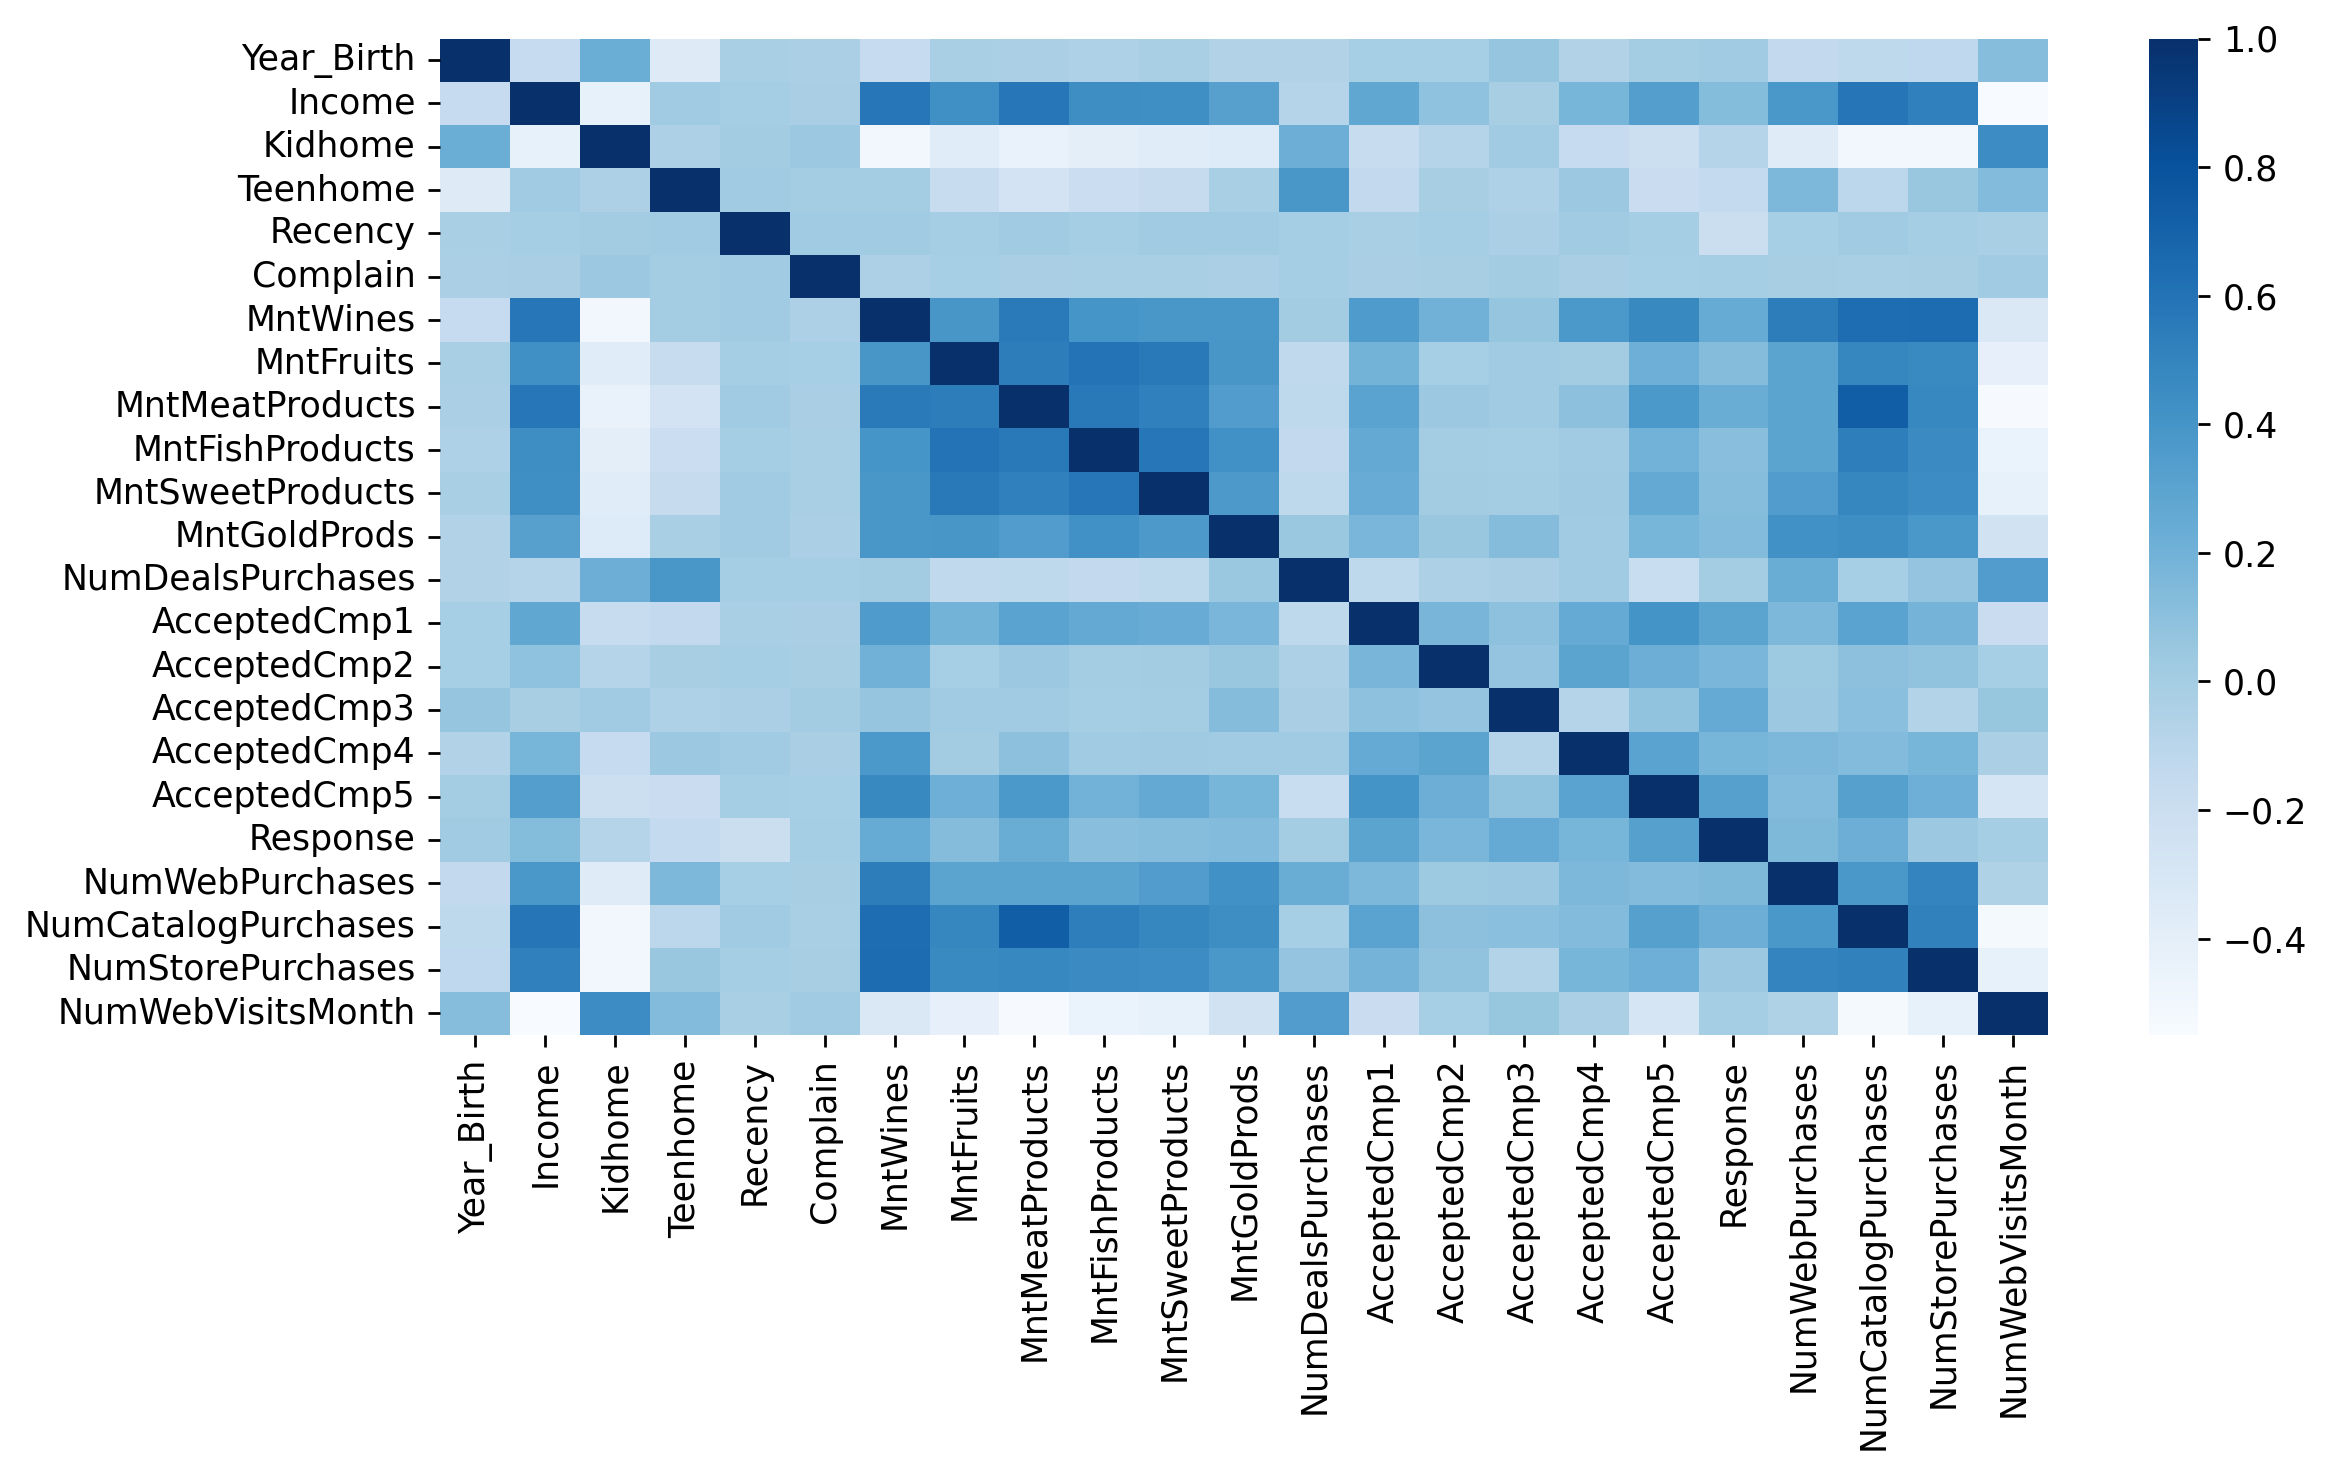

In [20]:
#Heatmap showing correlation between variables.
plt.figure(figsize=(10,6), dpi=250)
sns.heatmap(data.corr(), cmap='Blues')
plt.tight_layout()

######  Visualization

In [21]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

###### Year_Birth

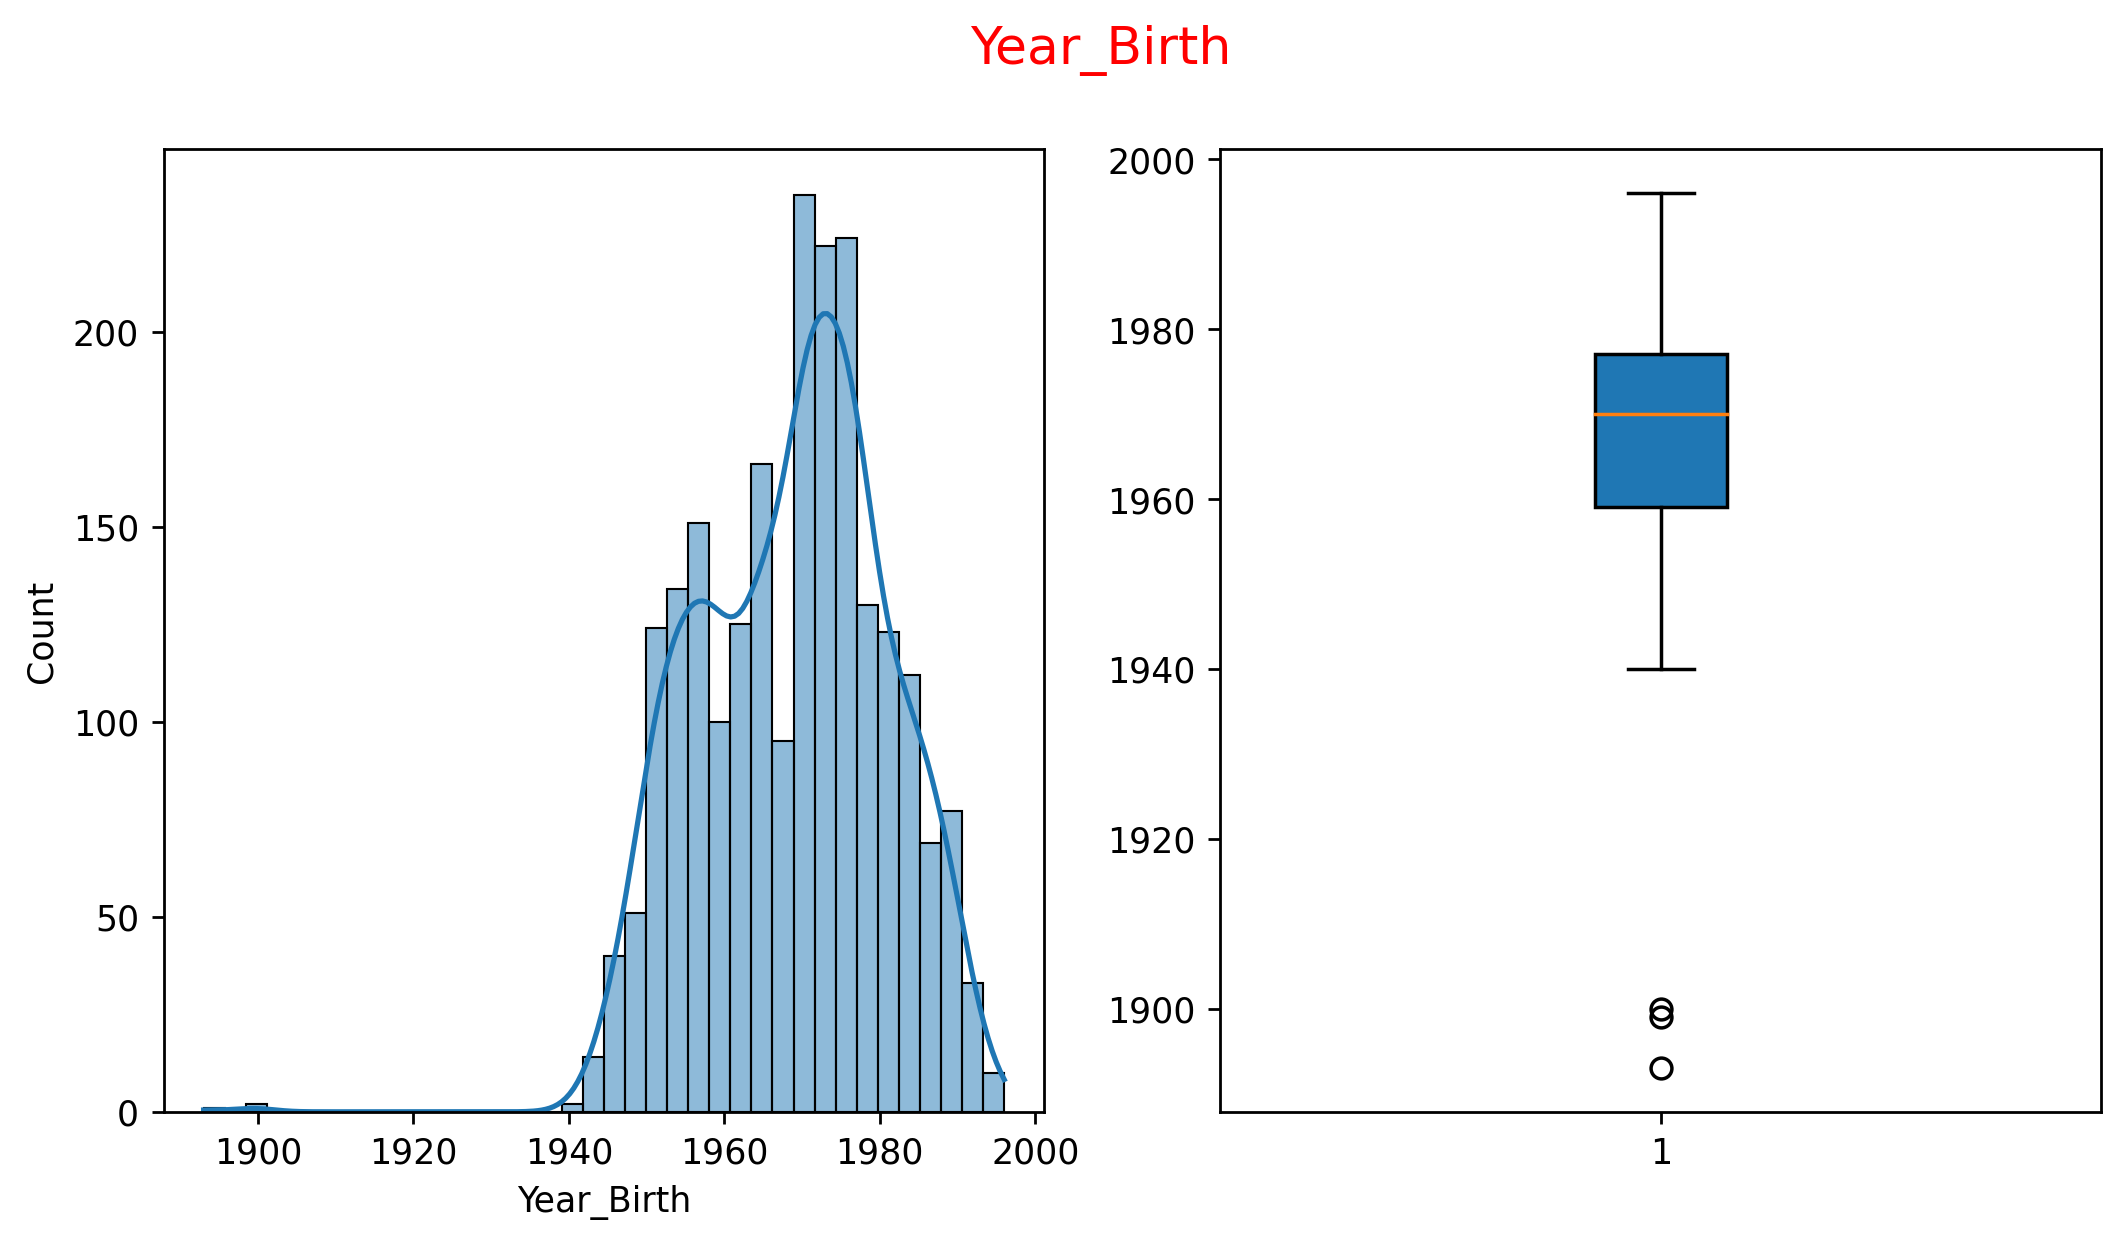

In [22]:
#Checking distribution of data and outliers present in data.
plt.suptitle('Year_Birth', size=15, c='r')
plt.subplot(1,2,1)
sns.histplot(data['Year_Birth'],kde=True)
plt.subplot(1,2,2)
plt.boxplot(data['Year_Birth'], patch_artist=True);

In [23]:
#Customers whose age more than 100 year's(Outliers)
data[data['Year_Birth'] < 1940]

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192        1900  2n Cycle       Divorced  36640.0        1         0   
239        1893  2n Cycle         Single  60182.0        0         1   
339        1899       PhD       Together  83532.0        0         0   

    Dt_Customer  Recency  Complain  MntWines  MntFruits  MntMeatProducts  \
192  2013-09-26       99         1        15          6                8   
239  2014-05-17       23         0         8          0                5   
339  2013-09-26       36         0       755        144              562   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
192                7                 4            25                  1   
239                7                 0             2                  1   
339              104                64           224                  1   

     AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
192             0             0             0             0             0   
239             0             0             0             0             0   
339             0             0             0             0             1   

     Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
192         0                2                    1                  2   
239         0                1                    0                  2   
339         0                4                    6                  4   

     NumWebVisitsMonth  
192                  5  
239                  4  
339                  1

- 3 Outliers are present in Year_Birth variable.

In [24]:
#Drop outliers.
data.drop(labels=[192,239,339], axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)
data

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2232        1967  Graduation        Married  61223.0        0         1   
2233        1946         PhD       Together  64014.0        2         1   
2234        1981  Graduation       Divorced  56981.0        0         0   
2235        1956      Master       Together  69245.0        0         1   
2236        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  Complain  MntWines  MntFruits  MntMeatProducts  \
0     2012-09-04       58         0       635         88              546   
1     2014-03-08       38         0        11          1                6   
2     2013-08-21       26         0       426         49              127   
3     2014-02-10       26         0        11          4               20   
4     2014-01-19       94         0       173         43              118   
...          ...      ...       ...       ...        ...              ...   
2232  2013-06-13       46         0       709         43              182   
2233  2014-06-10       56         0       406          0               30   
2234  2014-01-25       91         0       908         48              217   
2235  2014-01-24        8         0       428         30              214   
2236  2012-10-15       40         0        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2232               42               118           247                  2   
2233                0                 0             8                  7   
2234               32                12            24                  1   
2235               80                30            61                  2   
2236                2                 1            21                  3   

      AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2232             0             0             0             0             0   
2233             1             0             0             0             0   
2234             0             0             0             1             0   
2235             0             0             0             0             0   
2236             0             0             0             0             0   

      Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0            1                8                   10                  4   
1            0                1                    1                  2   
2            0                8                    2                 10   
3            0                

###### Education

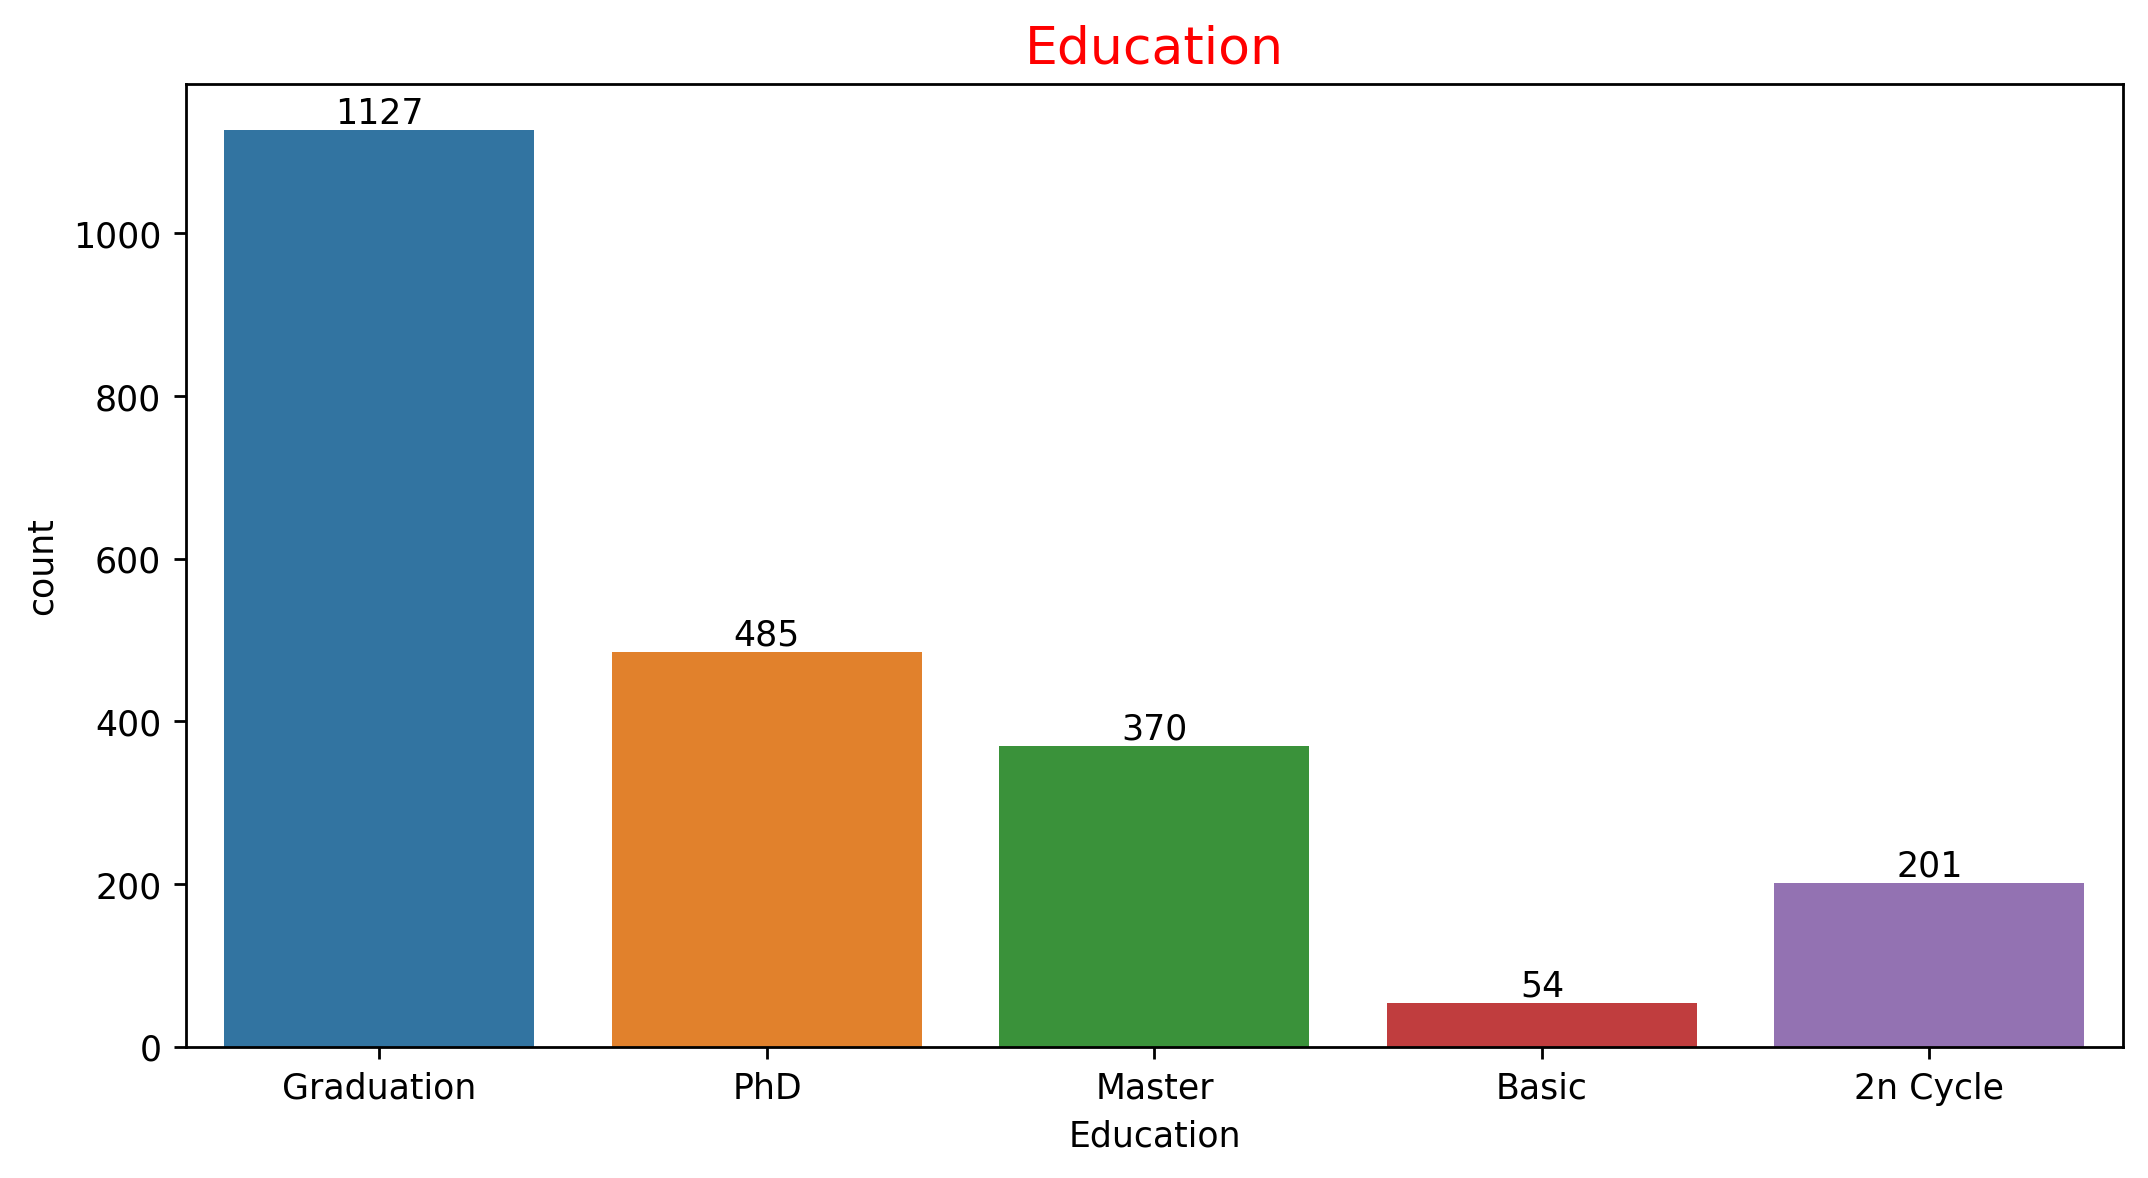

In [25]:
plt.title('Education', size=15, c='r')
ax = sns.countplot('Education', data=data)
ax.bar_label(ax.containers[0]);

###### Marital_Status

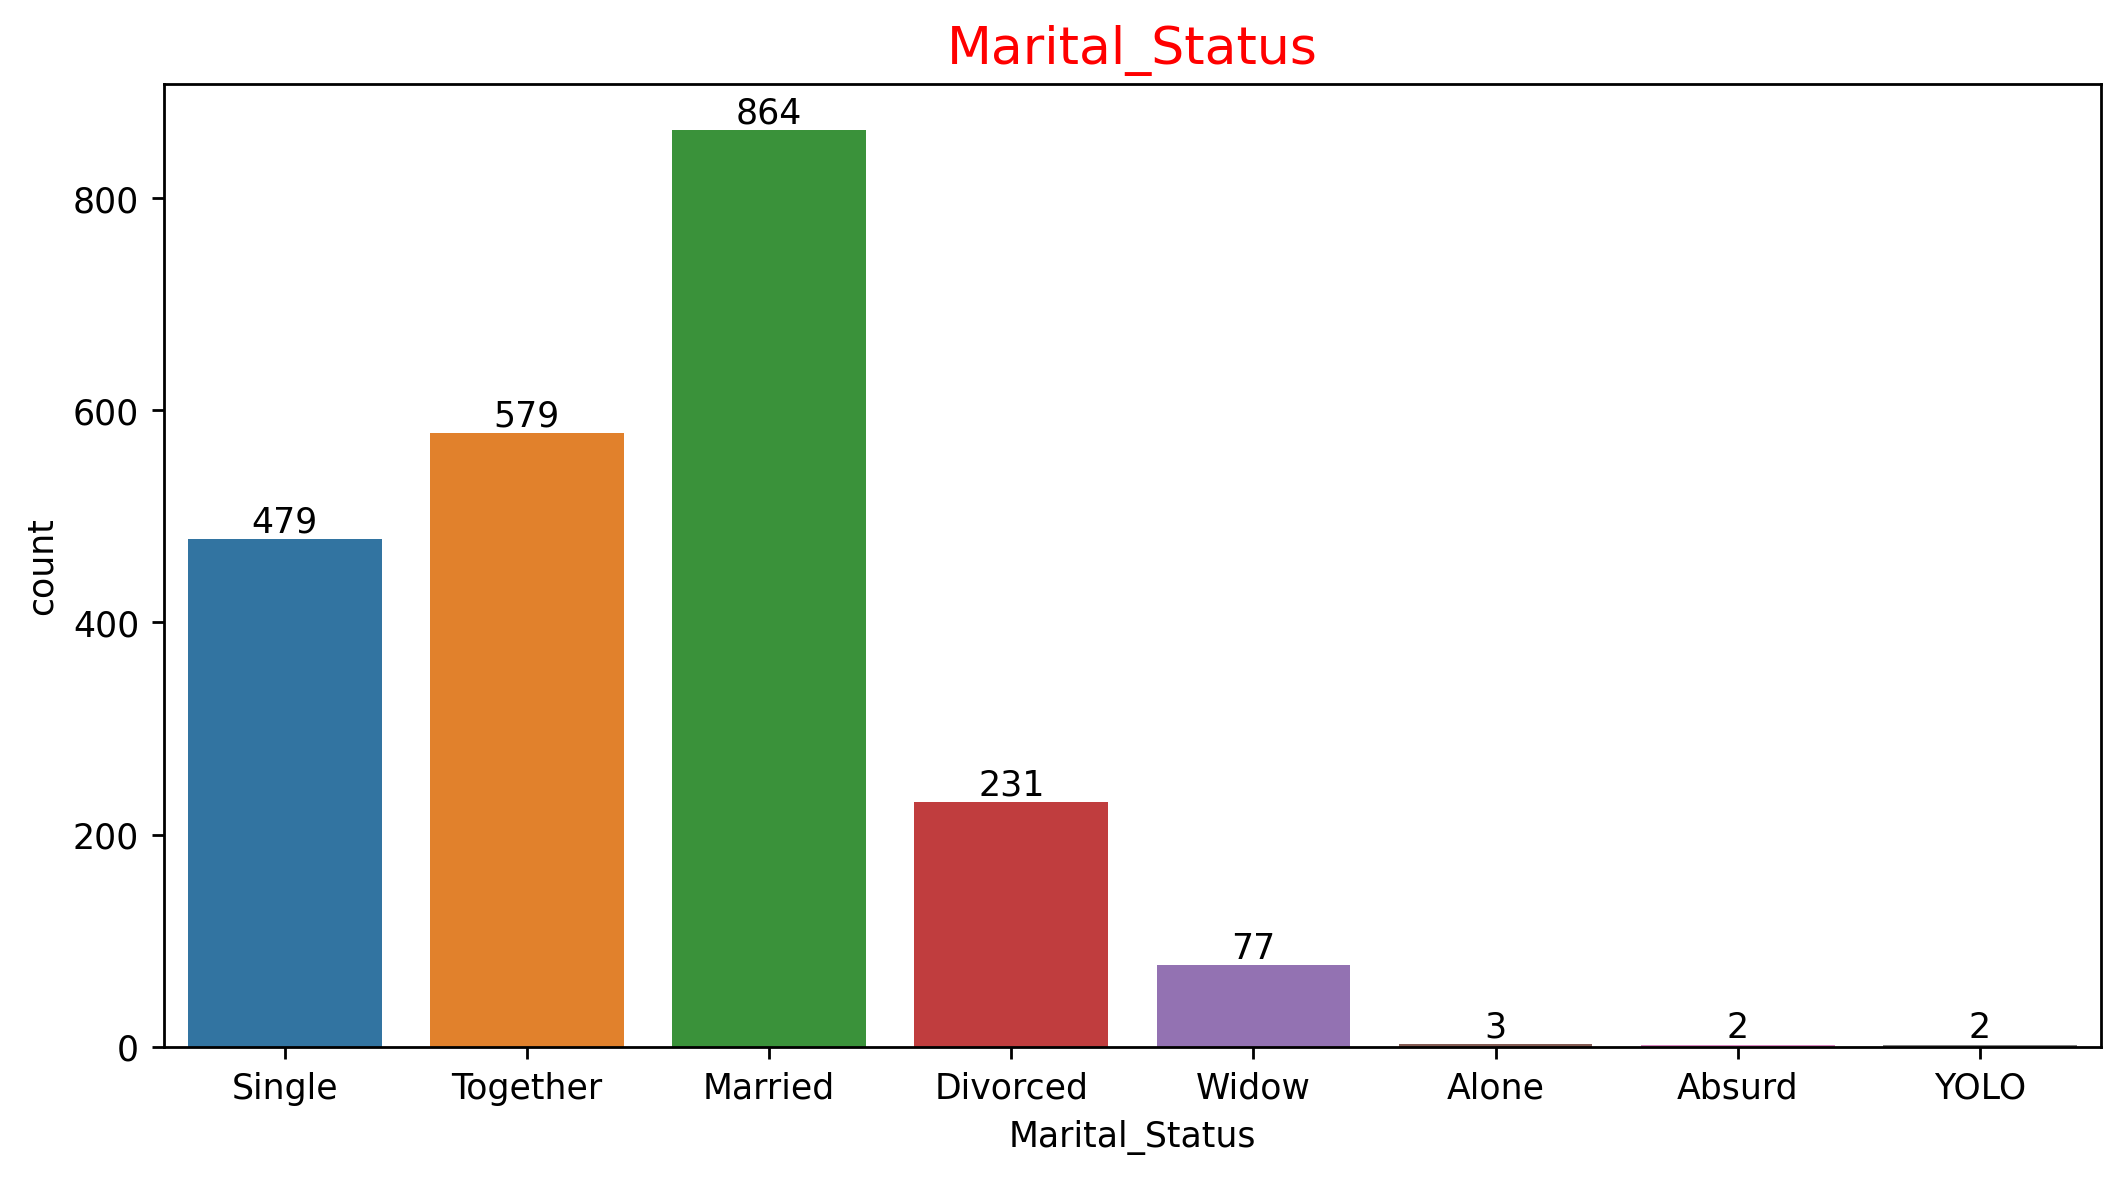

In [26]:
plt.title('Marital_Status', size=15, c='r')
ax = sns.countplot('Marital_Status', data=data)
ax.bar_label(ax.containers[0]);

In [27]:
data[data['Marital_Status'] == 'Alone']

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
131        1958      Master          Alone  61331.0        1         1   
138        1973         PhD          Alone  35860.0        1         1   
153        1988  Graduation          Alone  34176.0        1         0   

    Dt_Customer  Recency  Complain  MntWines  MntFruits  MntMeatProducts  \
131  2013-03-10       42         0       534          5               47   
138  2014-05-19       37         0        15          0                8   
153  2014-05-12       12         0         5          7               24   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
131                0                 5            41                  5   
138                4                 2            20                  2   
153               19                14            20                  4   

     AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
131             0             0             0             0             0   
138             0             0             1             0             0   
153             0             0             0             0             0   

     Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
131         0               11                    1                  6   
138         1                1                    1                  2   
153         0                3                    0                  4   

     NumWebVisitsMonth  
131                  8  
138                  5  
153                  6

In [28]:
data[data['Marital_Status'] == 'Absurd']

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
2090        1993  Graduation         Absurd  79244.0        0         0   
2131        1957      Master         Absurd  65487.0        0         0   

     Dt_Customer  Recency  Complain  MntWines  MntFruits  MntMeatProducts  \
2090  2012-12-19       58         0       471        102              125   
2131  2014-01-10       48         0       240         67              500   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2090              212                61           245                  1   
2131              199                 0           163                  3   

      AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2090             1             0             0             0             1   
2131             0             0             0             0             0   

      Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2090         1                4                   10                  7   
2131         0                3                    5                  6   

      NumWebVisitsMonth  
2090                  1  
2131                  2

In [29]:
data[data['Marital_Status'] == 'YOLO']

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
2174        1973       PhD           YOLO  48432.0        0         1   
2199        1973       PhD           YOLO  48432.0        0         1   

     Dt_Customer  Recency  Complain  MntWines  MntFruits  MntMeatProducts  \
2174  2012-10-18        3         0       322          3               50   
2199  2012-10-18        3         0       322          3               50   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2174                4                 3            42                  5   
2199                4                 3            42                  5   

      AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2174             0             0             0             0             0   
2199             0             0             0             0             0   

      Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2174         0                7                    1                  6   
2199         1                7                    1                  6   

      NumWebVisitsMonth  
2174                  8  
2199                  8

###### Income

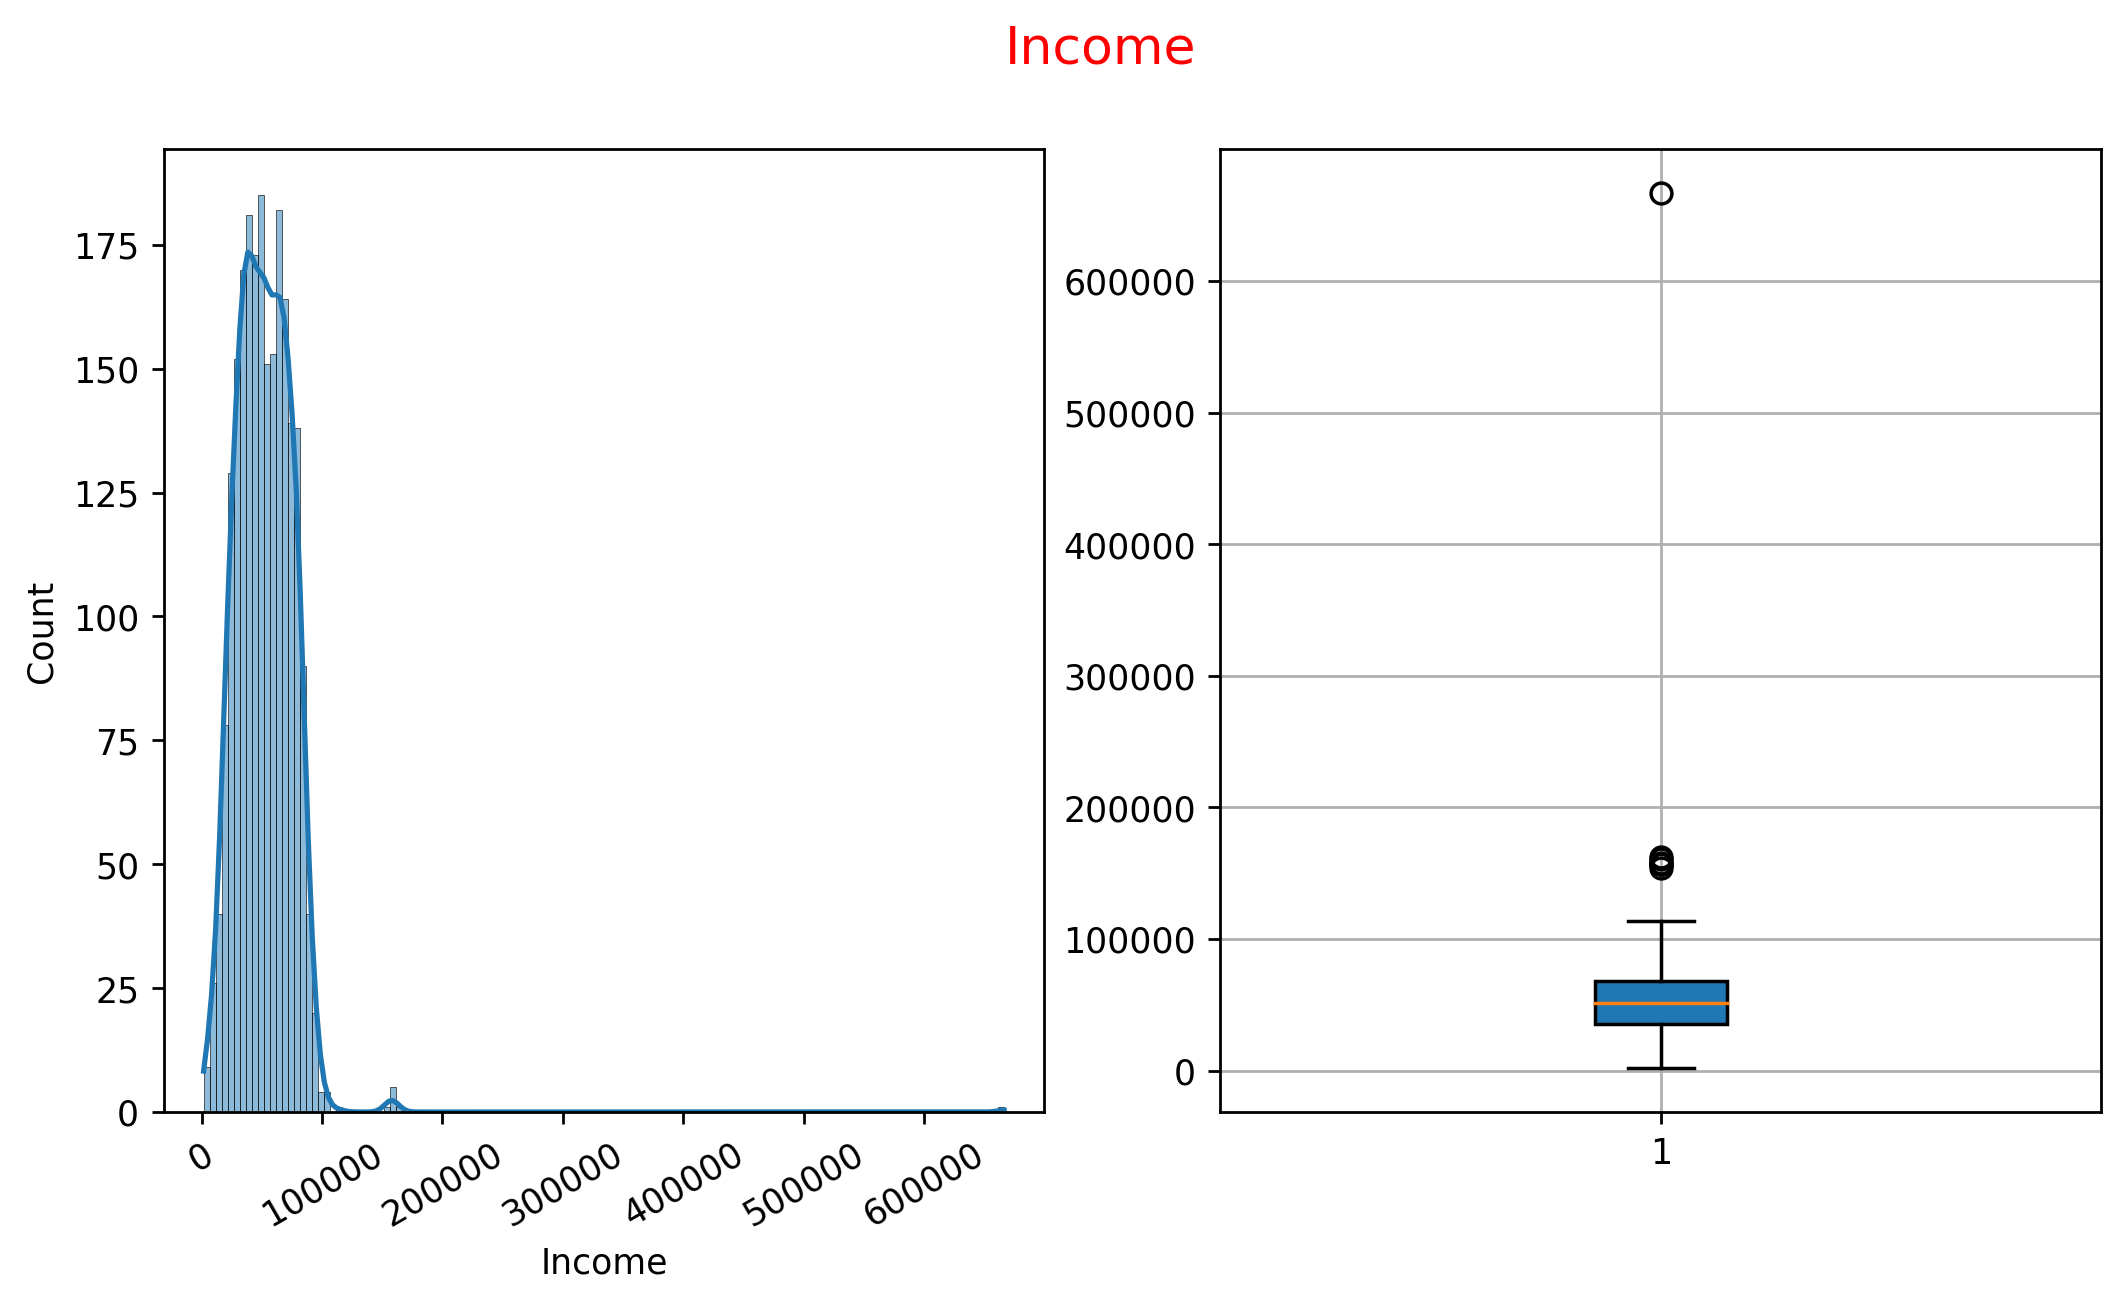

In [30]:
#Checking distribution of data and outlier present in data.
plt.suptitle('Income', size=15, c='r')
plt.subplot(1,2,1)
sns.histplot(data['Income'],kde=True)
plt.xticks(rotation=30);
plt.subplot(1,2,2)
plt.boxplot(data['Income'], patch_artist=True);
plt.grid();

In [31]:
df = data['Income'].groupby(data['Education']).agg(['sum','count'])
df

sum  count
Education                    
2n Cycle     9583960.5    201
Basic        1096538.0     54
Graduation  59401133.5   1127
Master      19571807.5    370
PhD         27179271.5    485

- people with graduation earns more
- Basic earns less

In [32]:
df = data['Income'].groupby(data['Marital_Status']).agg(['sum','count'])
df

sum  count
Marital_Status                   
Absurd            144731.0      2
Alone             131367.0      3
Divorced        12220901.0    231
Married         44687977.5    864
Single          24421061.5    479
Together        30785829.5    579
Widow            4343979.5     77
YOLO               96864.0      2

- Married earn more
- YOLO earn less

In [33]:
#Outliers present in Income Variable.
Income_Out = data[data['Income'] > 120000]
Income_Out

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
164         1973         PhD        Married  157243.0        0         1   
614         1976         PhD       Together  162397.0        1         1   
652         1975  Graduation       Divorced  153924.0        0         0   
684         1982         PhD        Married  160803.0        0         0   
1297        1971      Master       Together  157733.0        1         0   
1650        1977  Graduation       Together  157146.0        0         0   
2129        1949         PhD        Married  156924.0        0         0   
2230        1977  Graduation       Together  666666.0        1         0   

     Dt_Customer  Recency  Complain  MntWines  MntFruits  MntMeatProducts  \
164   2014-03-01       98         0        20          2             1582   
614   2013-06-03       31         0        85          1               16   
652   2014-02-07       81         0         1          1                1   
684   2012-08-04       21         0        55         16             1622   
1297  2013-06-04       37         0        39          1                9   
1650  2013-04-29       13         0         1          0             1725   
2129  2013-08-29       85         0         2          1                2   
2230  2013-06-02       23         0         9         14               18   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
164                 1                 2             1                 15   
614                 2                 1             2                  0   
652                 1                 1             1                  0   
684                17                 3             4                 15   
1297                2                 0             8                  0   
1650                2                 1             1                  0   
2129                1                 1             1                  0   
2230                8                 1            12                  4   

      AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
164              0             0             0             0             0   
614              0             0             0             0             0   
652              0             0             0             0             0   
684              0             0             0             0             0   
1297             0             0             0             0             0   
1650             0             0             0             0             0   
2129             0             0             0             0             0   
2230             0             0             0             0             0   

      Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
164          0                0                   22                  0   
614          0                0                    0                  1   
652          0                0                    0                  0   
684          0                0                   28                  1   
1297         0                1                    0                  1   
1650         0                0                   28                  0   
2129         0                0                    0                  0   
2230         0                3                    1                  3   

      NumWebVisitsMonth  
164                   0  
614                   1  
652                   0  
684                   0  
1297                  1  
1650                  1  
2129                  0  
2230                  6

- 8 outliers present in Income variable.

In [34]:
data['Income'].median()

51381.5

In [35]:
#Imputting outlier by median.
for i in data['Income']:
    if i > 120000:
        data['Income'].replace(i,51381.5, inplace=True)
    continue;

###### Kidhome

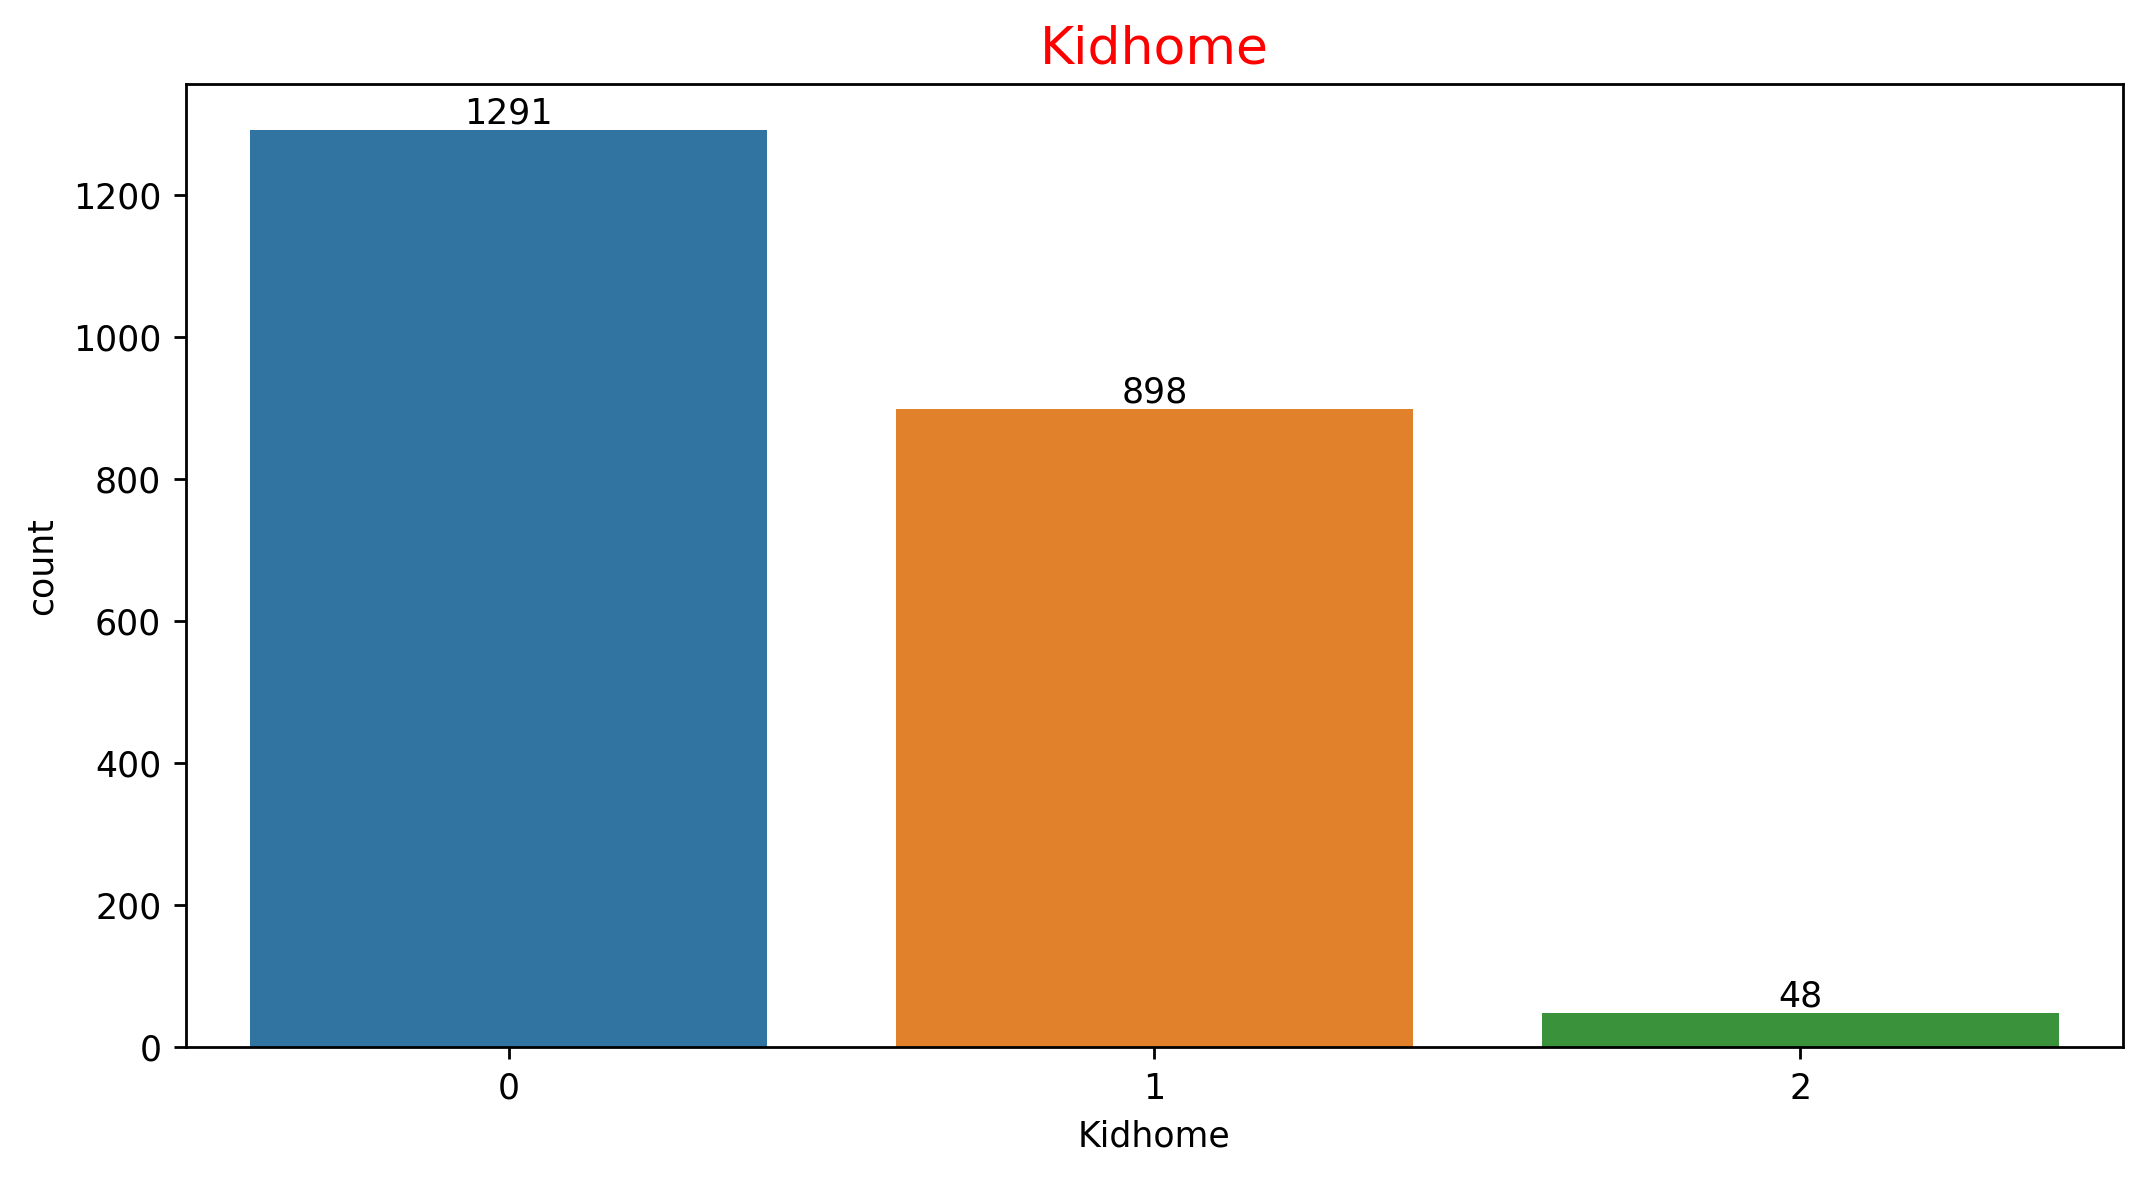

In [36]:
plt.title('Kidhome', size=15, c='r')
ax = sns.countplot('Kidhome', data=data)
ax.bar_label(ax.containers[0]);

In [37]:
#Average amount spend on products.
df = data[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].groupby(data['Kidhome']).mean()
df

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Kidhome                                                            
0        451.281177  39.342370       253.950426        56.163439   
1        104.503341   8.520045        48.907572        12.317372   
2         74.791667   6.770833        33.833333         7.729167   

         MntSweetProducts  MntGoldProds  
Kidhome                                  
0               40.512006     59.955074  
1                8.937639     22.405345  
2                4.708333     17.416667

###### Teenhome

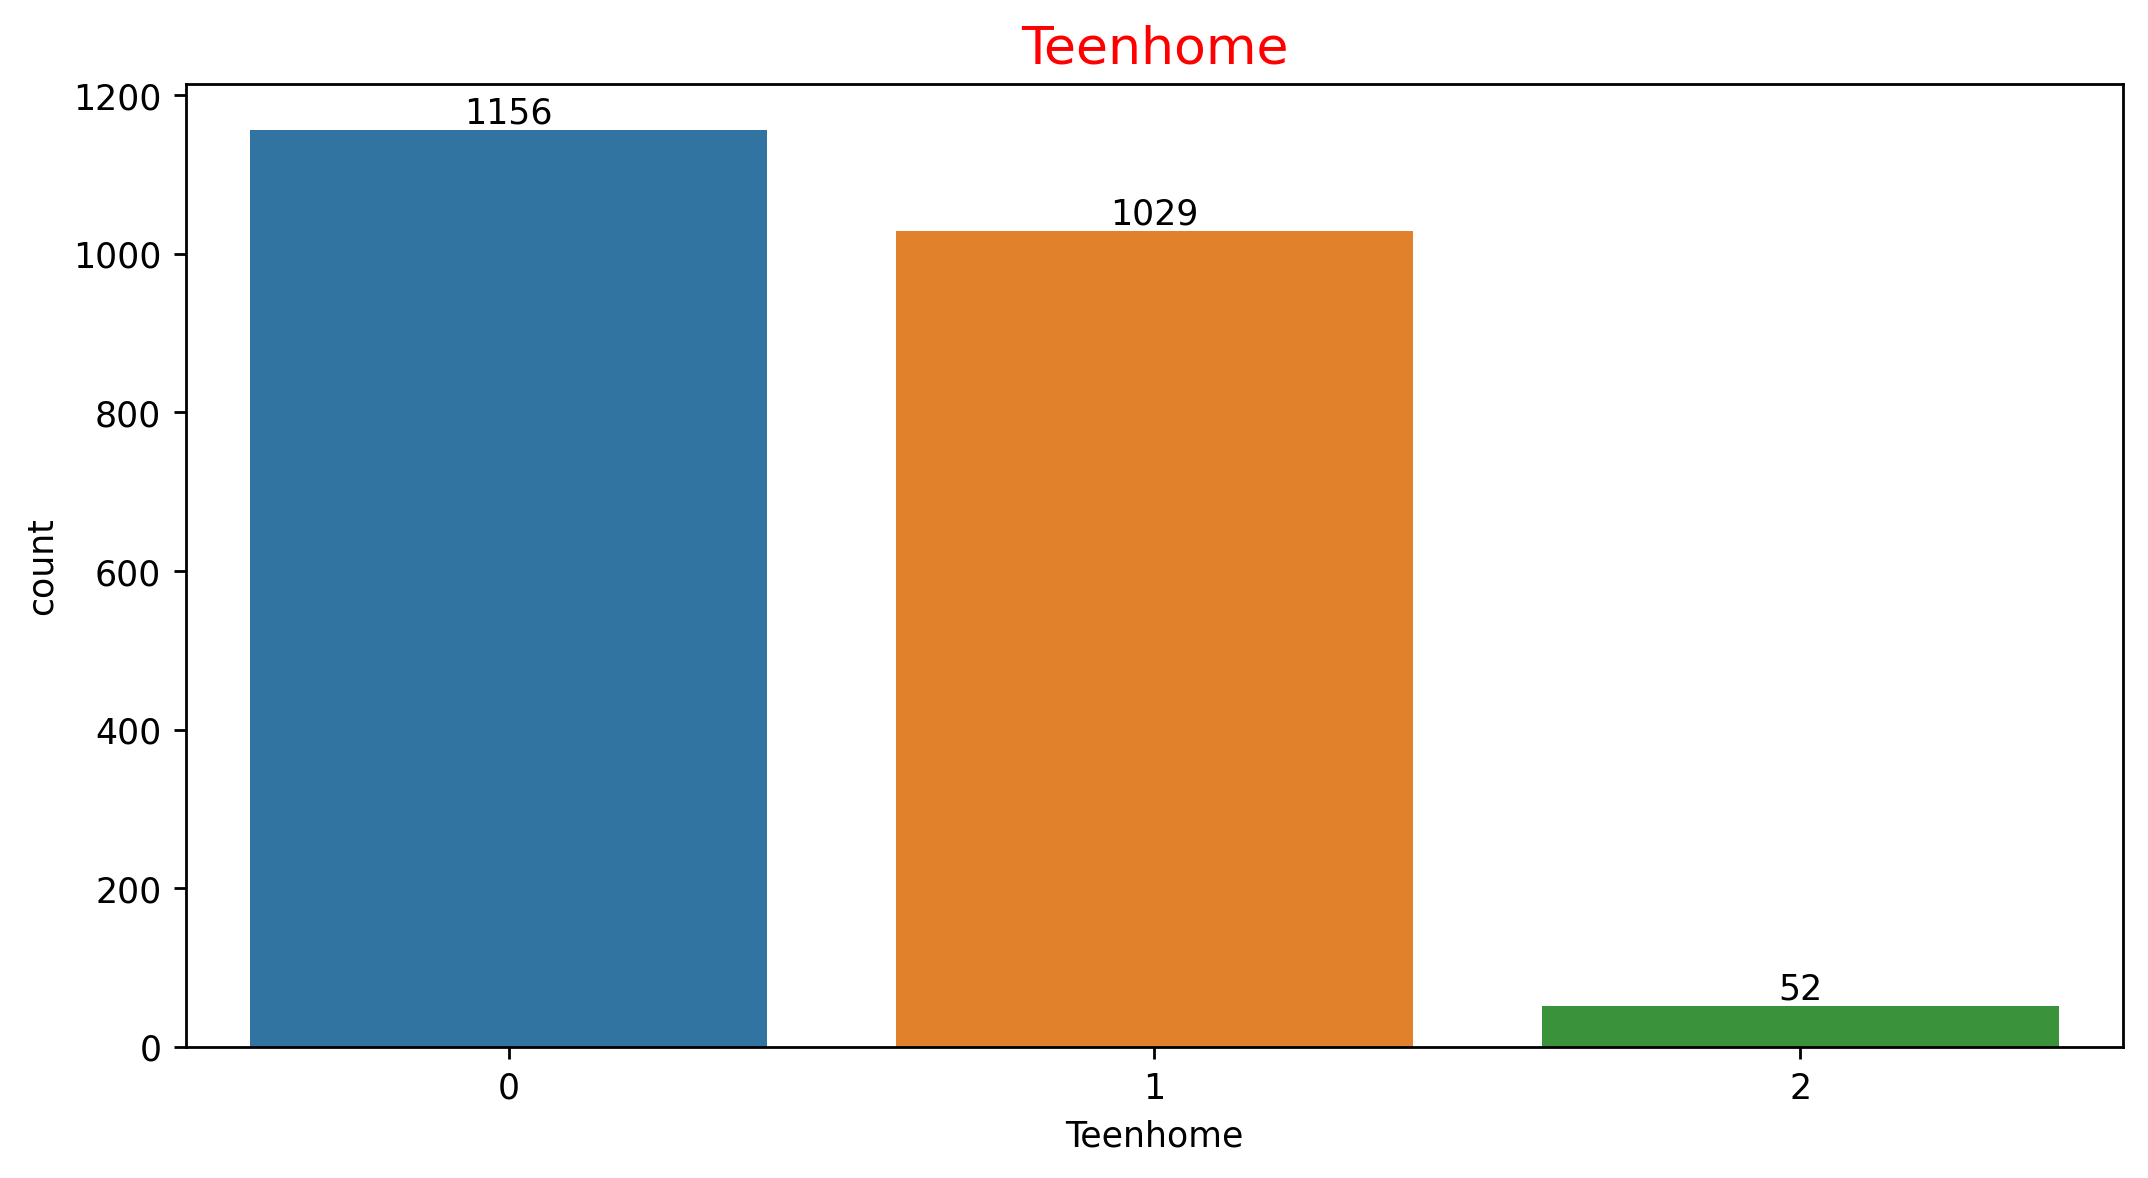

In [38]:
plt.title('Teenhome', size=15, c='r')
ax = sns.countplot('Teenhome', data=data)
ax.bar_label(ax.containers[0]);

In [39]:
#Average amount spend on products.
df = data[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].groupby(data['Teenhome']).mean()
df

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Teenhome                                                            
0         304.684256  33.237889       227.019896        48.646194   
1         300.293489  18.885326       101.525753        25.715258   
2         361.942308  17.519231       124.769231        23.903846   

          MntSweetProducts  MntGoldProds  
Teenhome                                  
0                33.630623     45.119377  
1                20.252672     42.626822  
2                16.076923     44.942308

###### Recency

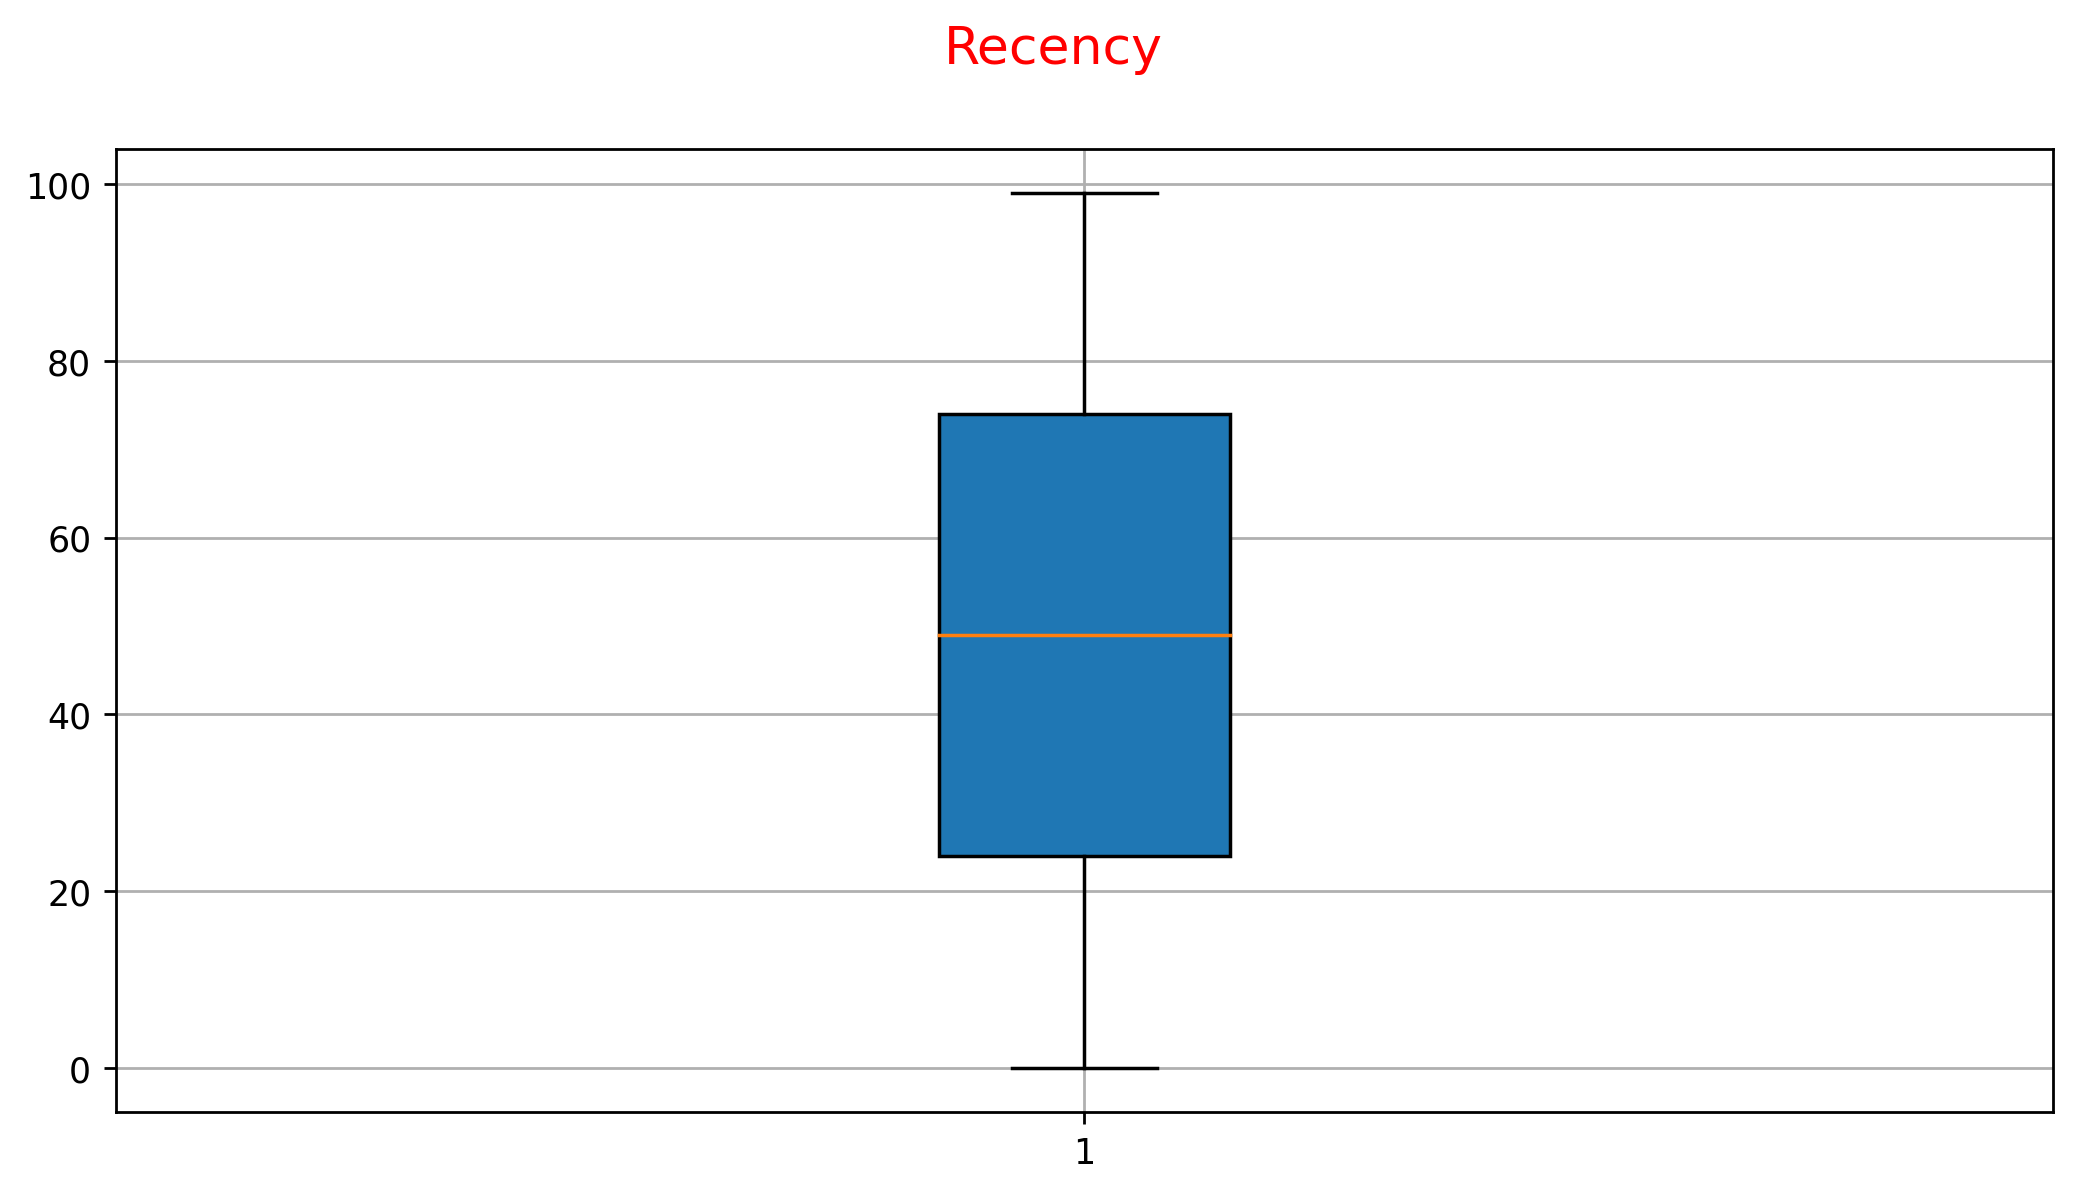

In [40]:
plt.suptitle('Recency', size=15, c='r')
plt.boxplot(data['Recency'], patch_artist=True);
plt.grid();

In [41]:
df = data['Recency'].groupby(data['Education']).mean()
df

Education
2n Cycle      48.293532
Basic         48.444444
Graduation    50.035492
Master        47.586486
PhD           48.509278
Name: Recency, dtype: float64

In [42]:
df = data['Recency'].groupby(data['Marital_Status']).mean()
df

Marital_Status
Absurd      53.000000
Alone       30.333333
Divorced    49.272727
Married     48.277778
Single      49.561587
Together    50.131261
Widow       49.142857
YOLO         3.000000
Name: Recency, dtype: float64

- Average recency period is 50 days.

###### Complain

In [43]:
#Customer complained in last 2 years.
df = data['Complain'].groupby(data['Education']).agg(['sum','count'])
df

sum  count
Education             
2n Cycle      3    201
Basic         0     54
Graduation   14   1127
Master        2    370
PhD           1    485

In [44]:
#Customer complained in last 2 years.
df = data['Complain'].groupby(data['Marital_Status']).agg(['sum','count'])
df

sum  count
Marital_Status            
Absurd            0      2
Alone             0      3
Divorced          1    231
Married           8    864
Single            6    479
Together          5    579
Widow             0     77
YOLO              0      2

In [45]:
#Number of complain regestered by people.
data['Complain'].value_counts()

0    2217
1      20
Name: Complain, dtype: int64

- Only 20 people regestered complain in 2 years.

###### NumDealsPurchases

<AxesSubplot:>

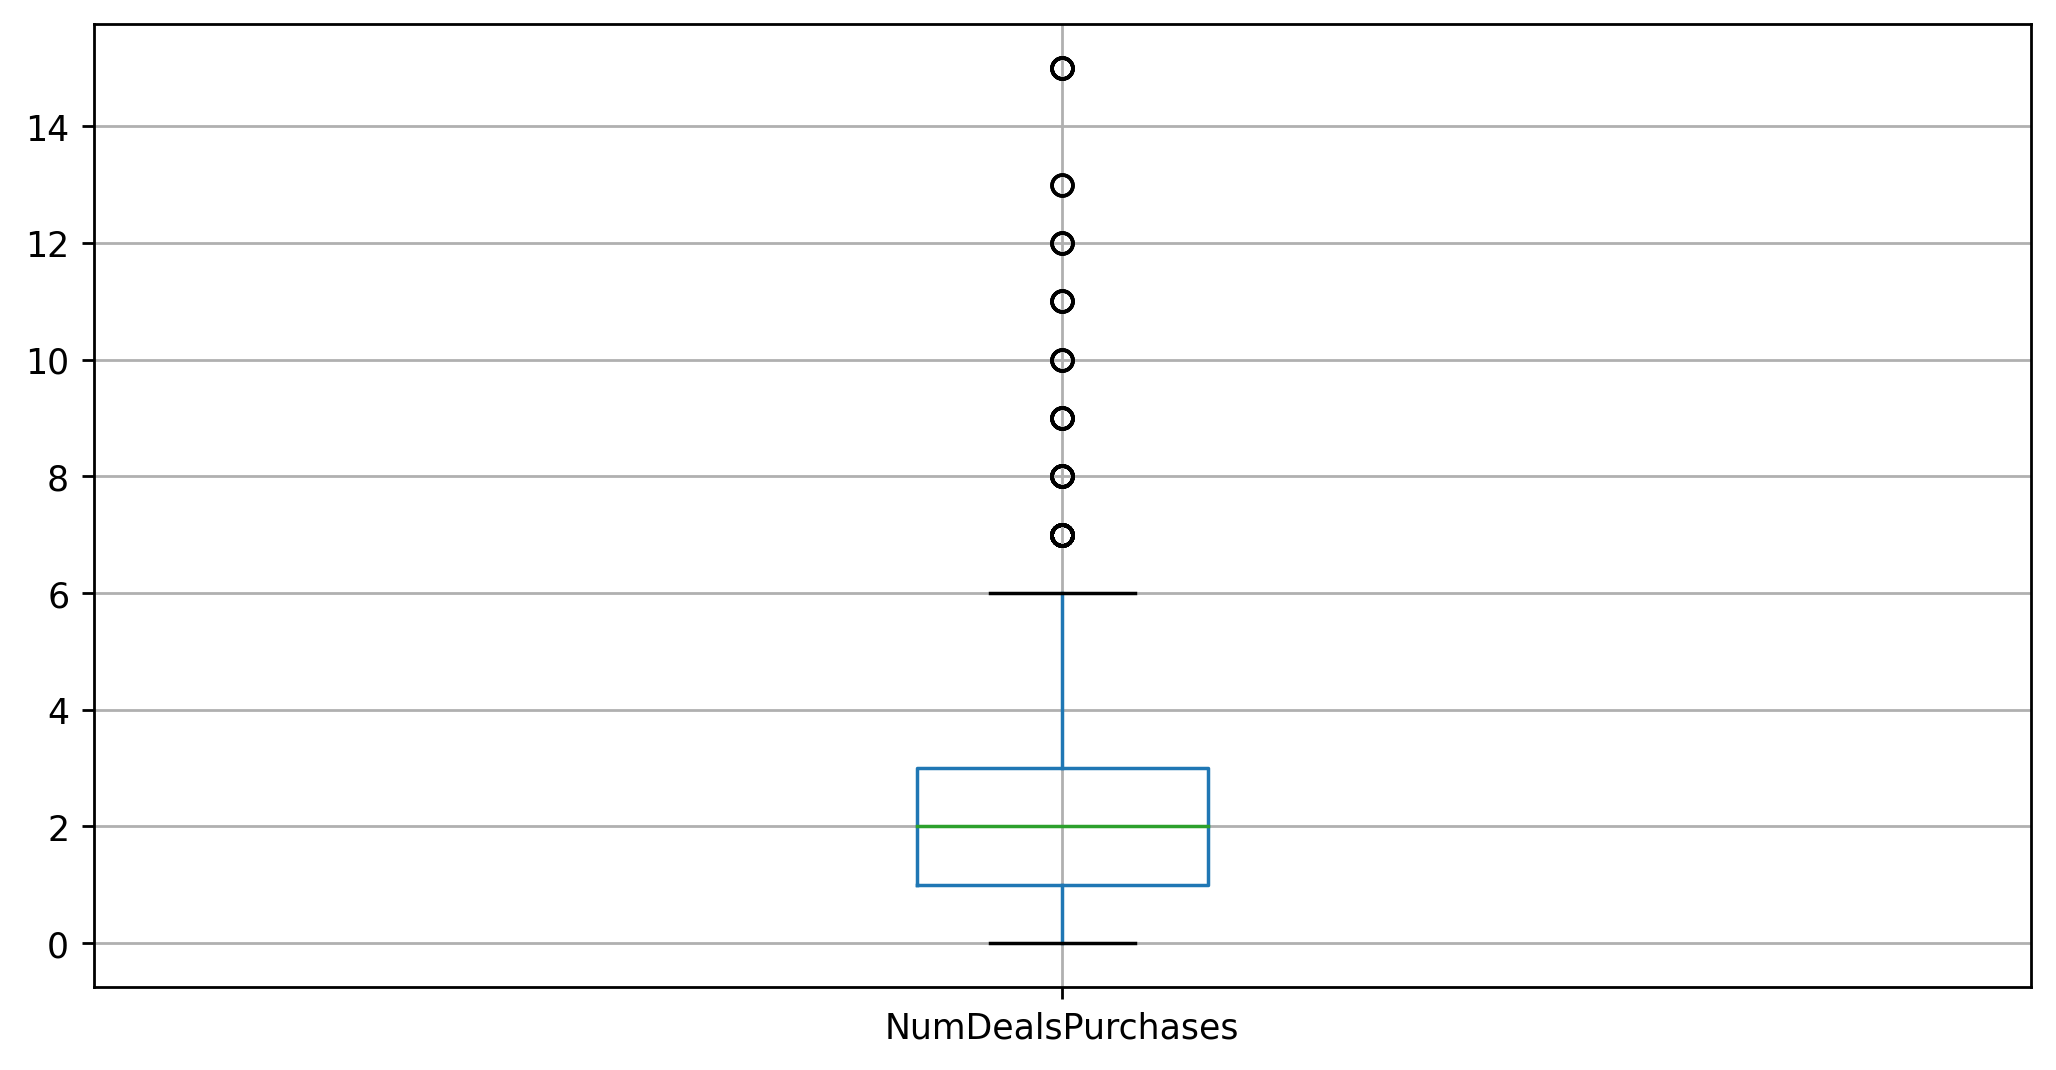

In [46]:
data[['NumDealsPurchases']].boxplot()

In [47]:
#Outliers present in Deals Purchases.
data[data['NumDealsPurchases'] > 6]

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
21          1979  Graduation        Married   2447.0        1         0   
24          1951  Graduation       Together  40689.0        0         1   
49          1954         PhD        Married  72550.0        1         1   
54          1978  Graduation        Married  66373.0        1         1   
69          1970  Graduation       Together  74854.0        1         2   
...          ...         ...            ...      ...      ...       ...   
2087        1974      Master       Divorced  53367.0        1         1   
2141        1973  Graduation         Single  65333.0        0         1   
2195        1954  Graduation        Married  50501.0        1         1   
2223        1979  Graduation        Married  63777.0        1         1   
2233        1946         PhD       Together  64014.0        2         1   

     Dt_Customer  Recency  Complain  MntWines  MntFruits  MntMeatProducts  \
21    2013-01-06       42         0         1          1             1725   
24    2013-03-18       69         0       270          3               27   
49    2012-11-08       39         0       826         50              317   
54    2013-06-12       57         0       328          9              124   
69    2013-04-08       90         0       856         59              487   
...          ...      ...       ...       ...        ...              ...   
2087  2013-08-31        2         0       229          7              140   
2141  2014-01-17       58         0       654          7               92   
2195  2013-06-18       10         0       297          0               38   
2223  2013-03-24       87         0       457          5              106   
2233  2014-06-10       56         0       406          0               30   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
21                  1                 1             1                 15   
24                 39                 6            99                  7   
49                 50                38            38                  9   
54                 12                24           109                  7   
69                 58                29            73                  7   
...               ...               ...           ...                ...   
2087               10                 3            11                  7   
2141                0                15            30                  7   
2195               13                 0           152                  7   
2223               15                17            53                  8   
2233                0                 0             8                  7   

      AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
21               0             0             0             0             0   
24               0             0             0             0             0   
49               0             0             0             0             0   
54               0             0             0             0             0   
69               0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2087             0             0             0             0             0   
2141             0             0             0             1             1   
2195             0             0             1             0             0   
2223             0             0             0             0             0   
2233             1             0             0             0             0   

      Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
21           0                0                   28                  0   
24           0                7                    1                  5   
49           0                5                    2                 12   
54           0                

In [48]:
data['NumDealsPurchases'].median()

2.0

In [49]:
#Imputting outlier by median.
for i in data['NumDealsPurchases']:
    if i > 6:
        data['NumDealsPurchases'].replace(i,2.0, inplace=True)
    continue;

###### Purchases

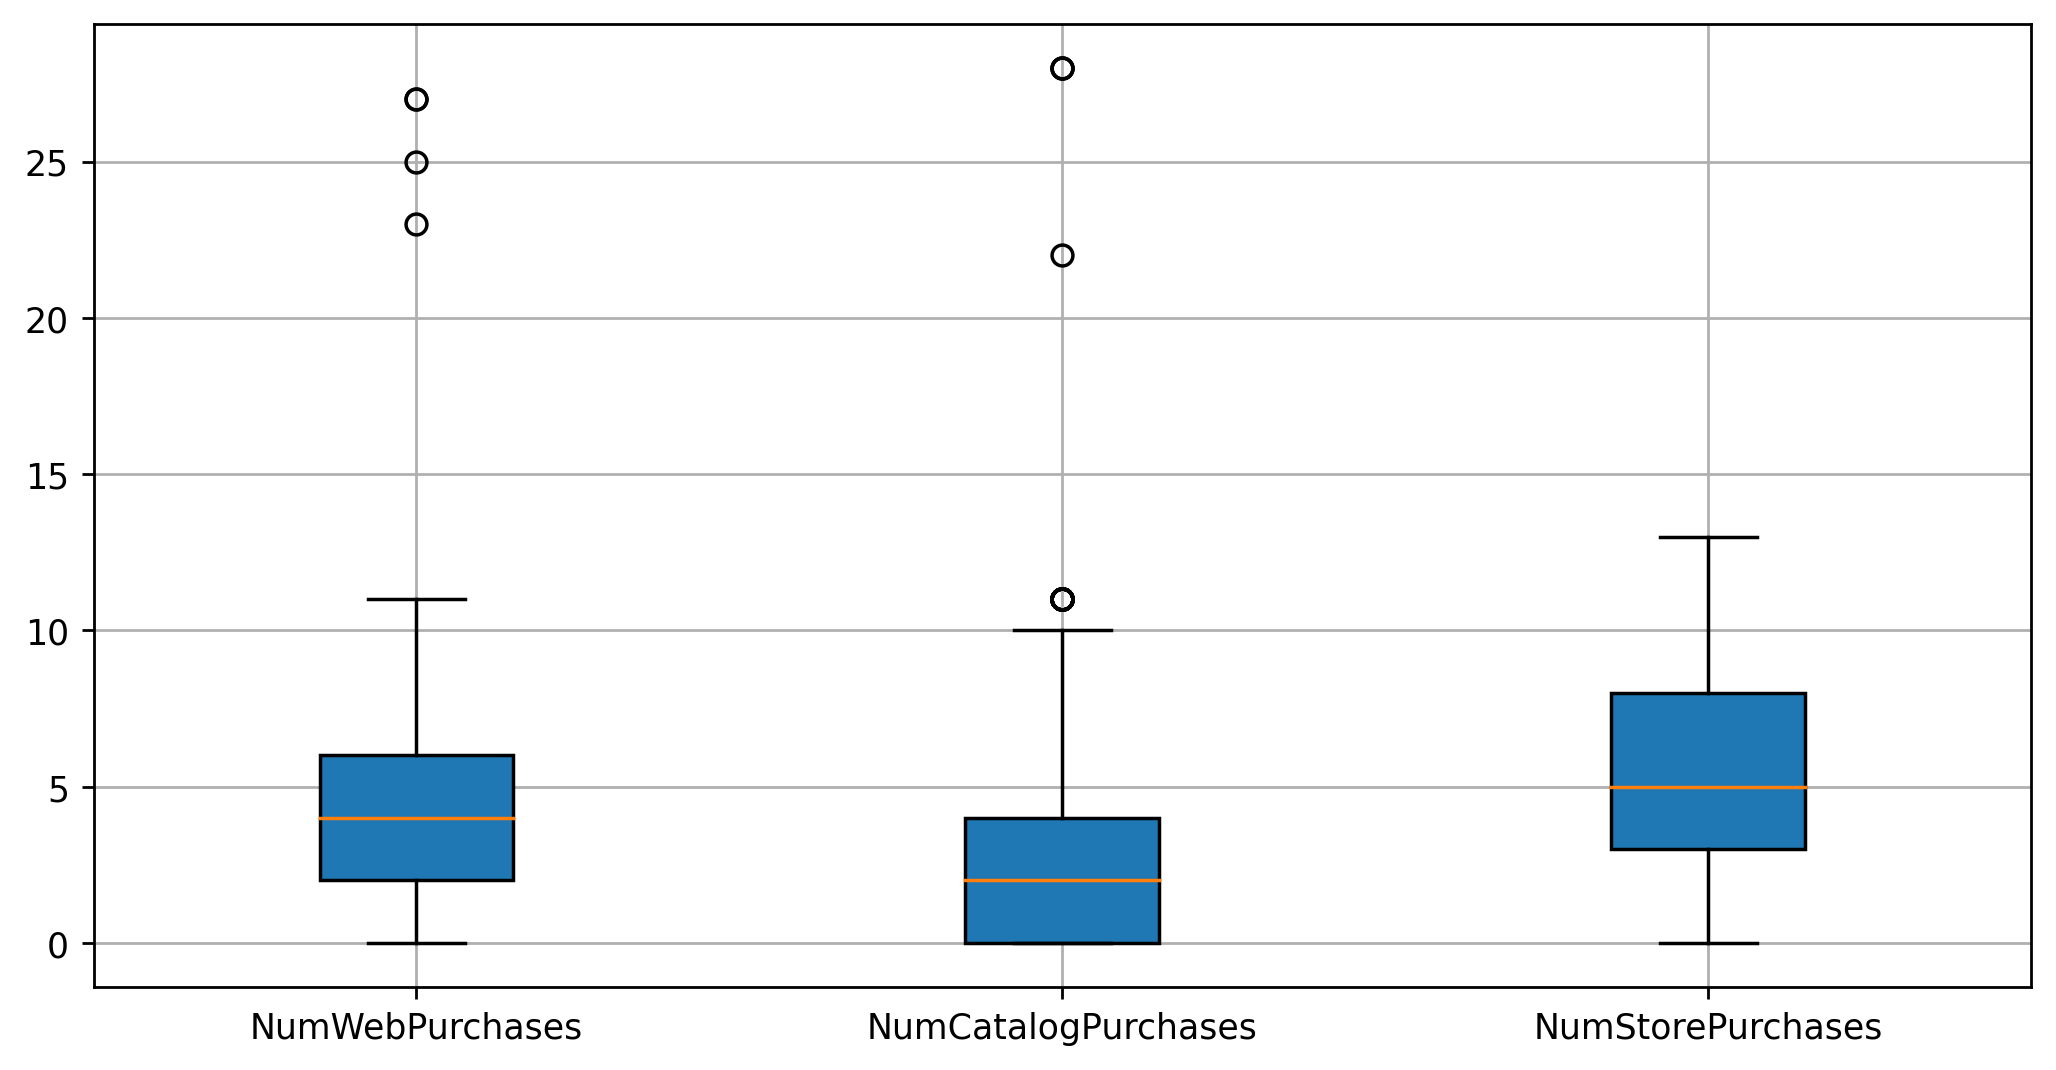

In [50]:
plt.boxplot(data[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']], labels=['NumWebPurchases','NumCatalogPurchases','NumStorePurchases'], patch_artist=True);
plt.grid()

- Purchase place

In [51]:
print('Number of store purchases = ', np.sum(data['NumStorePurchases']))
print('Number of web purchases = ', np.sum(data['NumWebPurchases']))
print('Number of catalog purchases = ', np.sum(data['NumCatalogPurchases']))

Number of store purchases =  12962
Number of web purchases =  9143
Number of catalog purchases =  5956


- Amount of product purchase throgh store is more.

In [52]:
#Average amount of product purchase.
df = data[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].groupby(data['Education']).mean()
df

NumWebPurchases  NumCatalogPurchases  NumStorePurchases
Education                                                          
2n Cycle           3.751244             2.338308           5.542289
Basic              1.888889             0.481481           2.851852
Graduation         4.125111             2.725821           5.829636
Master             4.032432             2.570270           5.897297
PhD                4.424742             2.962887           6.065979

In [53]:
#Average amount of product purchase.
df = data[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].groupby(data['Marital_Status']).mean()
df

NumWebPurchases  NumCatalogPurchases  NumStorePurchases
Marital_Status                                                         
Absurd                 3.500000             7.500000           6.500000
Alone                  5.000000             0.666667           4.000000
Divorced               4.320346             2.679654           5.835498
Married                4.087963             2.625000           5.850694
Single                 3.878914             2.605428           5.647182
Together               4.081174             2.670121           5.739206
Widow                  4.623377             3.324675           6.415584
YOLO                   7.000000             1.000000           6.000000

In [54]:
#Outliers present in Web Purchases.
Web_Out = data[data['NumWebPurchases'] > 12]
Web_Out

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
27          1986  Graduation         Single   51381.5        1         0   
1803        1966         PhD         Single    7144.0        0         2   
1895        1945         PhD         Single  113734.0        0         0   
1972        1969  Graduation        Married    4428.0        0         1   

     Dt_Customer  Recency  Complain  MntWines  MntFruits  MntMeatProducts  \
27    2013-02-20       19         0         5          1                3   
1803  2013-12-07       92         0        81          4               33   
1895  2014-05-28        9         0         6          2                3   
1972  2013-10-05        0         0        16          4               12   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
27                  3               263           362                  0   
1803                5                 2           291                  0   
1895                1               262             3                  0   
1972                2                 4           321                  0   

      AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
27               0             0             0             0             0   
1803             0             0             0             0             0   
1895             0             0             0             0             0   
1972             0             0             0             0             0   

      Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
27           0               27                    0                  0   
1803         0               23                    1                  1   
1895         0               27                    0                  0   
1972         0               25                    0                  0   

      NumWebVisitsMonth  
27                    1  
1803                  0  
1895                  1  
1972                  1

- 4 Outlier present in web Purchases.

In [55]:
data['NumWebPurchases'].median()

4.0

In [56]:
#Imputting outlier by median.
for i in data['NumWebPurchases']:
    if i > 12:
        data['NumWebPurchases'].replace(i,4.0, inplace=True)
    continue;

In [57]:
#Outliers present in catalog Purchases.
Catalog_Out = data[data['NumCatalogPurchases'] > 10]
Catalog_Out

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
21          1979  Graduation        Married   2447.0        1         0   
104         1959  Graduation        Married  87195.0        0         0   
164         1973         PhD        Married  51381.5        0         1   
286         1966  Graduation          Widow  79946.0        0         0   
583         1955  Graduation          Widow  79800.0        0         0   
588         1975      Master        Married  92163.0        0         0   
624         1960  Graduation       Together  70971.0        0         1   
633         1952  Graduation         Single  84574.0        0         0   
684         1982         PhD        Married  51381.5        0         0   
761         1952  Graduation         Single  75127.0        0         0   
774         1958         PhD       Together  74250.0        0         0   
931         1952  Graduation         Single  75127.0        0         0   
981         1950  Graduation        Married  80763.0        0         0   
1209        1972  Graduation       Together  77044.0        0         1   
1449        1953  Graduation         Single  73892.0        0         0   
1462        1963      Master       Divorced  49476.0        0         1   
1489        1988  Graduation       Together  87679.0        0         0   
1650        1977  Graduation       Together  51381.5        0         0   
1742        1952  Graduation        Married  81795.0        0         0   
1825        1958      Master        Married  80739.0        0         0   
1903        1971         PhD        Married  60491.0        0         1   
1937        1984         PhD        Married  73356.0        0         0   
1955        1990  Graduation         Single  96843.0        0         0   

     Dt_Customer  Recency  Complain  MntWines  MntFruits  MntMeatProducts  \
21    2013-01-06       42         0         1          1             1725   
104   2014-05-08       35         0       217         76              690   
164   2014-03-01       98         0        20          2             1582   
286   2014-05-12       19         0       395        183              565   
583   2012-09-23       65         0      1060         21              530   
588   2012-12-12       25         0       817        183              797   
624   2012-09-21       28         0      1001         17              572   
633   2013-06-04       72         0       387         20              713   
684   2012-08-04       21         0        55         16             1622   
761   2014-05-22       92         0       203         35              305   
774   2014-01-26       90         0       680         11              392   
931   2014-05-22       92         0       203         35              305   
981   2013-08-15       17         0       674        168              108   
1209  2013-10-27       12         0       625         38              242   
1449  2013-11-13       40         0       703        102              601   
1462  2013-06-20       29         0       386         23               95   
1489  2013-07-27       62         0      1259        172              815   
1650  2013-04-29       13         0         1          0             1725   
1742  2012-10-26       74         0       324        132              693   
1825  2013-05-23       92         0       674         92              736   
1903  2013-09-06       81         0       637         47              237   
1937  2014-02-06       56         0      1050         14              322   
1955  2013-04-23       60         0       448         71              951   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
21                  1                 1             1                  2   
104                50                26            38                  1   
164                 1                 2             1                  2   
286               166               141            2

- 23 Outlier present in catalog Purchases.

In [58]:
data['NumCatalogPurchases'].median()

2.0

In [59]:
#Imputting outlier by median.
for i in data['NumCatalogPurchases']:
    if i > 10:
        data['NumCatalogPurchases'].replace(i,2.0, inplace=True)
    continue;

###### NumWebVisitsMonth

<AxesSubplot:>

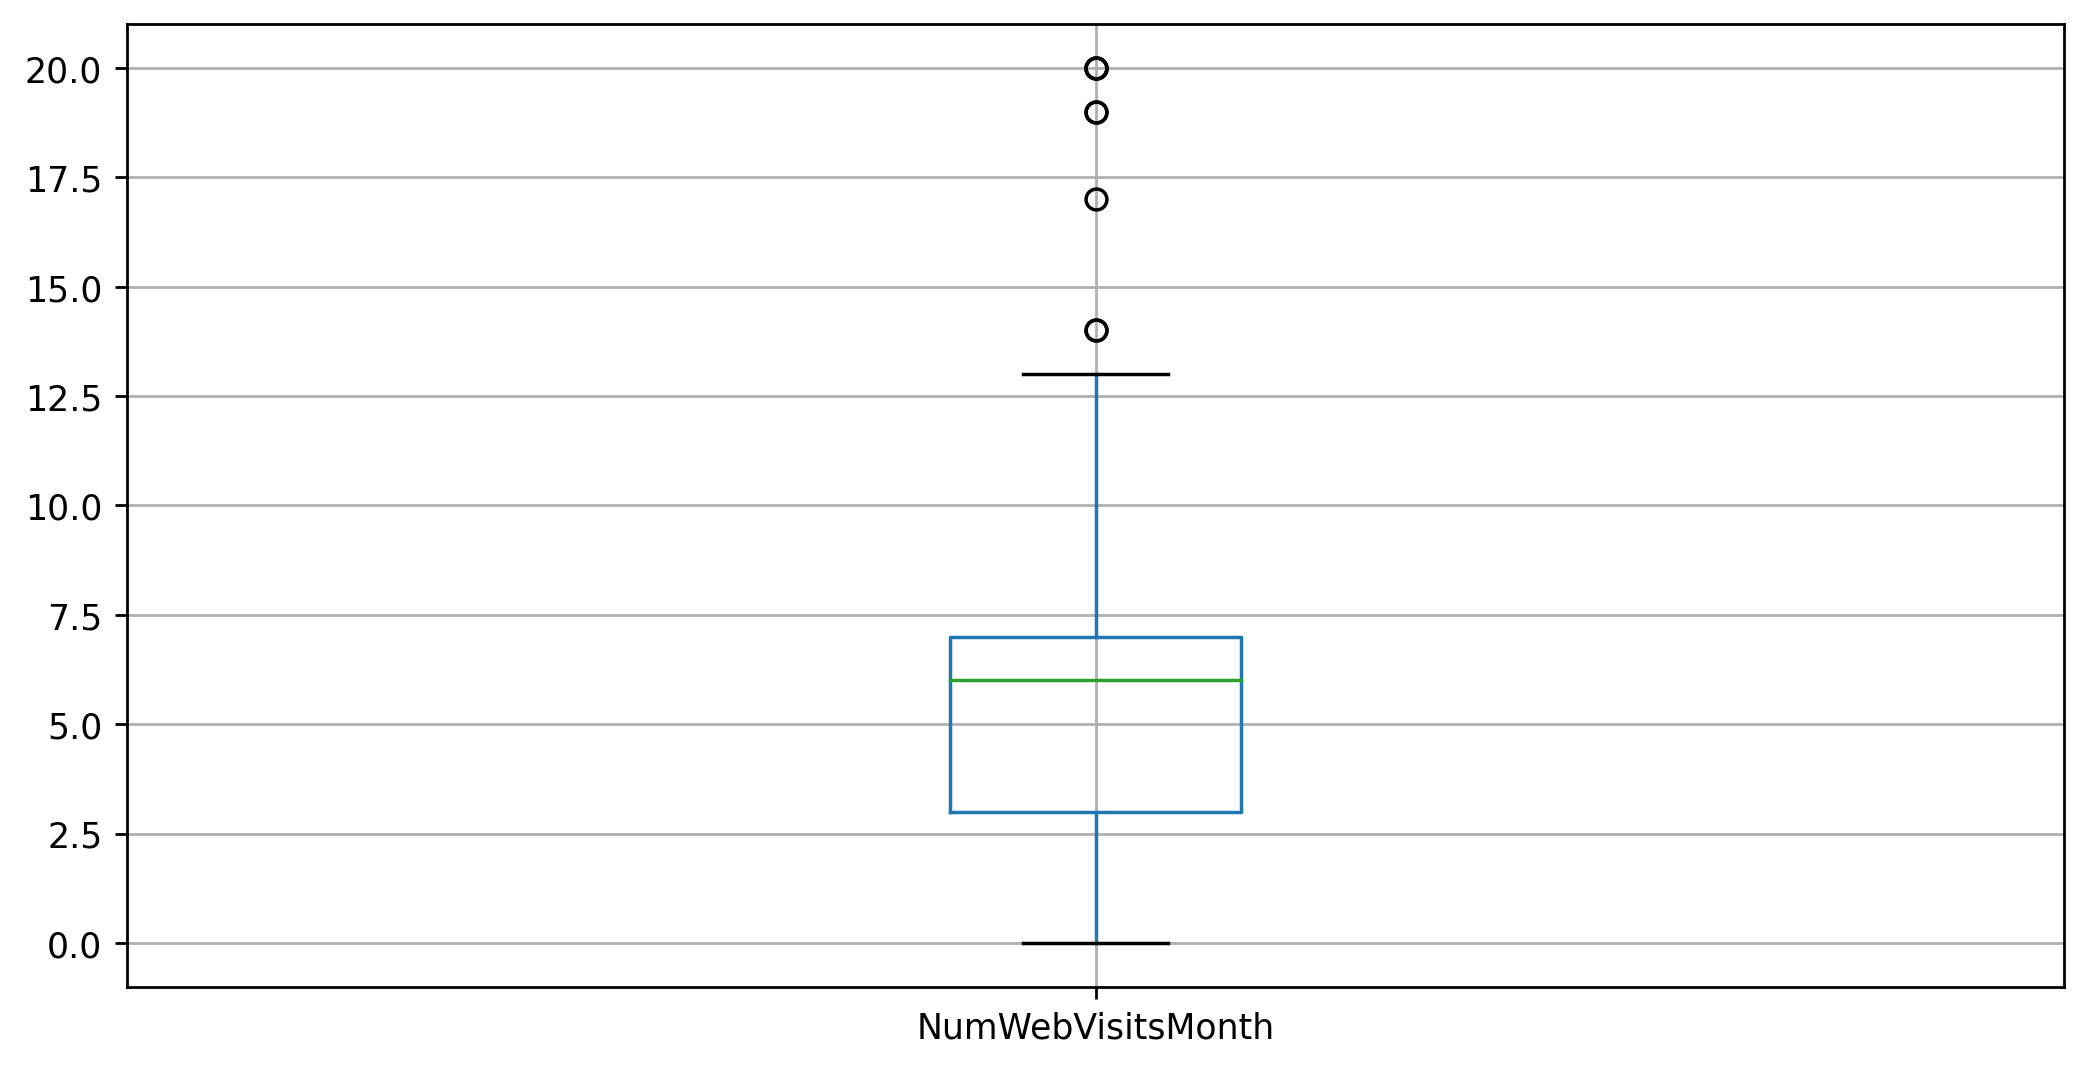

In [60]:
data[['NumWebVisitsMonth']].boxplot()

In [61]:
#Web visits in last month
df = data['NumWebVisitsMonth'].groupby(data['Education']).mean()
df

Education
2n Cycle      5.462687
Basic         6.870370
Graduation    5.287489
Master        5.178378
PhD           5.268041
Name: NumWebVisitsMonth, dtype: float64

In [62]:
#Web visits in last month
df = data['NumWebVisitsMonth'].groupby(data['Marital_Status']).mean()
df

Marital_Status
Absurd      1.500000
Alone       6.333333
Divorced    5.489177
Married     5.364583
Single      5.286013
Together    5.267703
Widow       4.883117
YOLO        8.000000
Name: NumWebVisitsMonth, dtype: float64

In [63]:
#Outliers present in Web Visits.
Web_Out = data[data['NumWebVisitsMonth'] > 13]
Web_Out

Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
9           1950         PhD       Together  5648.0        1         1   
771         1957         PhD       Together  6835.0        0         1   
978         1965  Graduation       Divorced  4861.0        0         0   
1039        1991  Graduation         Single  8028.0        0         0   
1242        1971  Graduation       Divorced  1730.0        0         0   
1325        1982      Master         Single  6560.0        0         0   
1521        1973  Graduation         Single  3502.0        1         0   
1843        1963         PhD        Married  4023.0        1         1   

     Dt_Customer  Recency  Complain  MntWines  MntFruits  MntMeatProducts  \
9     2014-03-13       68         0        28          0                6   
771   2012-12-08       76         0       107          2               12   
978   2014-06-22       20         0         2          1                1   
1039  2012-09-18       62         0        73         18               66   
1242  2014-05-18       65         0         1          1                3   
1325  2013-12-12        2         0        67         11               26   
1521  2013-04-13       56         0         2          1                1   
1843  2014-06-23       29         0         5          0                1   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
9                   1                 1            13                  1   
771                 2                 2            12                  0   
978                 1                 0             1                  0   
1039                7                12             2                  2   
1242                1                 1             1                  2   
1325                4                 3           262                  0   
1521                0                 0             1                  0   
1843                1                 1             1                  2   

      AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
9                0             0             1             0             0   
771              0             0             0             0             0   
978              0             0             0             0             0   
1039             0             0             0             0             0   
1242             0             0             0             0             0   
1325             0             0             0             0             0   
1521             0             0             0             0             0   
1843             0             0             0             0             0   

      Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
9            0                1                    0                  0   
771          0                0                    0                  1   
978          0                0                    0                  0   
1039         0                0                    1                  0   
1242         0                0                    0                  0   
1325         0                1                    0                  1   
1521         0                0                    0                  0   
1843         0                0                    0                  0   

      NumWebVisitsMonth  
9                    20  
771                  20  
978                  14  
1039                 19  
1242                 20  
1325                 17  
1521                 14  
1843                 19

- 8 Outlier present in web visits.

In [64]:
data['NumWebVisitsMonth'].median()

6.0

In [65]:
#Imputting outlier by median.
for i in data['NumWebVisitsMonth']:
    if i > 13:
        data['NumWebVisitsMonth'].replace(i,6.0, inplace=True)
    continue;

###### Deals Purchases

In [66]:
#Number of purchases made with a discount.
df = data['NumDealsPurchases'].groupby(data['Education']).agg(['mean','sum'])
df

mean   sum
Education                 
2n Cycle    2.029851   408
Basic       1.796296    97
Graduation  2.058563  2320
Master      2.121622   785
PhD         2.074227  1006

In [67]:
#Number of purchases made with a discount.
df = data['NumDealsPurchases'].groupby(data['Marital_Status']).agg(['mean','sum'])
df

mean   sum
Marital_Status                
Absurd          2.000000     4
Alone           3.666667    11
Divorced        2.203463   509
Married         2.079861  1797
Single          1.926931   923
Together        2.056995  1191
Widow           2.220779   171
YOLO            5.000000    10

###### Campaign

In [68]:
#Customer accept offer during campaign.
df = data[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].groupby(data['Education']).sum()
df

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
Education                                                            
2n Cycle              14             2            15            10   
Basic                  0             0             6             0   
Graduation            82            16            78            81   
Master                18             2            24            31   
PhD                   30            10            40            45   

            AcceptedCmp5  Response  
Education                           
2n Cycle              10        22  
Basic                  0         2  
Graduation            86       152  
Master                28        57  
PhD                   38       101

In [69]:
#Customer accept offer during campaign.
df = data[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].groupby(data['Marital_Status']).sum()
df

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
Marital_Status                                                           
Absurd                     1             0             0             0   
Alone                      0             0             1             0   
Divorced                  12             5            20            18   
Married                   63             7            63            63   
Single                    31             5            38            33   
Together                  32            12            37            43   
Widow                      5             1             4            10   
YOLO                       0             0             0             0   

                AcceptedCmp5  Response  
Marital_Status                          
Absurd                     1         1  
Alone                      0         1  
Divorced                  13        48  
Married                   66        98  
Single                    31       106  
Together                  43        60  
Widow                      8        19  
YOLO                       0         1

- 2nd campaign is not effective because, less number of offers get accepted.

######  Enrollment date

In [70]:
#Adding new variables 'Month' and 'Year' of customer enrollment with the company.

data["Month"] = data['Dt_Customer'].dt.strftime("%b")
data["Year"] = data['Dt_Customer'].dt.strftime("%Y")
data

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2232        1967  Graduation        Married  61223.0        0         1   
2233        1946         PhD       Together  64014.0        2         1   
2234        1981  Graduation       Divorced  56981.0        0         0   
2235        1956      Master       Together  69245.0        0         1   
2236        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  Complain  MntWines  MntFruits  MntMeatProducts  \
0     2012-09-04       58         0       635         88              546   
1     2014-03-08       38         0        11          1                6   
2     2013-08-21       26         0       426         49              127   
3     2014-02-10       26         0        11          4               20   
4     2014-01-19       94         0       173         43              118   
...          ...      ...       ...       ...        ...              ...   
2232  2013-06-13       46         0       709         43              182   
2233  2014-06-10       56         0       406          0               30   
2234  2014-01-25       91         0       908         48              217   
2235  2014-01-24        8         0       428         30              214   
2236  2012-10-15       40         0        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2232               42               118           247                  2   
2233                0                 0             8                  2   
2234               32                12            24                  1   
2235               80                30            61                  2   
2236                2                 1            21                  3   

      AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2232             0             0             0             0             0   
2233             1             0             0             0             0   
2234             0             0             0             1             0   
2235             0             0             0             0             0   
2236             0             0             0             0             0   

      Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0            1                8                   10                  4   
1            0                1                    1                  2   
2            0                8                    2                 10   
3            0                

In [71]:
#New Dataframes for each year data.

df_2012 = data[data['Year'] == '2012']
df_2013 = data[data['Year'] == '2013']
df_2014 = data[data['Year'] == '2014']

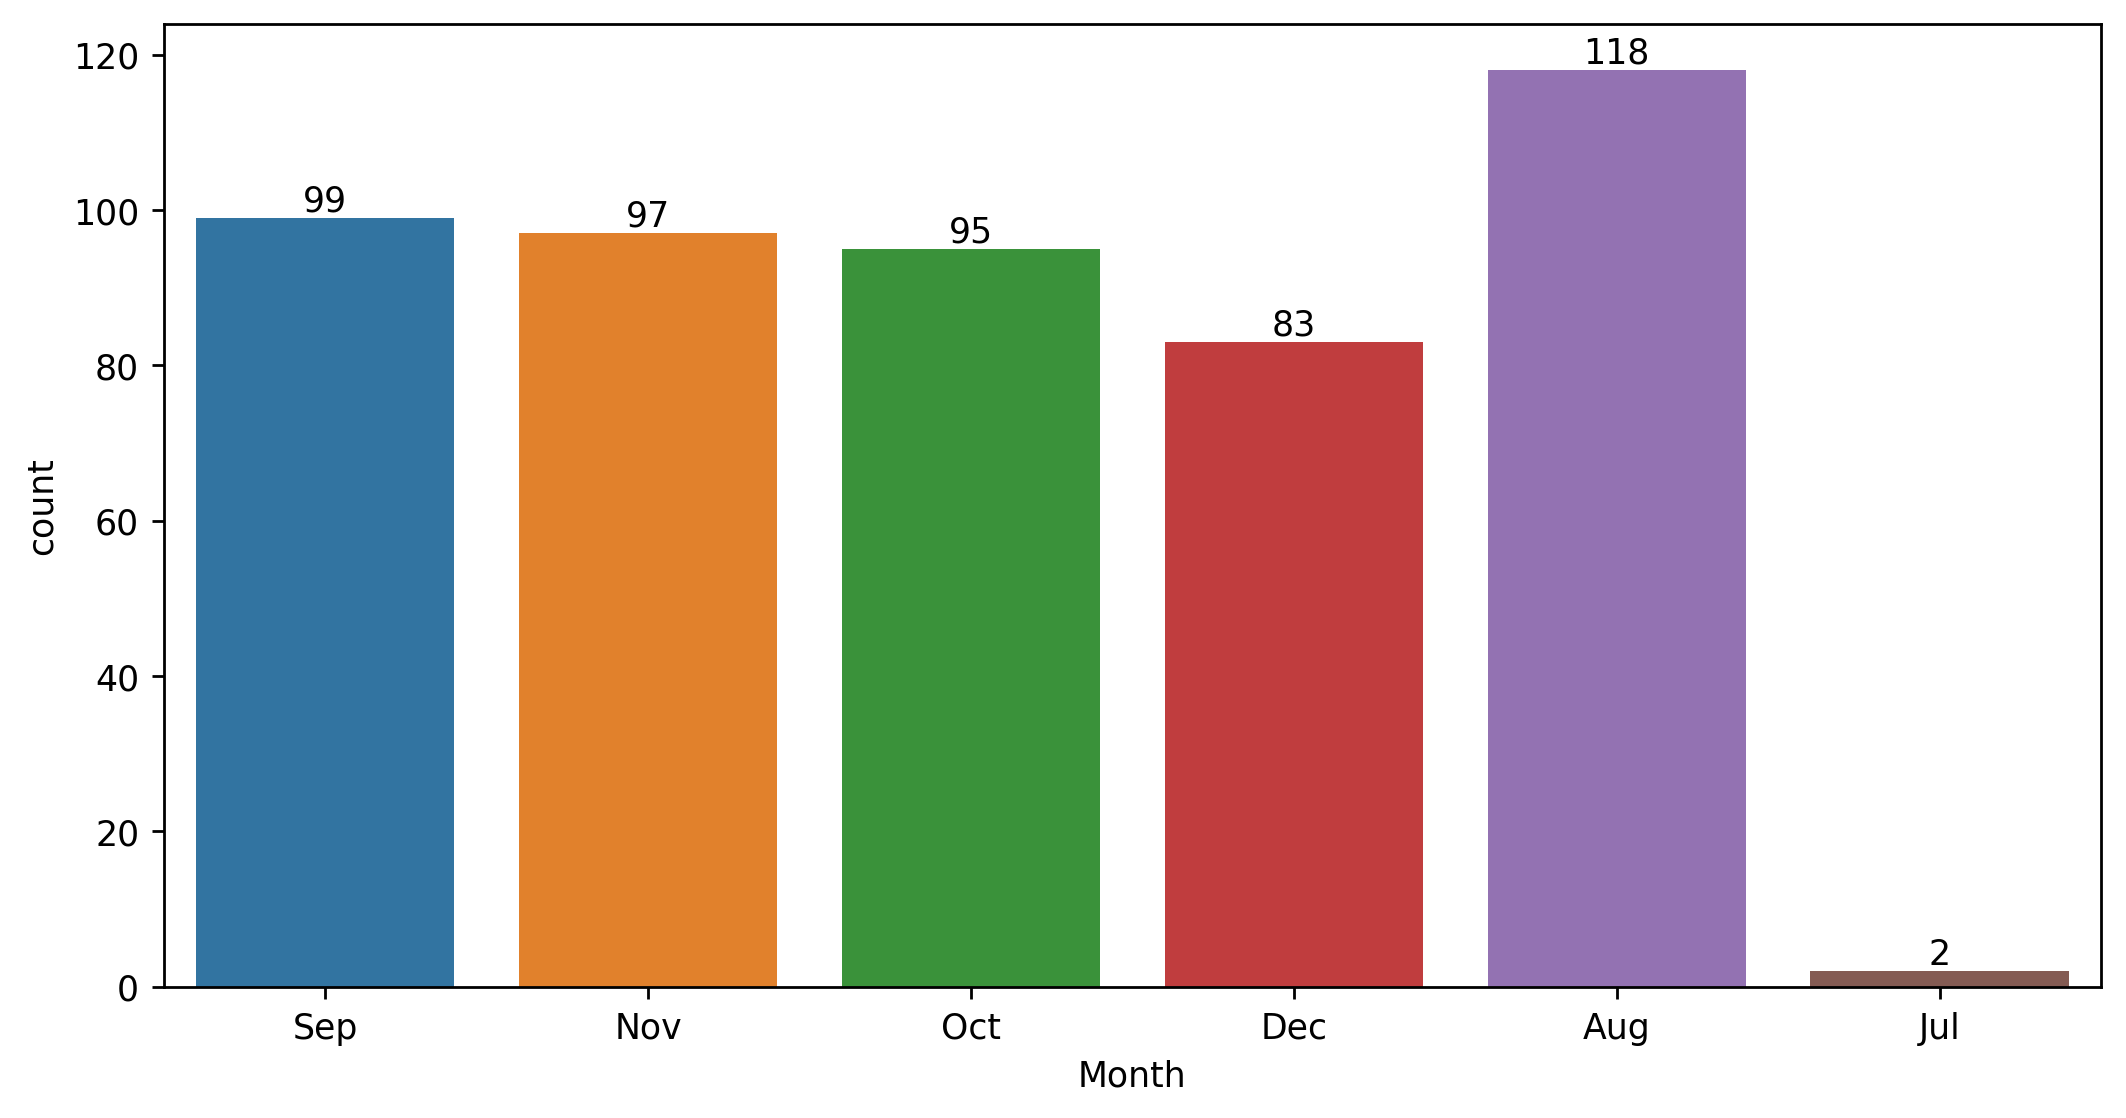

In [72]:
#Enrollment in each month of year 2012.
ax = sns.countplot('Month', data=df_2012)
ax.bar_label(ax.containers[0]);

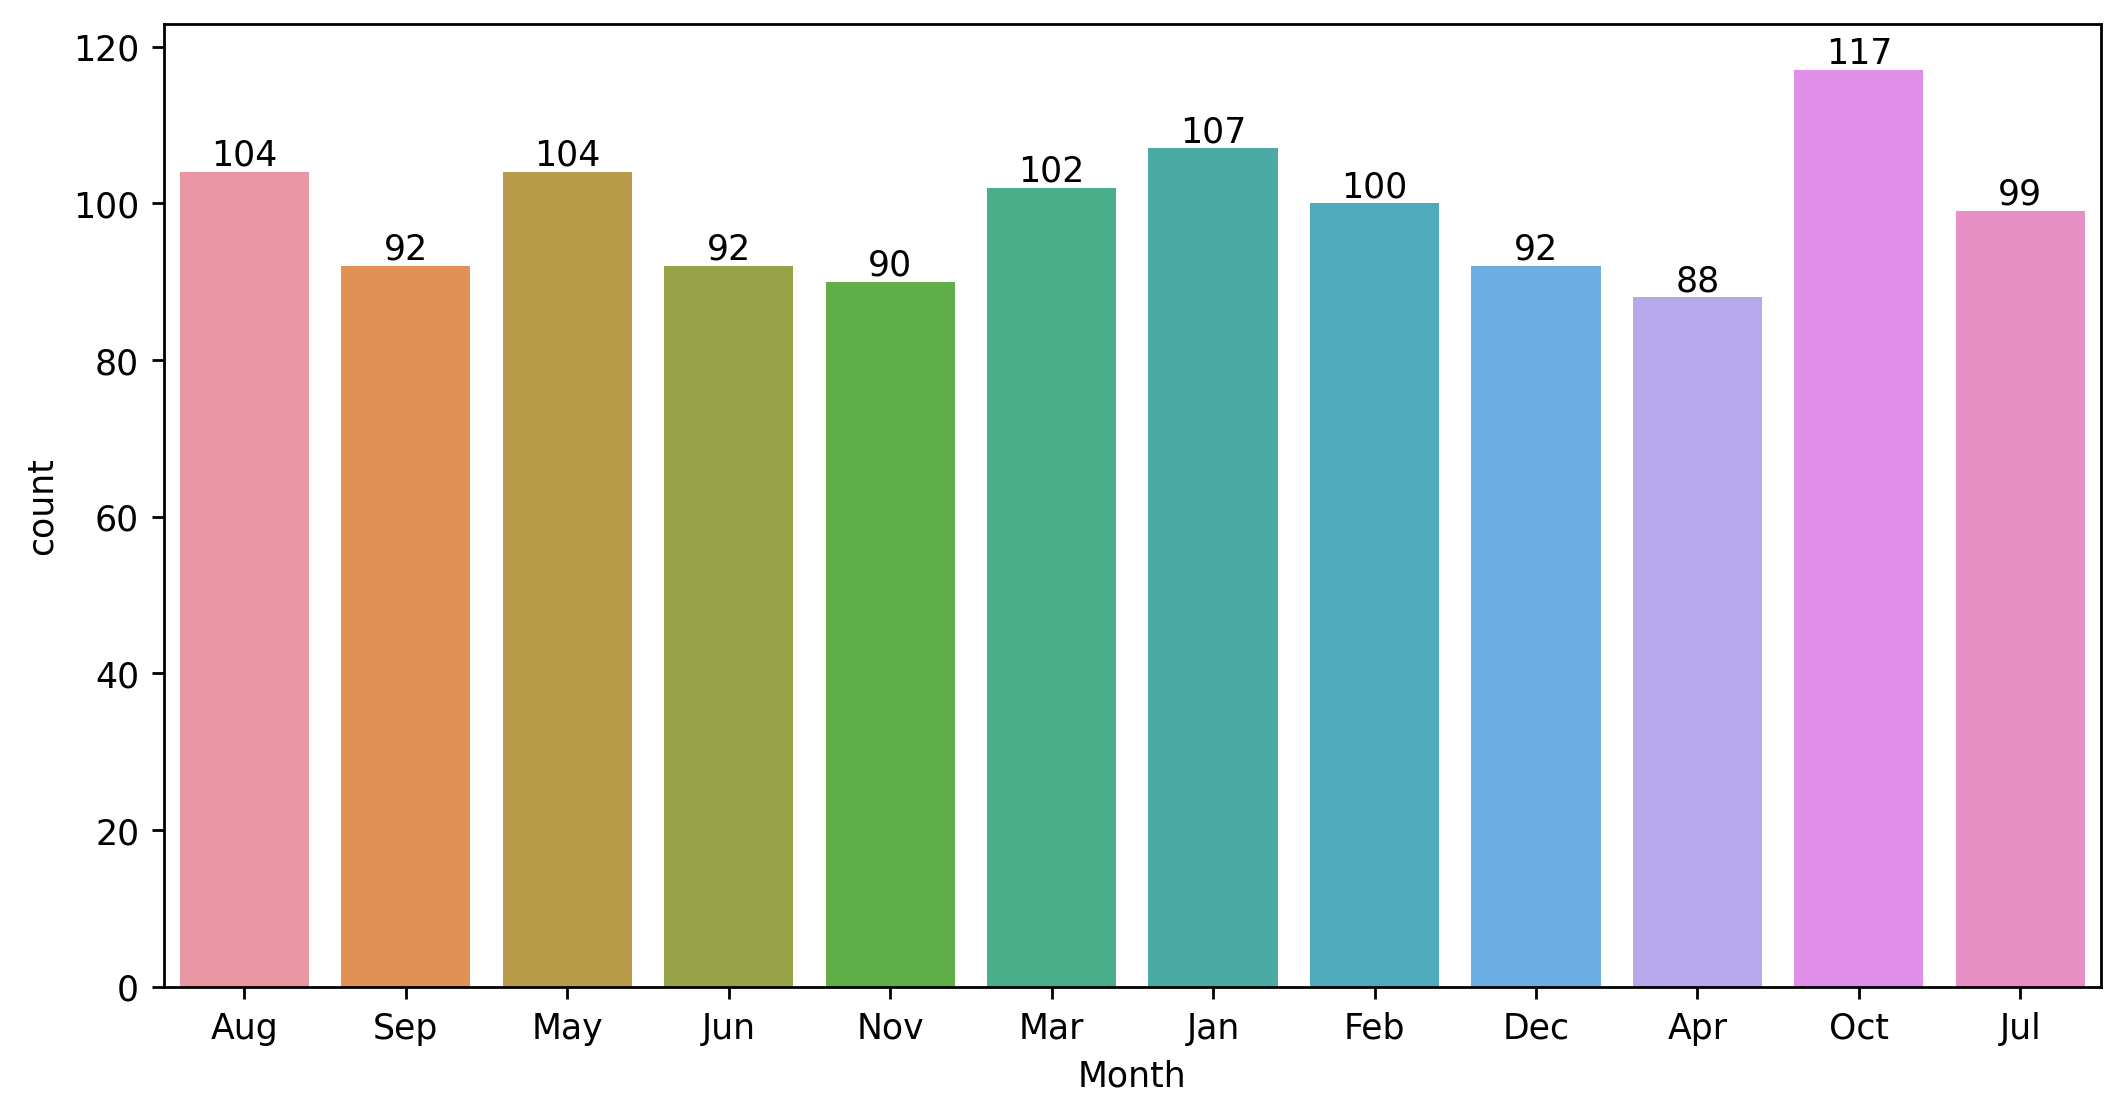

In [73]:
#Enrollment in each month of year 2013.
ax = sns.countplot('Month', data=df_2013)
ax.bar_label(ax.containers[0]);

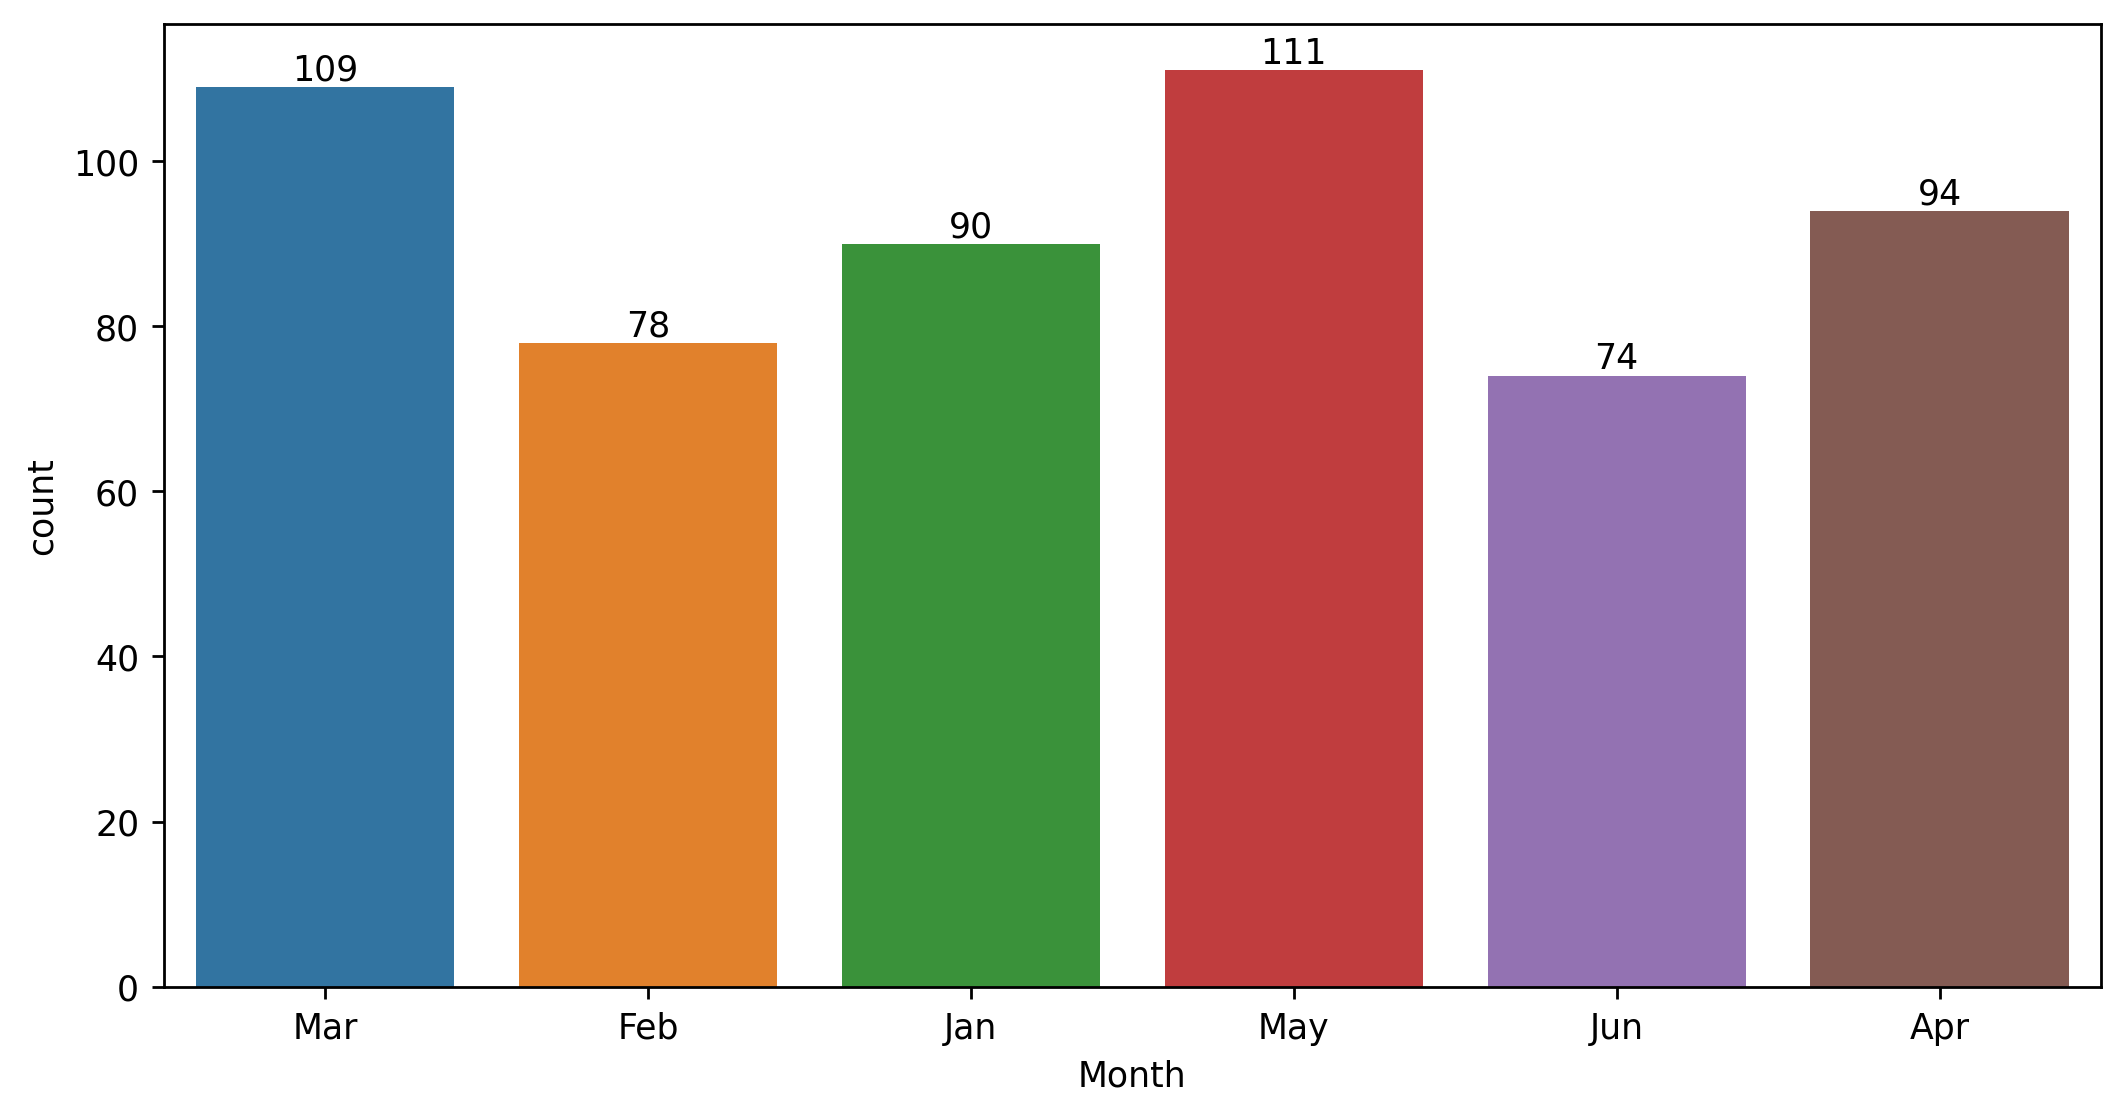

In [74]:
#Enrollment in each month of year 2014.
ax = sns.countplot('Month', data=df_2014)
ax.bar_label(ax.containers[0]);

- Data is available between the time period of july-2012 to june-2014.
- Total 24 Months(2 years)

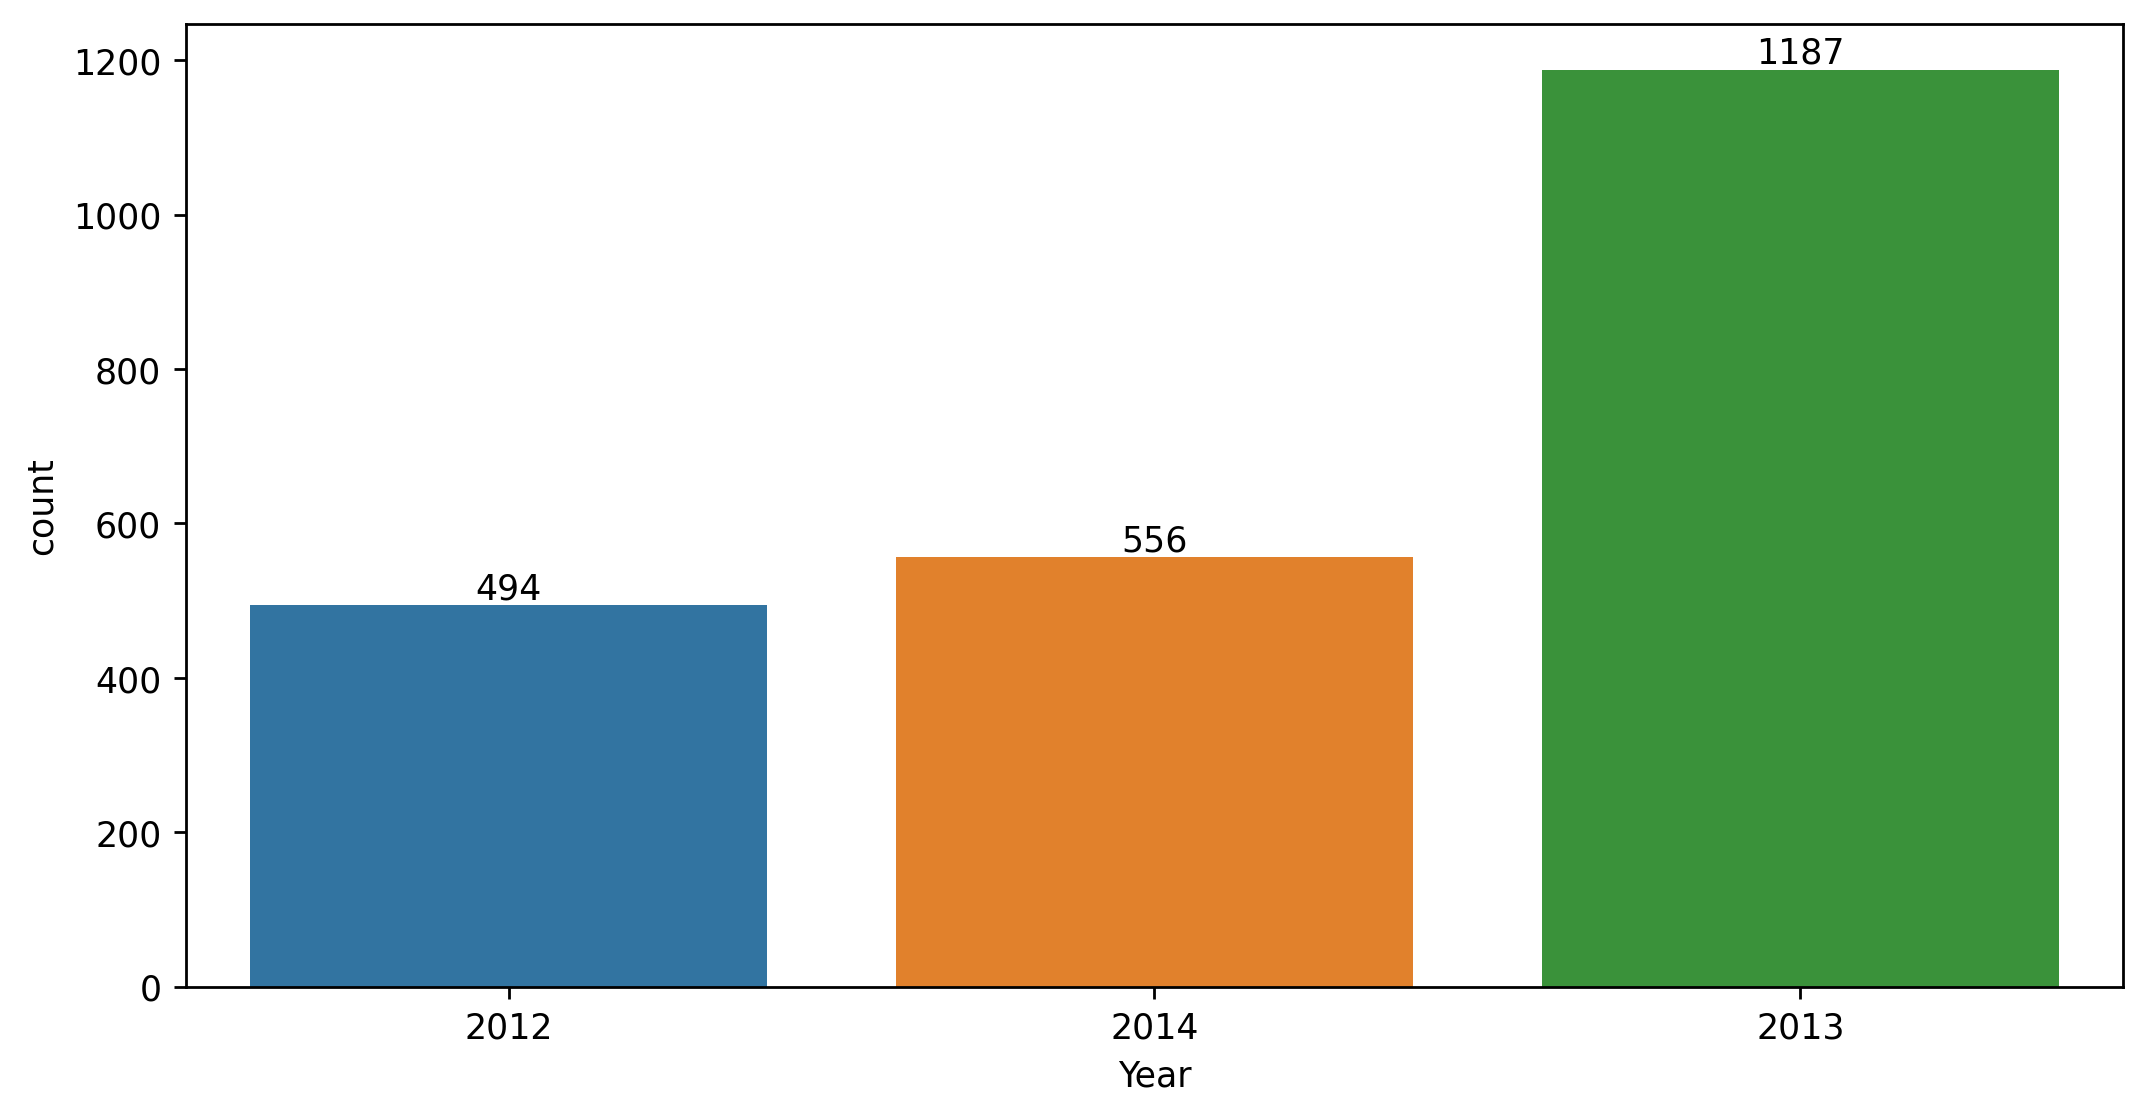

In [75]:
ax = sns.countplot('Year', data=data)
ax.bar_label(ax.containers[0]);

- In year 2012 between the time period of 6 months from Jul to Dec 2012, total 494 peoples enrolled.
- In year 2013 between the time period of 12 months from Jan to Dec 2013, total 1188 peoples enrolled.
- In year 2014 between the time period of 6 months from Jan to Jun 2014, total 557 peoples enrolled.

###### Products

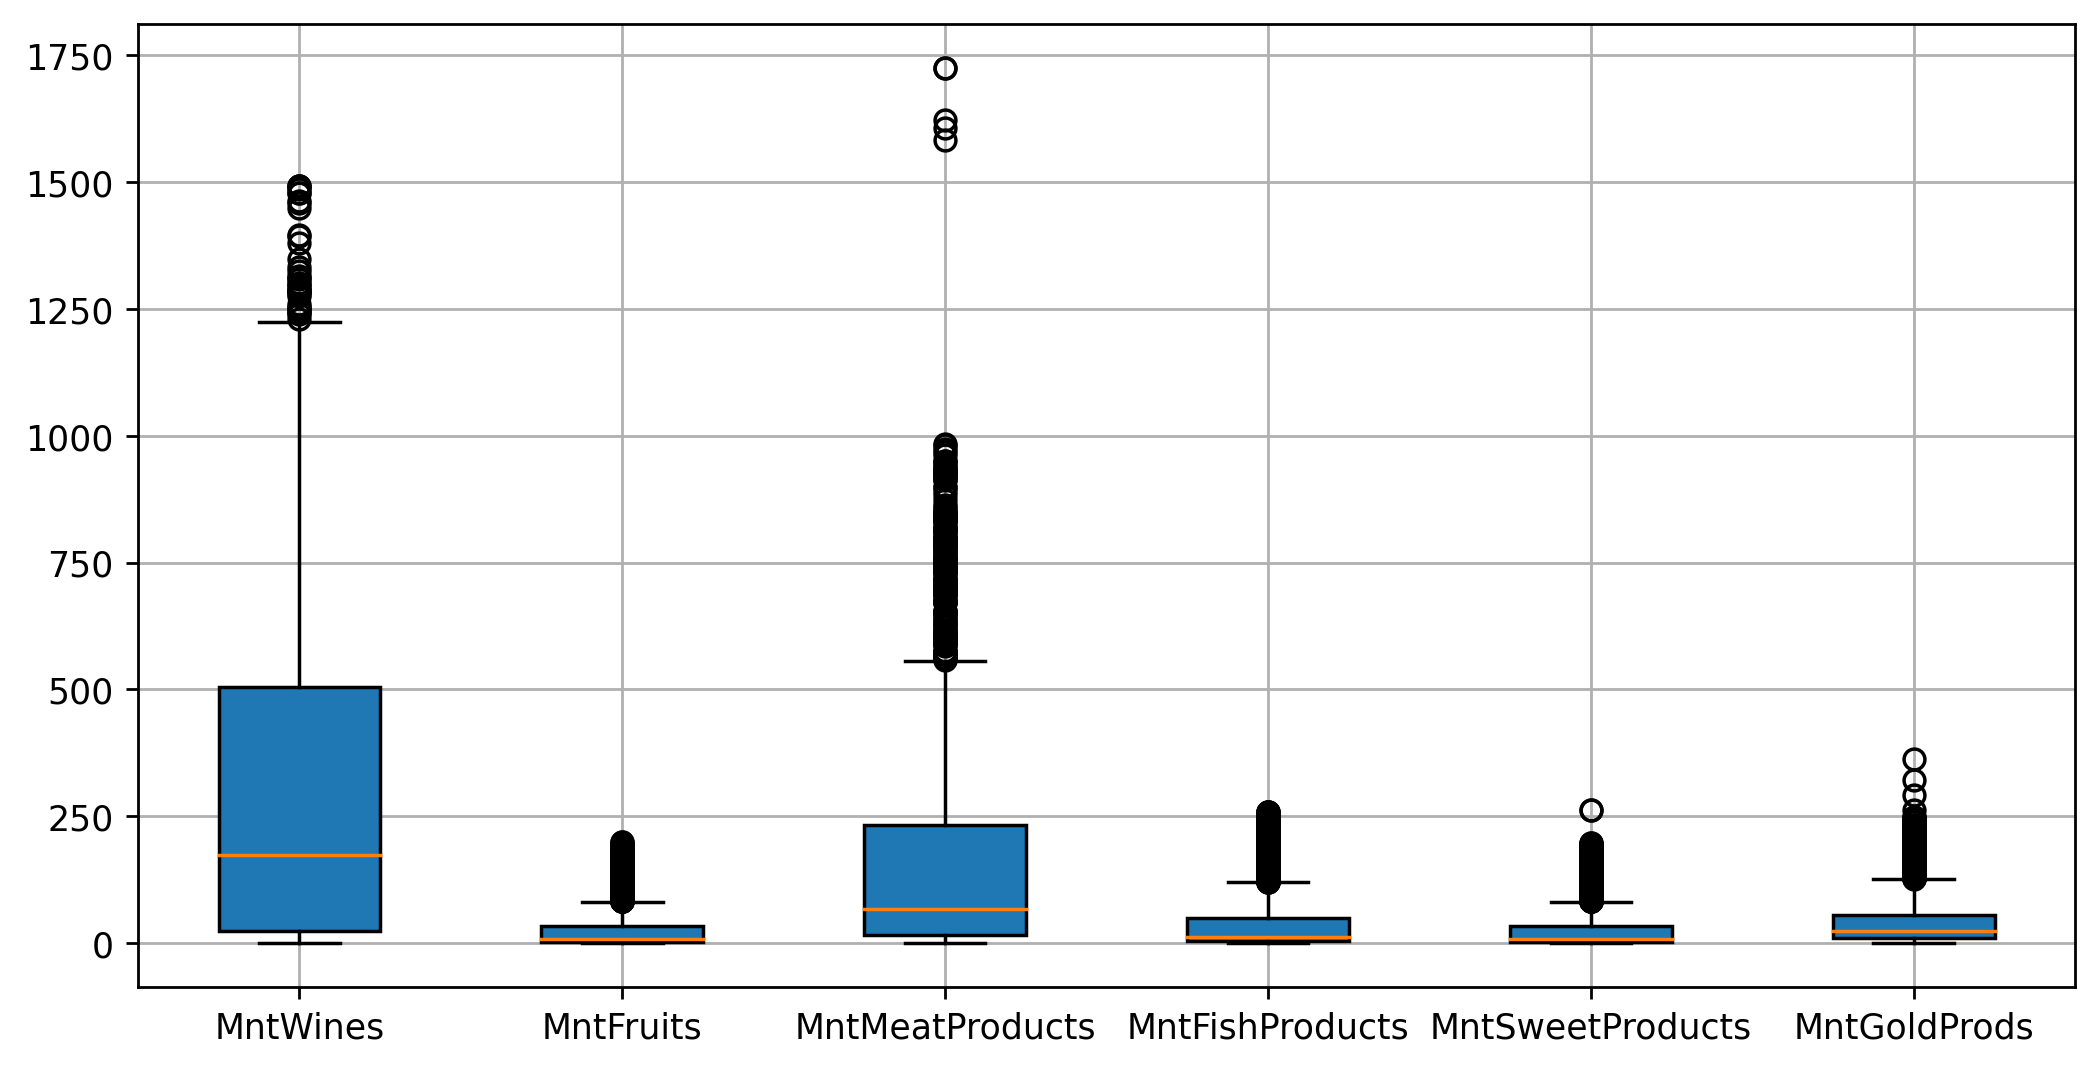

In [76]:
#Products
plt.boxplot(data[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']], patch_artist=True, labels=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']);
plt.grid()

In [77]:
#Average amount spend on products.
df = data[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].groupby(data['Education']).mean()
df

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Education                                                             
2n Cycle    200.039801  29.213930       142.597015        47.885572   
Basic         7.240741  11.111111        11.444444        17.055556   
Graduation  284.268855  30.774623       179.488909        43.149956   
Master      333.075676  21.654054       163.378378        32.100000   
PhD         403.773196  19.793814       167.791753        26.569072   

            MntSweetProducts  MntGoldProds  
Education                                   
2n Cycle           34.572139     46.726368  
Basic              12.111111     22.833333  
Graduation         31.367347     50.849157  
Master             21.175676     40.397297  
PhD                20.131959     31.915464

In [78]:
#Average amount spend on product.
df = data[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].groupby(data['Marital_Status']).mean()
df

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Marital_Status                                                            
Absurd          355.500000  84.500000       312.500000       205.500000   
Alone           184.666667   4.000000        26.333333         7.666667   
Divorced        326.186147  27.519481       150.822511        35.164502   
Married         299.480324  25.734954       160.681713        35.380787   
Single          288.916493  26.891441       182.478079        38.281837   
Together        306.051813  25.145078       167.423143        38.879102   
Widow           369.272727  33.090909       189.285714        51.389610   
YOLO            322.000000   3.000000        50.000000         4.000000   

                MntSweetProducts  MntGoldProds  
Marital_Status                                  
Absurd                 30.500000    204.000000  
Alone                   7.000000     27.000000  
Divorced               26.917749     46.380952  
Married                26.701389     42.822917  
Single                 27.319415     43.816284  
Together               26.056995     42.682211  
Widow                  39.012987     56.766234  
YOLO                    3.000000     42.000000

<AxesSubplot:>

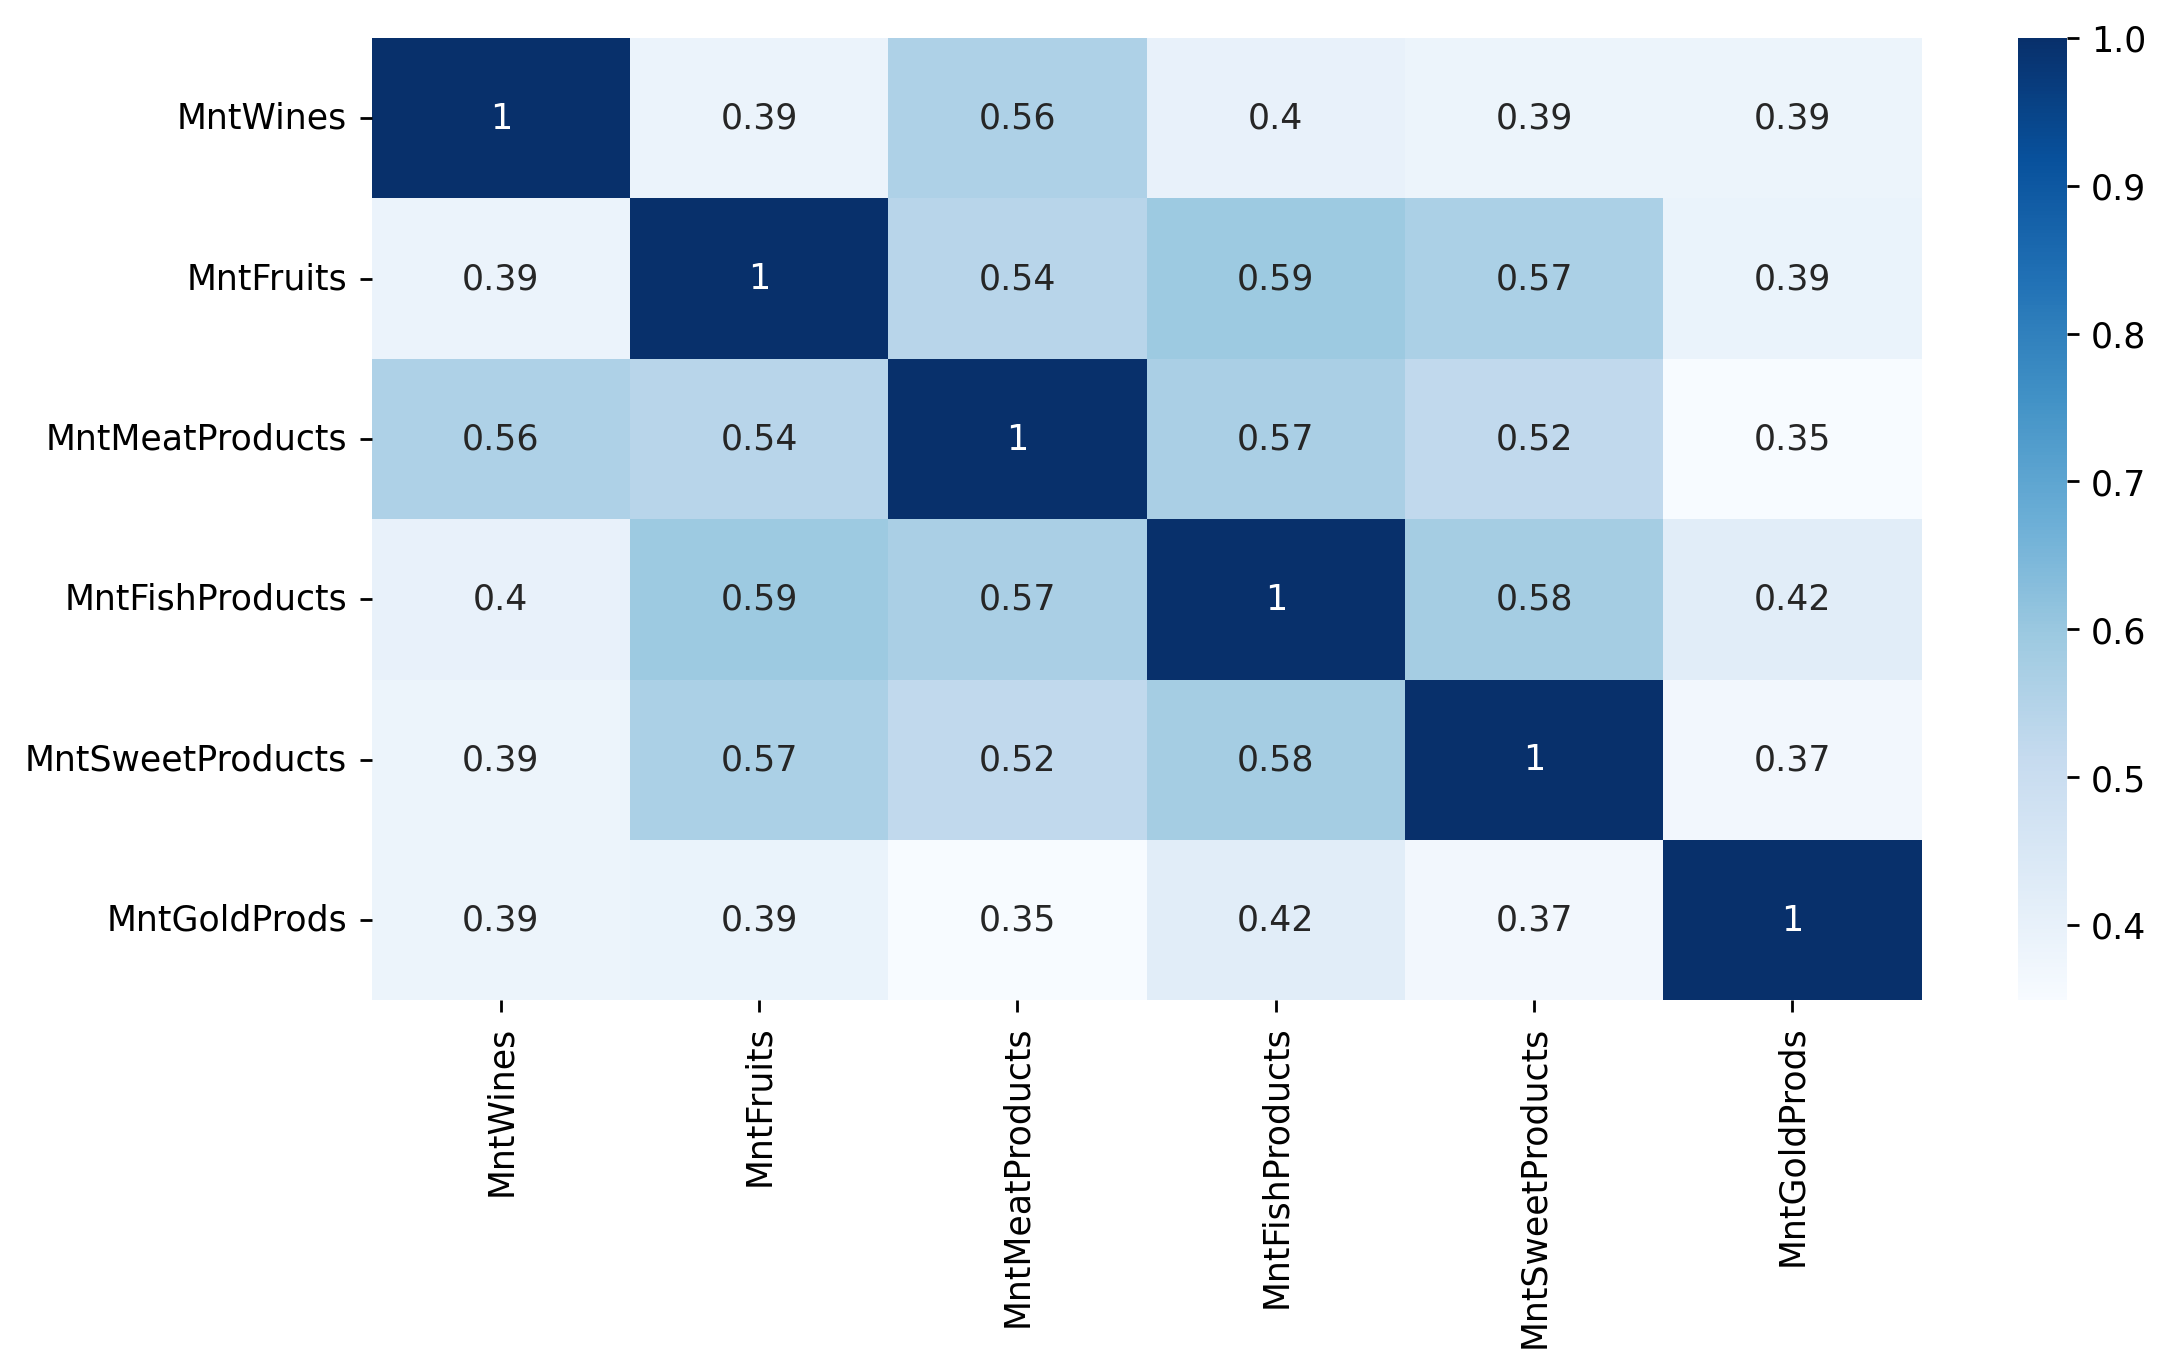

In [79]:
sns.heatmap(data[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',]].corr(), annot=True, cmap='Blues')

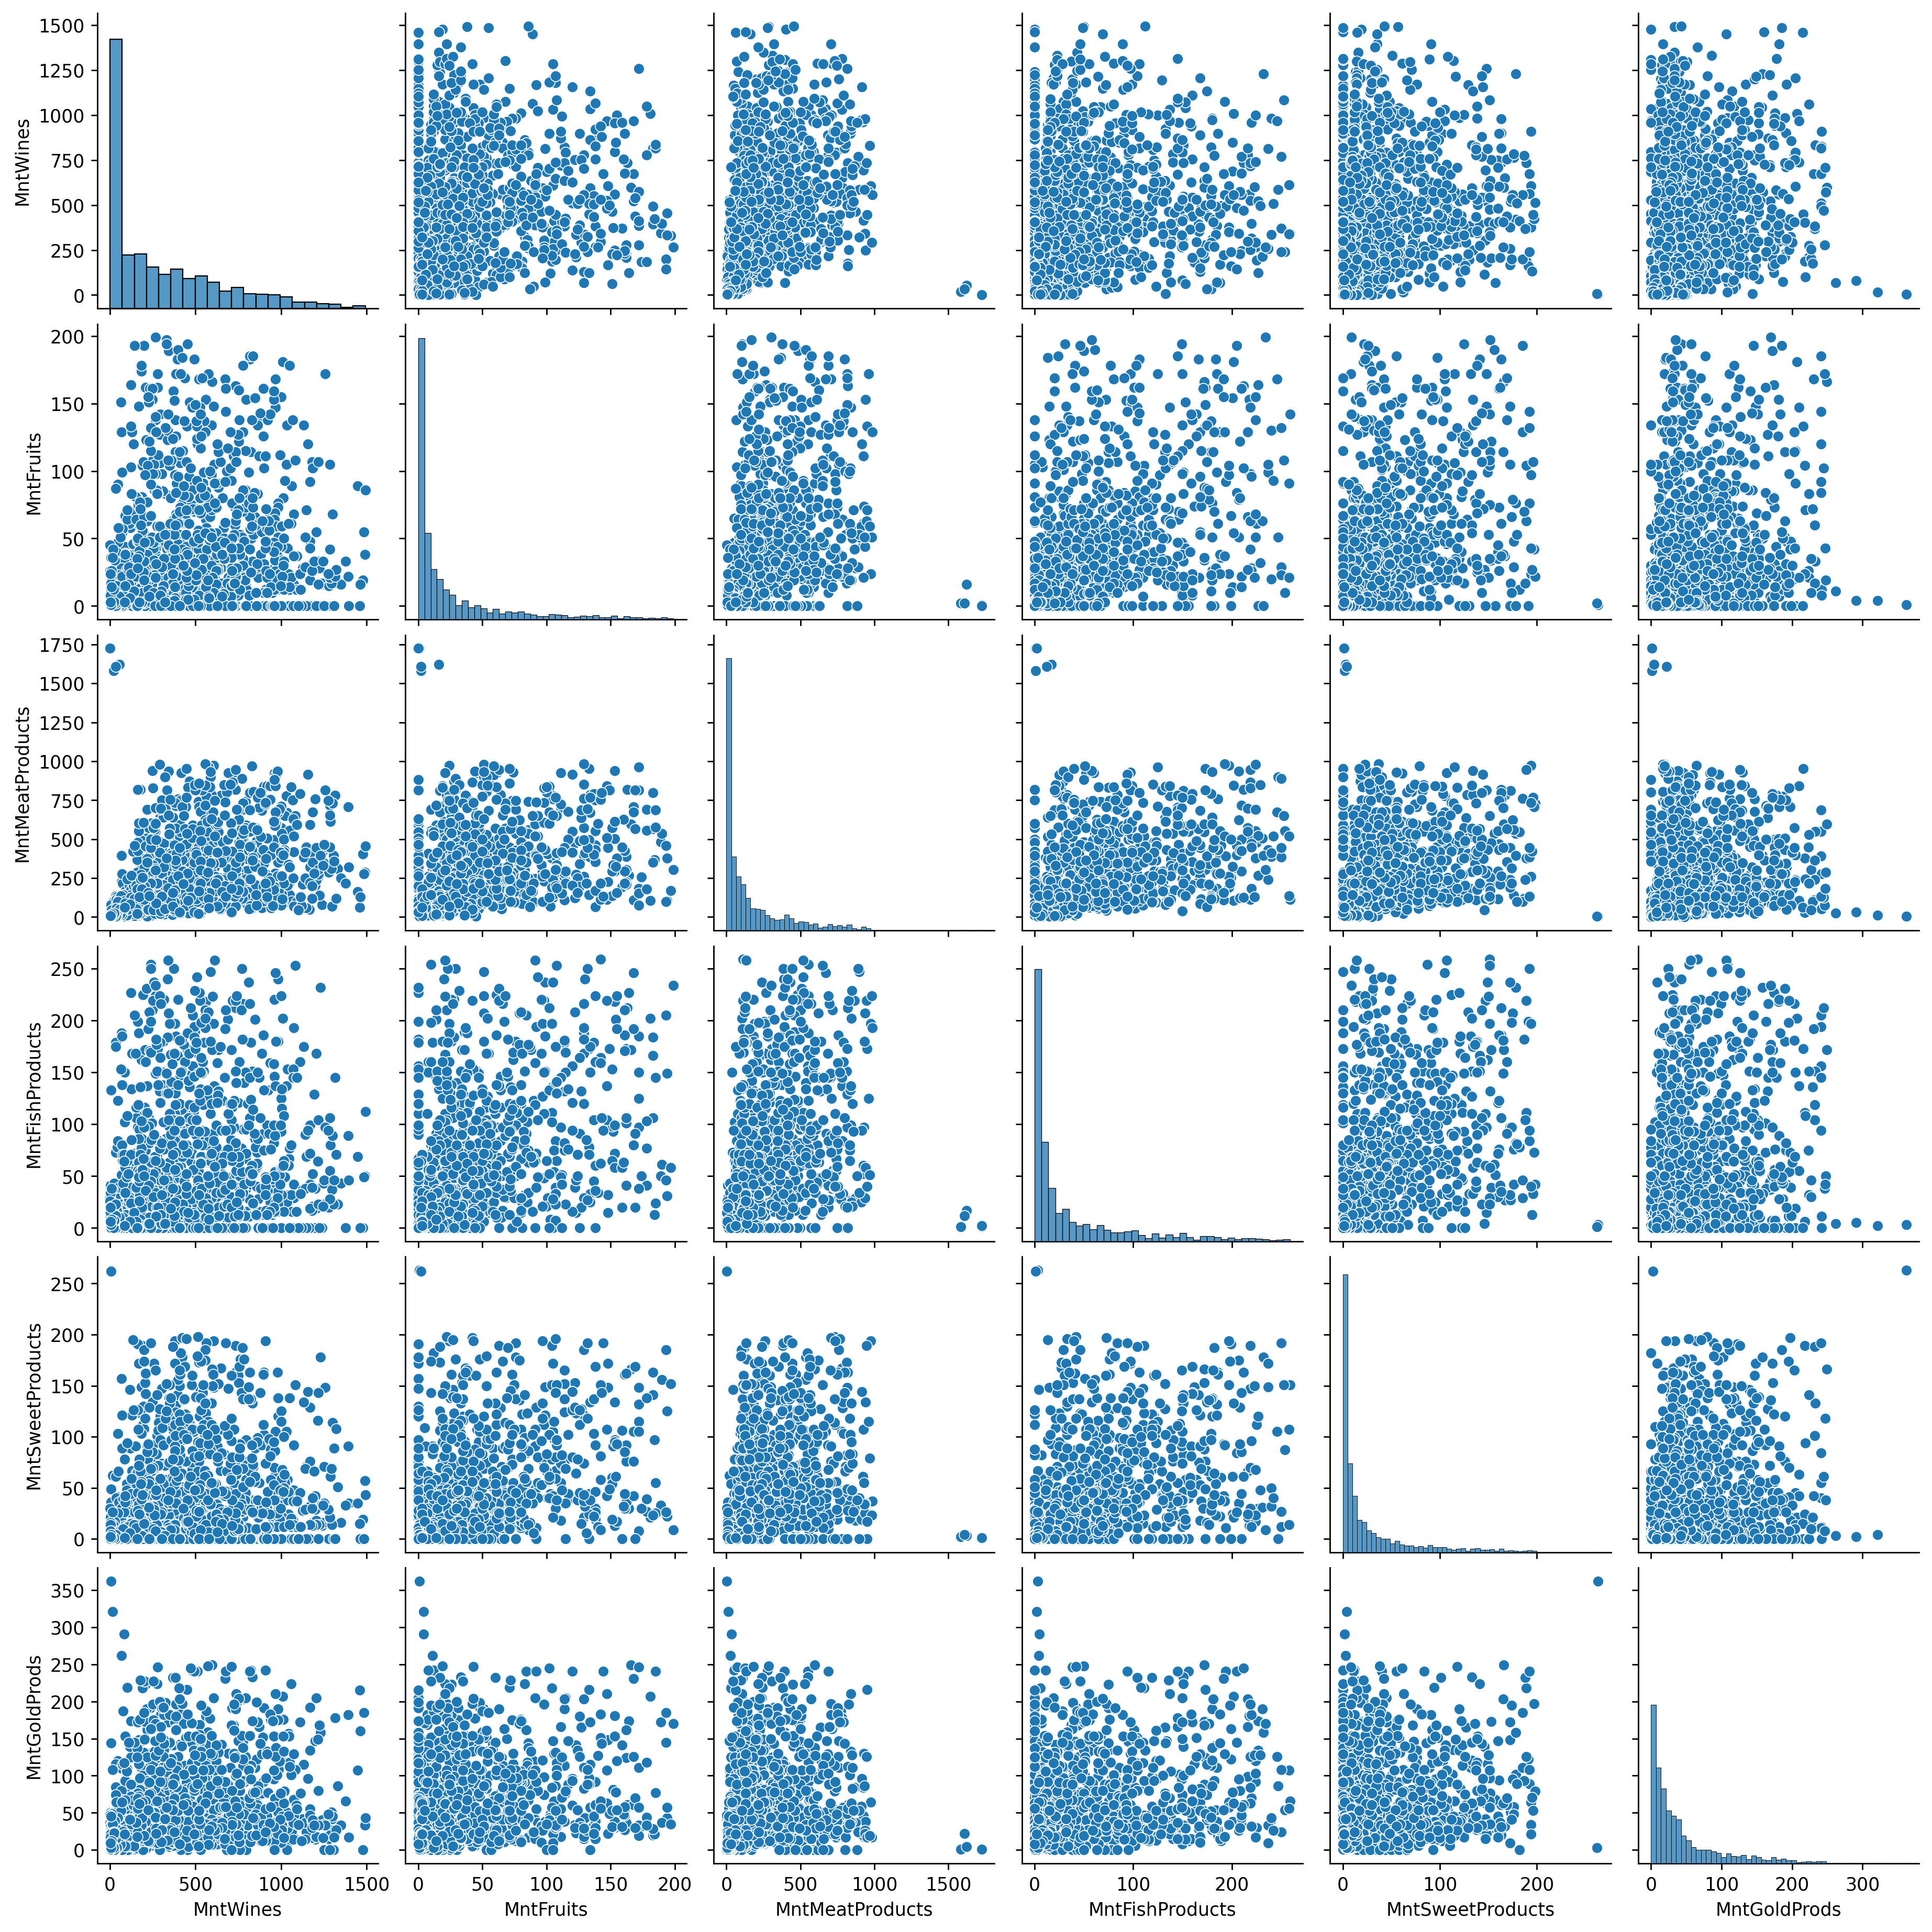

In [80]:
sns.pairplot(data[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',]])

- No strong linear correlation between products

- Outlier present in products

In [81]:
#Outliers present in wines
Wines_Out = data[data['MntWines'] > 1225.25]
print(len(Wines_Out))
Wines_Out

35


Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
111         1991         PhD         Single  68126.0        0         0   
161         1945         PhD        Married  70356.0        0         0   
293         1952      Master       Together  55951.0        0         1   
421         1941         PhD        Married  93027.0        0         0   
427         1961         PhD         Single  84865.0        0         0   
463         1955         PhD       Together  75261.0        0         0   
494         1971         PhD       Together  78642.0        0         1   
512         1975      Master         Single  81169.0        0         0   
520         1953  Graduation        Married  70503.0        0         0   
540         1982         PhD        Married  84169.0        0         0   
556         1959  Graduation       Together  87771.0        0         1   
821         1959  Graduation       Together  87771.0        0         1   
823         1954  Graduation        Married  93404.0        1         2   
867         1983         PhD       Together  70123.0        0         0   
914         1982         PhD        Married  84169.0        0         0   
934         1970         PhD        Married  67536.0        0         1   
984         1969  Graduation        Married  75759.0        0         0   
987         1954  Graduation       Divorced  85683.0        0         0   
998         1987         PhD         Single  95169.0        0         0   
1007        1979  Graduation       Together  77568.0        0         1   
1049        1949         PhD        Married  69098.0        0         0   
1188        1969      Master          Widow  67369.0        0         1   
1455        1970  Graduation         Single  93790.0        0         0   
1485        1955  Graduation        Married  76998.0        0         1   
1489        1988  Graduation       Together  87679.0        0         0   
1574        1947         PhD       Together  81574.0        0         0   
1638        1964         PhD       Divorced  64140.0        0         2   
1746        1949         PhD        Married  80360.0        0         0   
1919        1956  Graduation         Single  91249.0        0         0   
1950        1976         PhD       Together  72335.0        0         0   
1958        1962         PhD          Widow  71670.0        0         0   
1989        1947      Master         Single  91712.0        0         0   
2064        1952         PhD        Married  77610.0        0         1   
2095        1976      Master        Married  81929.0        1         0   
2124        1986         PhD        Married  82333.0        0         0   

     Dt_Customer  Recency  Complain  MntWines  MntFruits  MntMeatProducts  \
111   2012-11-10       40         0      1332         17              311   
161   2012-11-05       20         0      1349         16              249   
293   2012-08-23       62         0      1241          0               80   
421   2013-04-13       77         0      1285         42              716   
427   2013-05-09        1         0      1248         16              349   
463   2013-04-23       17         0      1239         17              413   
494   2013-04-21       83         0      1396          0              322   
512   2013-04-14       47         0      1288         20              613   
520   2012-09-30       73         0      1379         33              216   
540   2013-08-07        9         0      1478         19              403   
556   2013-05-22       61         0      1492         38              287   
821   2013-05-22       61         0      1492         38              287   
823   2013-05-07       97         0      1279         15              287   
867   2013-09-28       27         0      1308          0              396   
914   2013-08-07        9         0      1478         19              403   
934   2013-05-22       45         0      1253          0              447

In [82]:
#Outliers present in Fruits.
Fruits_Out = data[data['MntFruits'] > 81]
Fruits_Out

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
29          1965         PhD        Married  84618.0        0         0   
45          1976  Graduation         Single  79941.0        0         0   
53          1977  Graduation       Divorced  82582.0        0         0   
72          1959  Graduation        Married  65031.0        0         1   
...          ...         ...            ...      ...      ...       ...   
2169        1975  Graduation       Together  60934.0        0         1   
2182        1960  Graduation        Married  67716.0        0         1   
2200        1978  Graduation        Married  73807.0        0         1   
2203        1980  Graduation        Married  61014.0        0         1   
2214        1948         PhD          Widow  82032.0        0         0   

     Dt_Customer  Recency  Complain  MntWines  MntFruits  MntMeatProducts  \
0     2012-09-04       58         0       635         88              546   
29    2013-11-22       96         0       684        100              801   
45    2014-06-28       72         0       123        164              266   
53    2014-06-07       54         0       510        120              550   
72    2013-03-17       29         0       258        107              291   
...          ...      ...       ...       ...        ...              ...   
2169  2014-01-17       41         0       224        155              155   
2182  2013-01-10        8         0       530        142              217   
2200  2013-01-02       88         0       366        124              156   
2203  2012-08-11       17         0       269        129              495   
2214  2014-04-05       54         0       332        194              377   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
29                 21                66             0                  1   
45                227                30           174                  1   
53                156                40           241                  1   
72                 84                37            86                  4   
...               ...               ...           ...                ...   
2169              192                93            54                  2   
2182               62                 9            56                  4   
2200               71                78            54                  2   
2203              182                43            29                  4   
2214              149               125            57                  0   

      AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                0             0             0             0             0   
29               0             0             0             0             1   
45               0             0             0             0             0   
53               1             0             1             0             0   
72               0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2169             0             0             0             0             0   
2182             0             0             0             1             0   
2200             0             0             0             0             0   
2203             0             0             0             0             0   
2214             0             0             0             0             0   

      Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0            1                8                   10                  4   
29           0                6                    9                 10   
45           0                2                    4                  9   
53           1                

In [83]:
#Outliers present in Meat.
Meat_Out = data[data['MntMeatProducts'] > 556]
Meat_Out

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
21          1979  Graduation        Married   2447.0        1         0   
29          1965         PhD        Married  84618.0        0         0   
51          1964      Master        Married  79143.0        0         0   
76          1972      Master        Married  75251.0        0         0   
77          1976  Graduation         Single  75825.0        0         0   
...          ...         ...            ...      ...      ...       ...   
2187        1983      Master         Single  89616.0        0         0   
2190        1957    2n Cycle        Married  82347.0        0         0   
2208        1981  Graduation       Together  88325.0        0         0   
2210        1995    2n Cycle         Single  80617.0        0         0   
2225        1978    2n Cycle       Together  51381.5        0         0   

     Dt_Customer  Recency  Complain  MntWines  MntFruits  MntMeatProducts  \
21    2013-01-06       42         0         1          1             1725   
29    2013-11-22       96         0       684        100              801   
51    2012-08-11        2         0       650         37              780   
76    2012-08-27       34         0       721        111              925   
77    2012-10-12       40         0      1032        105              779   
...          ...      ...       ...       ...        ...              ...   
2187  2013-02-25       36         0       671         47              655   
2190  2012-11-06       38         0       556         54              845   
2208  2014-02-05       42         0       519         71              860   
2210  2012-10-12       42         0       594         51              631   
2225  2012-08-12       53         0        32          2             1607   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
21                  1                 1             1                  2   
29                 21                66             0                  1   
51                 27               167            32                  1   
76                 97                18            18                  1   
77                137               105            51                  0   
...               ...               ...           ...                ...   
2187              145               111            15                  1   
2190              202               133            63                  1   
2208               93                27            53                  1   
2210               72                55            32                  1   
2225               12                 4            22                  0   

      AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
21               0             0             0             0             0   
29               0             0             0             0             1   
51               0             0             0             0             0   
76               0             0             0             0             0   
77               0             0             1             0             0   
...            ...           ...           ...           ...           ...   
2187             0             0             0             0             0   
2190             1             0             1             0             0   
2208             0             0             0             0             0   
2210             0             0             0             0             0   
2225             0             0             0             1             0   

      Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
21           0                0                    2                  0   
29           0                6                    9                 10   
51           0                6                    9                 13   
76           1                

In [84]:
#Outliers present in Fist.
Fish_Out = data[data['MntFishProducts'] > 120.5]
Fish_Out

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
12          1959  Graduation       Divorced  63033.0        0         0   
17          1946  Graduation       Together  37760.0        0         0   
39          1943         PhD       Divorced  48948.0        0         0   
45          1976  Graduation         Single  79941.0        0         0   
...          ...         ...            ...      ...      ...       ...   
2185        1957      Master       Together  65487.0        0         0   
2187        1983      Master         Single  89616.0        0         0   
2190        1957    2n Cycle        Married  82347.0        0         0   
2203        1980  Graduation        Married  61014.0        0         1   
2214        1948         PhD          Widow  82032.0        0         0   

     Dt_Customer  Recency  Complain  MntWines  MntFruits  MntMeatProducts  \
0     2012-09-04       58         0       635         88              546   
12    2013-11-15       82         0       194         61              480   
17    2012-08-31       20         0        84          5               38   
39    2013-02-01       53         0       437          8              206   
45    2014-06-28       72         0       123        164              266   
...          ...      ...       ...       ...        ...              ...   
2185  2014-01-10       48         0       240         67              500   
2187  2013-02-25       36         0       671         47              655   
2190  2012-11-06       38         0       556         54              845   
2203  2012-08-11       17         0       269        129              495   
2214  2014-04-05       54         0       332        194              377   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
12                225               112            30                  1   
17                150                12            28                  2   
39                160                49            42                  2   
45                227                30           174                  1   
...               ...               ...           ...                ...   
2185              199                 0           163                  3   
2187              145               111            15                  1   
2190              202               133            63                  1   
2203              182                43            29                  4   
2214              149               125            57                  0   

      AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                0             0             0             0             0   
12               0             0             0             0             0   
17               0             0             0             0             0   
39               0             0             1             0             0   
45               0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2185             0             0             0             0             0   
2187             0             0             0             0             0   
2190             1             0             1             0             0   
2203             0             0             0             0             0   
2214             0             0             0             0             0   

      Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0            1                8                   10                  4   
12           0                3                    4                  8   
17           0                4                    1                  6   
39           1                

In [85]:
#Outliers present in Sweet.
Sweet_Out = data[data['MntSweetProducts'] > 81]
Sweet_Out

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
12          1959  Graduation       Divorced  63033.0        0         0   
27          1986  Graduation         Single  51381.5        1         0   
40          1980  Graduation        Married  80011.0        0         1   
51          1964      Master        Married  79143.0        0         0   
...          ...         ...            ...      ...      ...       ...   
2172        1975         PhD        Married  79174.0        0         0   
2187        1983      Master         Single  89616.0        0         0   
2190        1957    2n Cycle        Married  82347.0        0         0   
2214        1948         PhD          Widow  82032.0        0         0   
2232        1967  Graduation        Married  61223.0        0         1   

     Dt_Customer  Recency  Complain  MntWines  MntFruits  MntMeatProducts  \
0     2012-09-04       58         0       635         88              546   
12    2013-11-15       82         0       194         61              480   
27    2013-02-20       19         0         5          1                3   
40    2013-04-29        3         0       421         76              536   
51    2012-08-11        2         0       650         37              780   
...          ...      ...       ...       ...        ...              ...   
2172  2013-01-11        2         0      1074         37              518   
2187  2013-02-25       36         0       671         47              655   
2190  2012-11-06       38         0       556         54              845   
2214  2014-04-05       54         0       332        194              377   
2232  2013-06-13       46         0       709         43              182   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
12                225               112            30                  1   
27                  3               263           362                  0   
40                 82               178           102                  2   
51                 27               167            32                  1   
...               ...               ...           ...                ...   
2172              193                92           129                  1   
2187              145               111            15                  1   
2190              202               133            63                  1   
2214              149               125            57                  0   
2232               42               118           247                  2   

      AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                0             0             0             0             0   
12               0             0             0             0             0   
27               0             0             0             0             0   
40               0             0             0             0             0   
51               0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2172             1             0             0             0             1   
2187             0             0             0             0             0   
2190             1             0             1             0             0   
2214             0             0             0             0             0   
2232             0             0             0             0             0   

      Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0            1                8                   10                  4   
12           0                3                    4                  8   
27           0                4                    0                  0   
40           0                

In [86]:
#Outliers present in Sweet.
Gold_Out = data[data['MntGoldProds'] > 126.5]
Gold_Out

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
18          1949      Master        Married  76995.0        0         1   
27          1986  Graduation         Single  51381.5        1         0   
45          1976  Graduation         Single  79941.0        0         0   
53          1977  Graduation       Divorced  82582.0        0         0   
55          1955      Master       Together  82384.0        0         0   
...          ...         ...            ...      ...      ...       ...   
2175        1971  Graduation        Married  52914.0        0         1   
2185        1957      Master       Together  65487.0        0         0   
2191        1957  Graduation        Married  73803.0        0         1   
2195        1954  Graduation        Married  50501.0        1         1   
2232        1967  Graduation        Married  61223.0        0         1   

     Dt_Customer  Recency  Complain  MntWines  MntFruits  MntMeatProducts  \
18    2013-03-28       91         0      1012         80              498   
27    2013-02-20       19         0         5          1                3   
45    2014-06-28       72         0       123        164              266   
53    2014-06-07       54         0       510        120              550   
55    2012-11-19       55         0       984         51              432   
...          ...      ...       ...       ...        ...              ...   
2175  2013-01-07       32         0       254         10               44   
2185  2014-01-10       48         0       240         67              500   
2191  2012-08-01       61         0       833         80              363   
2195  2013-06-18       10         0       297          0               38   
2232  2013-06-13       46         0       709         43              182   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
18                  0                16           176                  2   
27                  3               263           362                  0   
45                227                30           174                  1   
53                156                40           241                  1   
55                180               120           190                  1   
...               ...               ...           ...                ...   
2175               30                10           227                  2   
2185              199                 0           163                  3   
2191               52                26           174                  2   
2195               13                 0           152                  2   
2232               42               118           247                  2   

      AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
18               1             0             0             0             0   
27               0             0             0             0             0   
45               0             0             0             0             0   
53               1             0             1             0             0   
55               0             0             0             0             1   
...            ...           ...           ...           ...           ...   
2175             0             0             1             0             0   
2185             0             0             0             0             0   
2191             0             0             1             0             0   
2195             0             0             1             0             0   
2232             0             0             0             0             0   

      Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
18           0               11                    4                  9   
27           0                4                    0                  0   
45           0                2                    4                  9   
53           1                

In [87]:
#Merge all outliers using concat.
Outliers = pd.concat([Wines_Out,Fruits_Out,Meat_Out,Fish_Out,Sweet_Out,Gold_Out])
Outliers.reset_index(drop=True, inplace=True)
Outliers

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1991         PhD         Single  68126.0        0         0   
1           1945         PhD        Married  70356.0        0         0   
2           1952      Master       Together  55951.0        0         1   
3           1941         PhD        Married  93027.0        0         0   
4           1961         PhD         Single  84865.0        0         0   
...          ...         ...            ...      ...      ...       ...   
1107        1971  Graduation        Married  52914.0        0         1   
1108        1957      Master       Together  65487.0        0         0   
1109        1957  Graduation        Married  73803.0        0         1   
1110        1954  Graduation        Married  50501.0        1         1   
1111        1967  Graduation        Married  61223.0        0         1   

     Dt_Customer  Recency  Complain  MntWines  MntFruits  MntMeatProducts  \
0     2012-11-10       40         0      1332         17              311   
1     2012-11-05       20         0      1349         16              249   
2     2012-08-23       62         0      1241          0               80   
3     2013-04-13       77         0      1285         42              716   
4     2013-05-09        1         0      1248         16              349   
...          ...      ...       ...       ...        ...              ...   
1107  2013-01-07       32         0       254         10               44   
1108  2014-01-10       48         0       240         67              500   
1109  2012-08-01       61         0       833         80              363   
1110  2013-06-18       10         0       297          0               38   
1111  2013-06-13       46         0       709         43              182   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                  23                51            86                  1   
1                  43                16            33                  2   
2                   0                13            40                  3   
3                  55                 0            21                  0   
4                  43                16            16                  1   
...               ...               ...           ...                ...   
1107               30                10           227                  2   
1108              199                 0           163                  3   
1109               52                26           174                  2   
1110               13                 0           152                  2   
1111               42               118           247                  2   

      AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                0             0             0             1             0   
1                0             0             0             0             0   
2                0             1             0             1             0   
3                0             0             0             0             1   
4                1             1             0             1             1   
...            ...           ...           ...           ...           ...   
1107             0             0             1             0             0   
1108             0             0             0             0             0   
1109             0             0             1             0             0   
1110             0             0             1             0             0   
1111             0             0             0             0             0   

      Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0            1                7                    4                  5   
1            0               10                    6                  9   
2            0                3                    6                 11   
3            0                

In [88]:
#Check duplicates.
Outliers[Outliers.duplicated()]

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
11          1959  Graduation       Together  87771.0        0         1   
14          1982         PhD        Married  84169.0        0         0   
77          1963  Graduation        Married  80124.0        0         0   
93          1970    2n Cycle        Married  62466.0        0         1   
120         1972         PhD         Single  86857.0        0         0   
...          ...         ...            ...      ...      ...       ...   
1102        1954  Graduation       Divorced  72071.0        0         1   
1103        1984  Graduation        Married  90000.0        0         0   
1106        1975         PhD        Married  79174.0        0         0   
1108        1957      Master       Together  65487.0        0         0   
1111        1967  Graduation        Married  61223.0        0         1   

     Dt_Customer  Recency  Complain  MntWines  MntFruits  MntMeatProducts  \
11    2013-05-22       61         0      1492         38              287   
14    2013-08-07        9         0      1478         19              403   
77    2014-06-26       47         0       483         84              398   
93    2014-01-15       13         0       129        129              259   
120   2012-09-12       96         0       899        102              838   
...          ...      ...       ...       ...        ...              ...   
1102  2013-02-14        4         0       531         69              300   
1103  2013-12-23       91         0       675        144              133   
1106  2013-01-11        2         0      1074         37              518   
1108  2014-01-10       48         0       240         67              500   
1111  2013-06-13       46         0       709         43              182   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
11                 50                57            33                  1   
14                  0                19             0                  1   
77                205                84           241                  1   
93                168               121            83                  5   
120               133               102            40                  1   
...               ...               ...           ...                ...   
1102              150               138           150                  3   
1103               94               192           241                  1   
1106              193                92           129                  1   
1108              199                 0           163                  3   
1111               42               118           247                  2   

      AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
11               1             1             0             1             1   
14               0             0             0             1             1   
77               0             0             1             0             0   
93               0             0             0             0             0   
120              0             0             0             0             0   
...            ...           ...           ...           ...           ...   
1102             0             0             0             0             0   
1103             1             0             1             0             1   
1106             1             0             0             0             1   
1108             0             0             0             0             0   
1111             0             0             0             0             0   

      Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
11           1                5                   10                  4   
14           1                7                    6                  6   
77           0                3                    7                  8   
93           0                

In [89]:
#Remove duplicates.
Outliers.drop_duplicates(keep='first', inplace=True)
Outliers.reset_index(drop=True, inplace=True)
Outliers

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0          1991         PhD         Single  68126.0        0         0   
1          1945         PhD        Married  70356.0        0         0   
2          1952      Master       Together  55951.0        0         1   
3          1941         PhD        Married  93027.0        0         0   
4          1961         PhD         Single  84865.0        0         0   
..          ...         ...            ...      ...      ...       ...   
570        1970    2n Cycle       Divorced  65706.0        0         0   
571        1951  Graduation        Married  71965.0        0         1   
572        1971  Graduation        Married  52914.0        0         1   
573        1957  Graduation        Married  73803.0        0         1   
574        1954  Graduation        Married  50501.0        1         1   

    Dt_Customer  Recency  Complain  MntWines  MntFruits  MntMeatProducts  \
0    2012-11-10       40         0      1332         17              311   
1    2012-11-05       20         0      1349         16              249   
2    2012-08-23       62         0      1241          0               80   
3    2013-04-13       77         0      1285         42              716   
4    2013-05-09        1         0      1248         16              349   
..          ...      ...       ...       ...        ...              ...   
570  2013-06-28       77         0       918         10              129   
571  2013-07-29       21         0       572         19              286   
572  2013-01-07       32         0       254         10               44   
573  2012-08-01       61         0       833         80              363   
574  2013-06-18       10         0       297          0               38   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 23                51            86                  1   
1                 43                16            33                  2   
2                  0                13            40                  3   
3                 55                 0            21                  0   
4                 43                16            16                  1   
..               ...               ...           ...                ...   
570               13                 0           129                  1   
571               50                38           248                  3   
572               30                10           227                  2   
573               52                26           174                  2   
574               13                 0           152                  2   

     AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0               0             0             0             1             0   
1               0             0             0             0             0   
2               0             1             0             1             0   
3               0             0             0             0             1   
4               1             1             0             1             1   
..            ...           ...           ...           ...           ...   
570             0             1             0             1             1   
571             0             0             0             0             0   
572             0             0             1             0             0   
573             0             0             1             0             0   
574             0             0             1             0             0   

     Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0           1                7                    4                  5   
1           0               10                    6                  9   
2           0                3                    6                 11   
3           0                7                   10                  5   
4      

In [90]:
#Percentage of outliers present in dataset.
print('Outliers = ', "%s%%"%round((575/2237)*100, 2))

Outliers =  25.7%


In [91]:
#Adding age variable.
data['Age'] = 2014 - data['Year_Birth']
data

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2232        1967  Graduation        Married  61223.0        0         1   
2233        1946         PhD       Together  64014.0        2         1   
2234        1981  Graduation       Divorced  56981.0        0         0   
2235        1956      Master       Together  69245.0        0         1   
2236        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  Complain  MntWines  MntFruits  MntMeatProducts  \
0     2012-09-04       58         0       635         88              546   
1     2014-03-08       38         0        11          1                6   
2     2013-08-21       26         0       426         49              127   
3     2014-02-10       26         0        11          4               20   
4     2014-01-19       94         0       173         43              118   
...          ...      ...       ...       ...        ...              ...   
2232  2013-06-13       46         0       709         43              182   
2233  2014-06-10       56         0       406          0               30   
2234  2014-01-25       91         0       908         48              217   
2235  2014-01-24        8         0       428         30              214   
2236  2012-10-15       40         0        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2232               42               118           247                  2   
2233                0                 0             8                  2   
2234               32                12            24                  1   
2235               80                30            61                  2   
2236                2                 1            21                  3   

      AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2232             0             0             0             0             0   
2233             1             0             0             0             0   
2234             0             0             0             1             0   
2235             0             0             0             0             0   
2236             0             0             0             0             0   

      Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0            1                8                   10                  4   
1            0                1                    1                  2   
2            0                8                    2                 10   
3            0                

- Encoding

In [92]:
#Ordinal encoding  for independent variables

from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

data_encode = data.copy()

data_encode[['Education','Marital_Status']] = oe.fit_transform(data[['Education','Marital_Status']])
data_encode

Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0           1957        2.0             4.0  58138.0        0         0   
1           1954        2.0             4.0  46344.0        1         1   
2           1965        2.0             5.0  71613.0        0         0   
3           1984        2.0             5.0  26646.0        1         0   
4           1981        4.0             3.0  58293.0        1         0   
...          ...        ...             ...      ...      ...       ...   
2232        1967        2.0             3.0  61223.0        0         1   
2233        1946        4.0             5.0  64014.0        2         1   
2234        1981        2.0             2.0  56981.0        0         0   
2235        1956        3.0             5.0  69245.0        0         1   
2236        1954        4.0             3.0  52869.0        1         1   

     Dt_Customer  Recency  Complain  MntWines  MntFruits  MntMeatProducts  \
0     2012-09-04       58         0       635         88              546   
1     2014-03-08       38         0        11          1                6   
2     2013-08-21       26         0       426         49              127   
3     2014-02-10       26         0        11          4               20   
4     2014-01-19       94         0       173         43              118   
...          ...      ...       ...       ...        ...              ...   
2232  2013-06-13       46         0       709         43              182   
2233  2014-06-10       56         0       406          0               30   
2234  2014-01-25       91         0       908         48              217   
2235  2014-01-24        8         0       428         30              214   
2236  2012-10-15       40         0        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2232               42               118           247                  2   
2233                0                 0             8                  2   
2234               32                12            24                  1   
2235               80                30            61                  2   
2236                2                 1            21                  3   

      AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2232             0             0             0             0             0   
2233             1             0             0             0             0   
2234             0             0             0             1             0   
2235             0             0             0             0             0   
2236             0             0             0             0             0   

      Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0            1                8                   10                  4   
1            0                1                    1                  2   
2            0                8                    2                 10   
3            0                

- Delete Dt_Customer, Month, Complain, year and Age.

In [93]:
data_encode.drop(columns=['Dt_Customer','Month','Complain','Year','Age'], axis=1, inplace=True)
data_encode

Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0           1957        2.0             4.0  58138.0        0         0   
1           1954        2.0             4.0  46344.0        1         1   
2           1965        2.0             5.0  71613.0        0         0   
3           1984        2.0             5.0  26646.0        1         0   
4           1981        4.0             3.0  58293.0        1         0   
...          ...        ...             ...      ...      ...       ...   
2232        1967        2.0             3.0  61223.0        0         1   
2233        1946        4.0             5.0  64014.0        2         1   
2234        1981        2.0             2.0  56981.0        0         0   
2235        1956        3.0             5.0  69245.0        0         1   
2236        1954        4.0             3.0  52869.0        1         1   

      Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0          58       635         88              546              172   
1          38        11          1                6                2   
2          26       426         49              127              111   
3          26        11          4               20               10   
4          94       173         43              118               46   
...       ...       ...        ...              ...              ...   
2232       46       709         43              182               42   
2233       56       406          0               30                0   
2234       91       908         48              217               32   
2235        8       428         30              214               80   
2236       40        84          3               61                2   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  AcceptedCmp1  \
0                   88            88                  3             0   
1                    1             6                  2             0   
2                   21            42                  1             0   
3                    3             5                  2             0   
4                   27            15                  5             0   
...                ...           ...                ...           ...   
2232               118           247                  2             0   
2233                 0             8                  2             1   
2234                12            24                  1             0   
2235                30            61                  2             0   
2236                 1            21                  3             0   

      AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  Response  \
0                0             0             0             0         1   
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0             0             0         0   
4                0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2232             0             0             0             0         0   
2233             0             0             0             0         0   
2234             0             0             1             0         0   
2235             0             0             0             0         0   
2236             0             0             0             0         1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2232               

- Standardization

In [94]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data_std = pd.DataFrame(sc.fit_transform(data_encode), columns=data_encode.columns)
data_std

Year_Birth  Education  Marital_Status    Income   Kidhome  Teenhome  \
0      -1.017296  -0.352044        0.250983  0.317093 -0.825388 -0.930227   
1      -1.273722  -0.352044        0.250983 -0.256553  1.032151  0.906417   
2      -0.333495  -0.352044        1.180536  0.972500 -0.825388 -0.930227   
3       1.290534  -0.352044        1.180536 -1.214639  1.032151 -0.930227   
4       1.034108   1.429682       -0.678569  0.324632  1.032151 -0.930227   
...          ...        ...             ...       ...       ...       ...   
2232   -0.162544  -0.352044       -0.678569  0.467143 -0.825388  0.906417   
2233   -1.957523   1.429682        1.180536  0.602894  2.889690  0.906417   
2234    1.034108  -0.352044       -1.608122  0.260818 -0.825388 -0.930227   
2235   -1.102771   0.538819        1.180536  0.857324 -0.825388  0.906417   
2236   -1.273722   1.429682       -0.678569  0.060815  1.032151  0.906417   

       Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0     0.307272  0.983671   1.554623         1.680253         2.461700   
1    -0.383584 -0.870717  -0.636422        -0.713250        -0.650275   
2    -0.798098  0.362570   0.572430        -0.176928         1.345050   
3    -0.798098 -0.870717  -0.560868        -0.651196        -0.503829   
4     1.550812 -0.389289   0.421324        -0.216820         0.155177   
...        ...       ...        ...              ...              ...   
2232 -0.107242  1.203582   0.421324         0.066855         0.081954   
2233  0.238186  0.303134  -0.661606        -0.606872        -0.686886   
2234  1.447184  1.794966   0.547246         0.221989        -0.101103   
2235 -1.419868  0.368513   0.093927         0.208692         0.777572   
2236 -0.314498 -0.653777  -0.586053        -0.469467        -0.650275   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  AcceptedCmp1  \
0             1.475877      0.846061           0.698877     -0.262299   
1            -0.631440     -0.729569          -0.047370     -0.262299   
2            -0.147000     -0.037829          -0.793618     -0.262299   
3            -0.582996     -0.748784          -0.047370     -0.262299   
4            -0.001667     -0.556634           2.191372     -0.262299   
...                ...           ...                ...           ...   
2232          2.202538      3.901246          -0.047370     -0.262299   
2233         -0.655663     -0.691139          -0.047370      3.812443   
2234         -0.364998     -0.383699          -0.793618     -0.262299   
2235          0.070999      0.327256          -0.047370     -0.262299   
2236         -0.631440     -0.441344           0.698877     -0.262299   

      AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  Response  \
0         -0.11659     -0.280343     -0.284036     -0.279414  2.386966   
1         -0.11659     -0.280343     -0.284036     -0.279414 -0.418942   
2         -0.11659     -0.280343     -0.284036     -0.279414 -0.418942   
3         -0.11659     -0.280343     -0.284036     -0.279414 -0.418942   
4         -0.11659     -0.280343     -0.284036     -0.279414 -0.418942   
...            ...           ...           ...           ...       ...   
2232      -0.11659     -0.280343     -0.284036     -0.279414 -0.418942   
2233      -0.11659     -0.280343     -0.284036     -0.279414 -0.418942   
2234      -0.11659     -0.280343      3.520683     -0.279414 -0.418942   
2235      -0.11659     -0.280343     -0.284036     -0.279414 -0.418942   
2236      -0.11659     -0.280343     -0.284036     -0.279414  2.386966   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0            1.504693             2.836185          -0.552077   
1           -1.160992            -0.586515          -1.167421   
2            1.504693            -0.206215           1.293956   
3           -0.780180            -0.966815          -0.552077   
4            0.362257             0.174085           0.063267   
...               ...                  ...      

###### Model Building

- There are three clustering technique.  
1) Hierarchical Clustering(Agglomerative Clustering)  
2) K-Means  
3) DBSCAN

###### 1) Hierarchical Clustering

In [95]:
#Libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

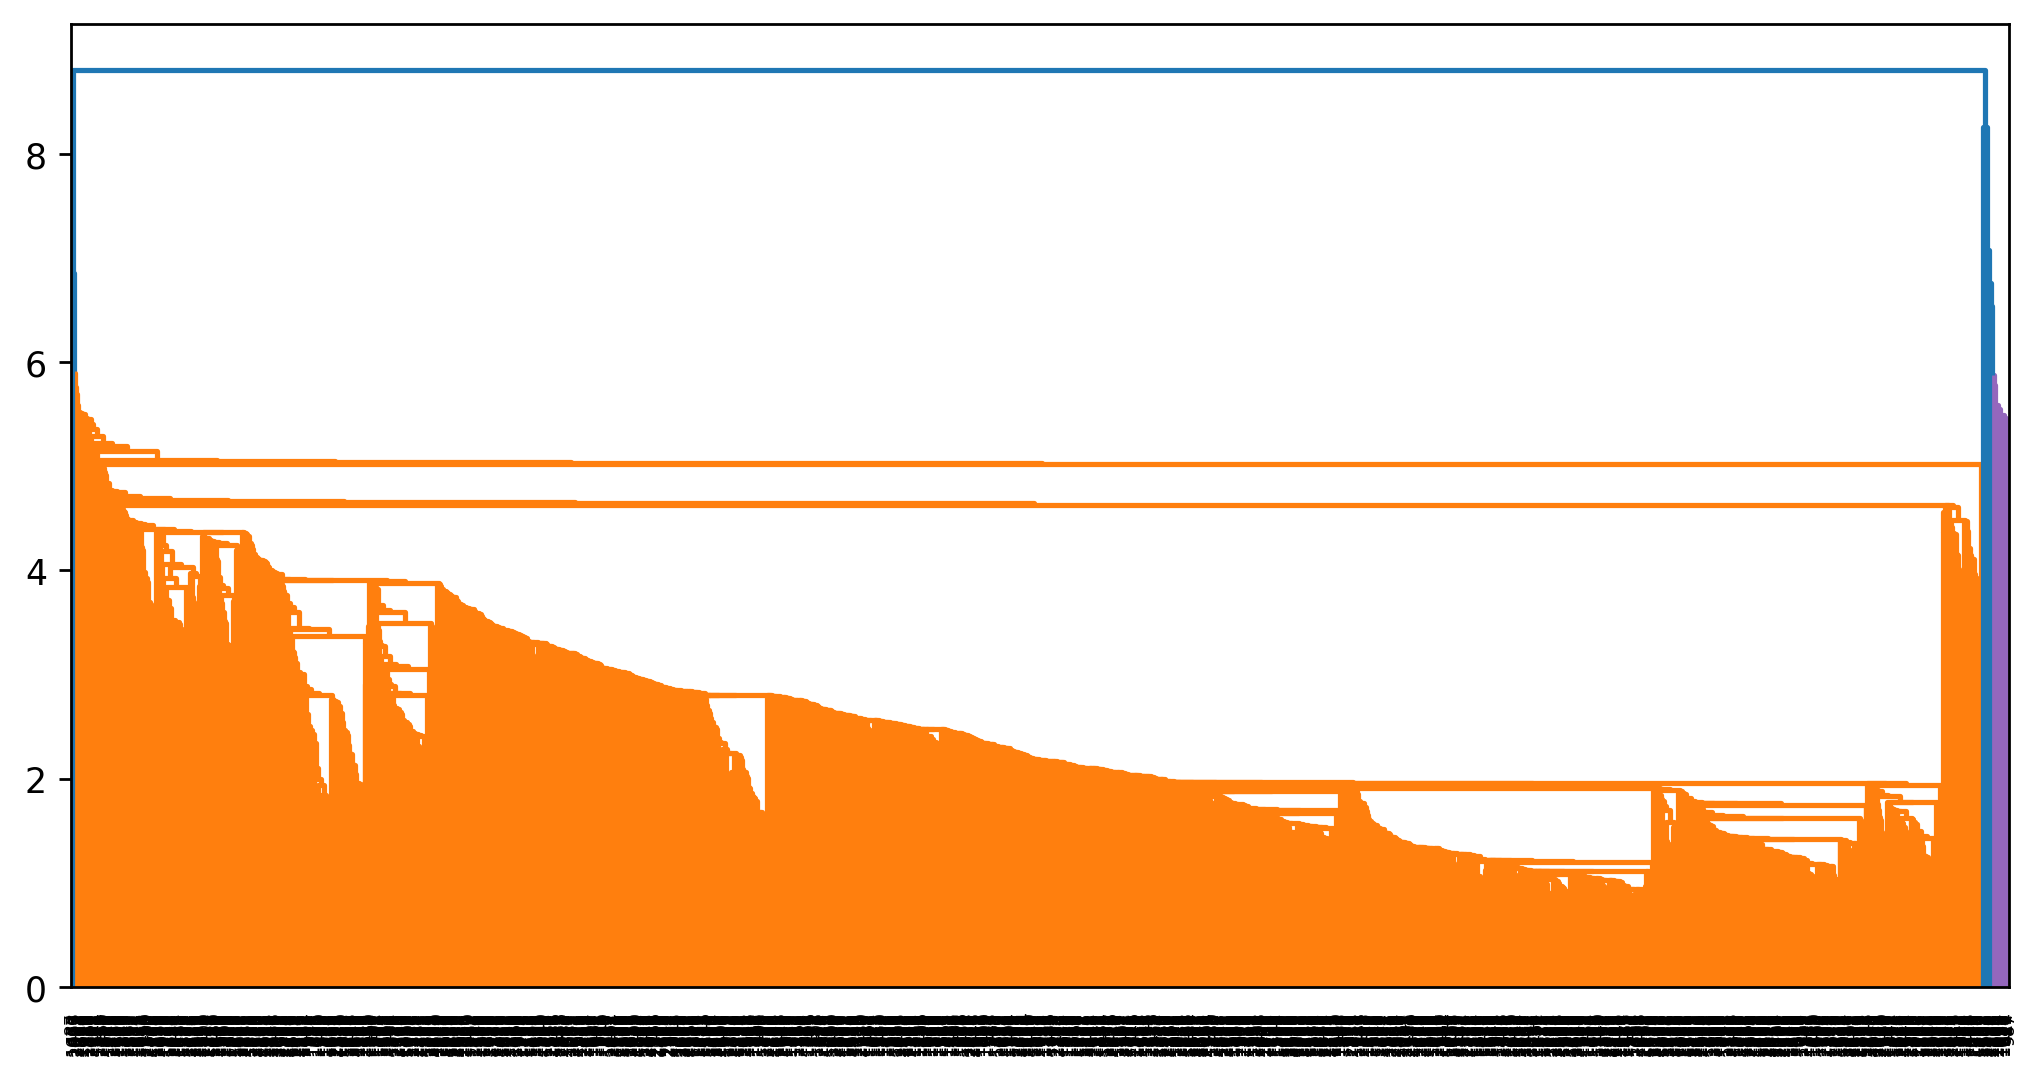

In [96]:
Dendrogram = sch.dendrogram(sch.linkage(data_std, method='single', metric='euclidean'))

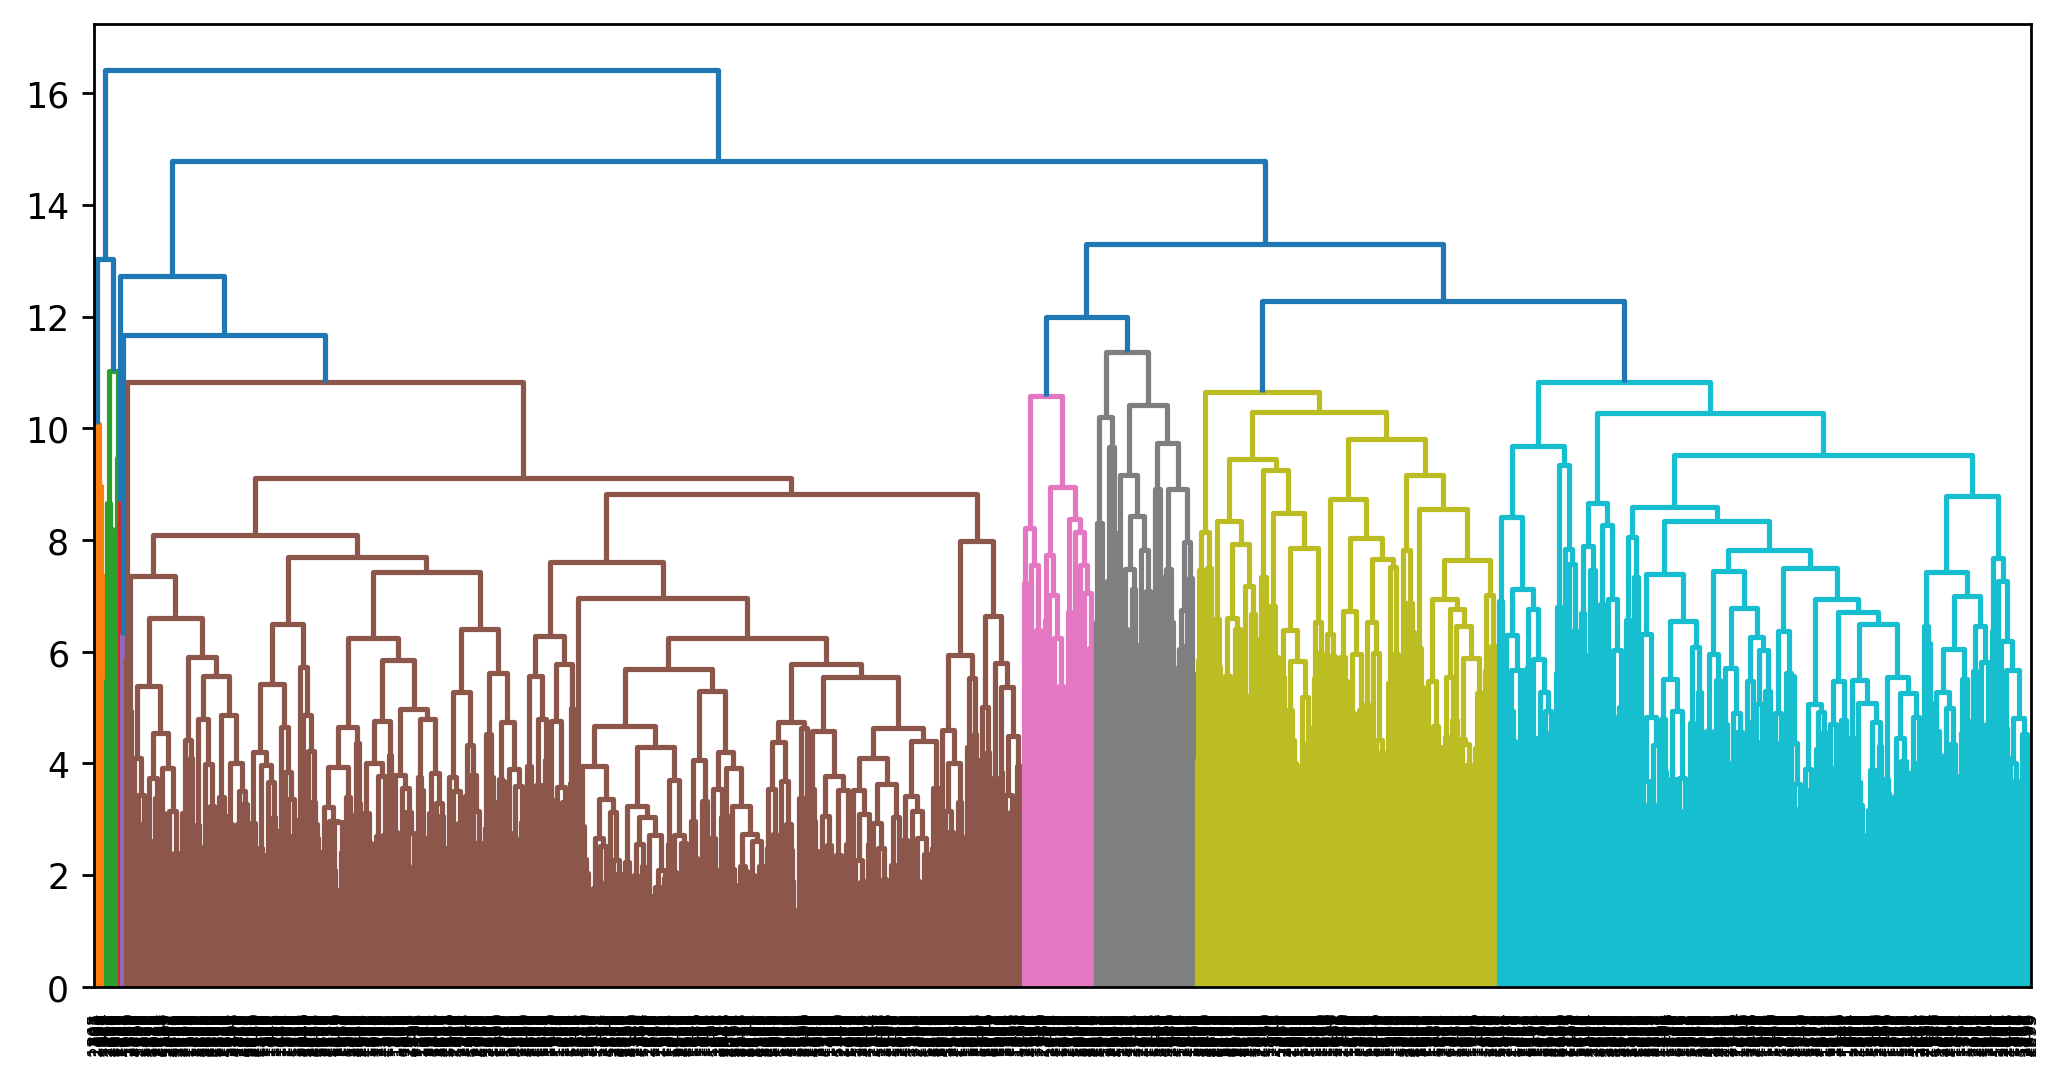

In [97]:
Dendrogram = sch.dendrogram(sch.linkage(data_std, method='complete', metric='euclidean'))

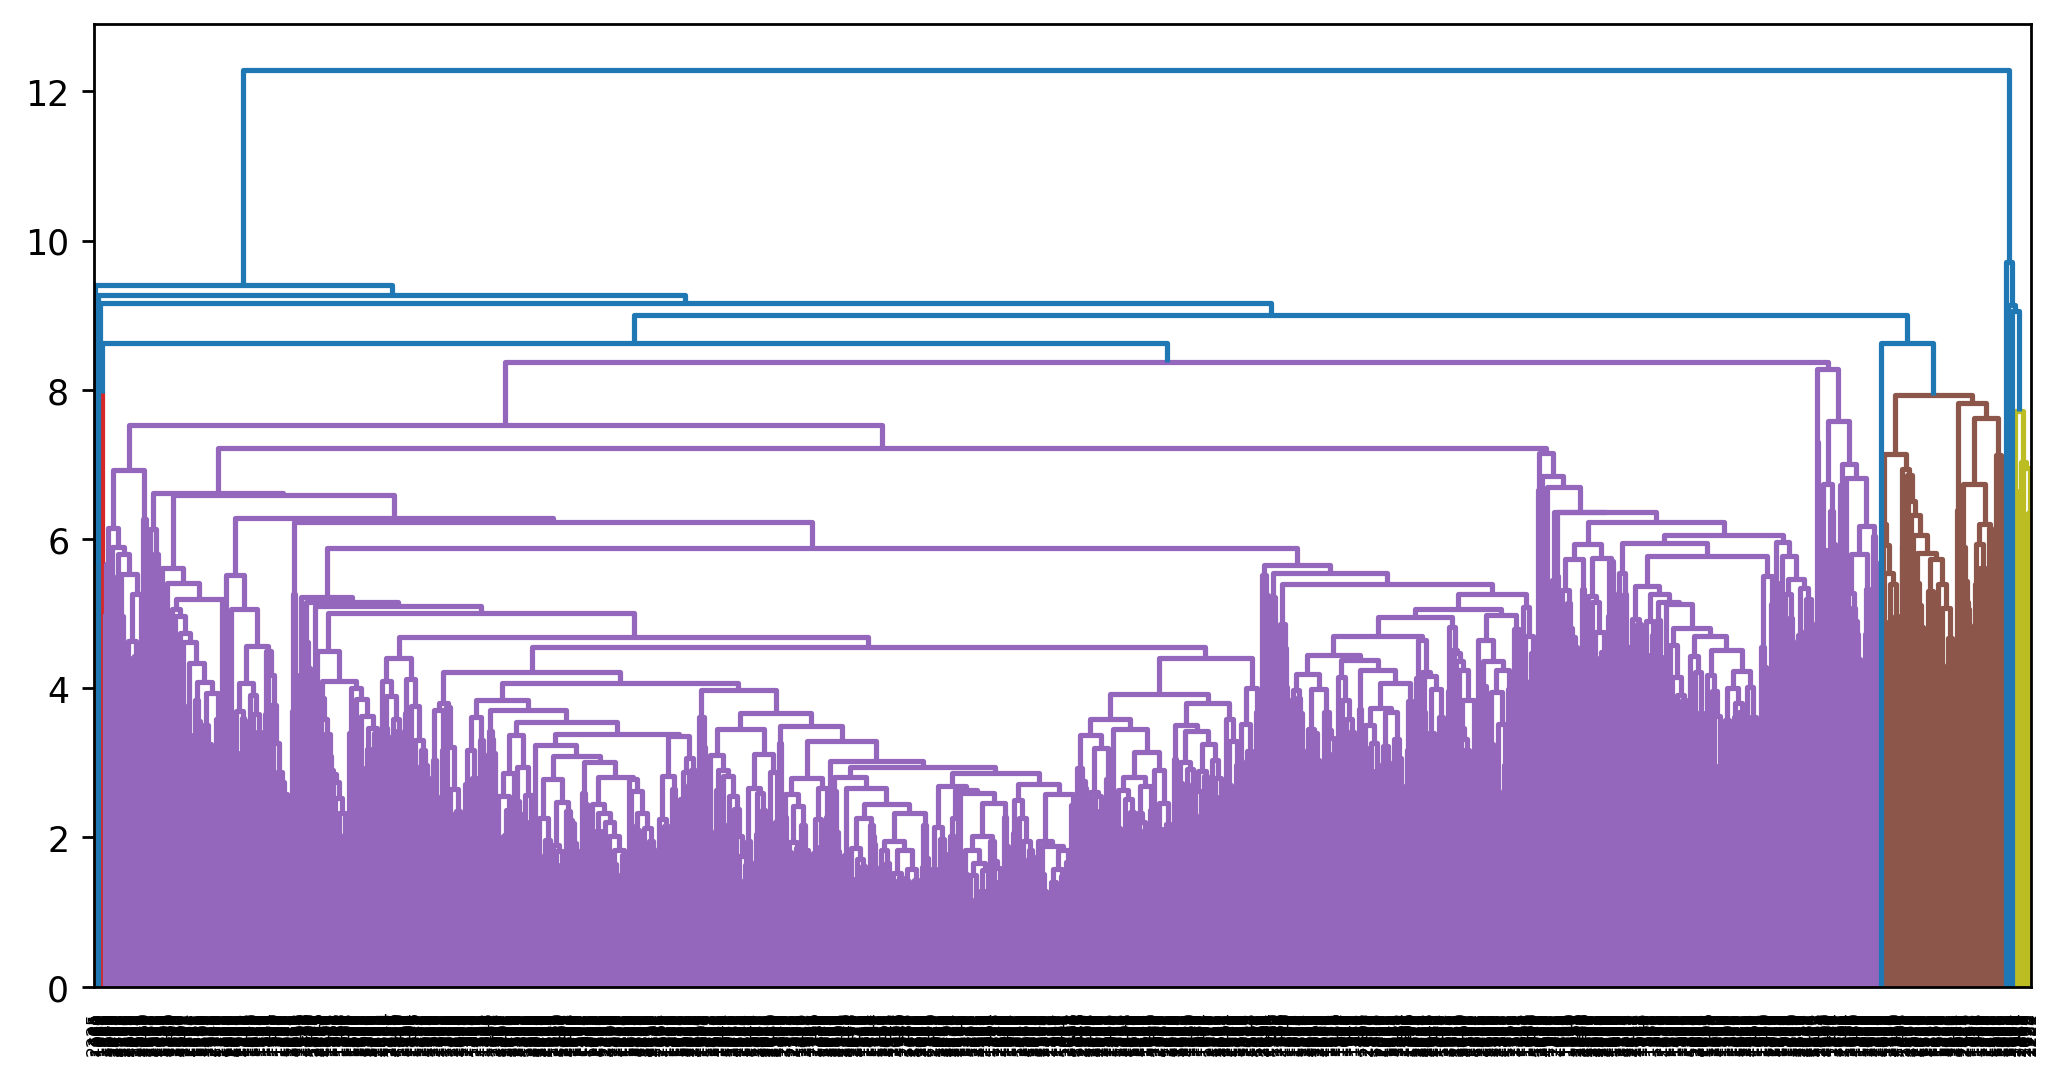

In [98]:
Dendrogram = sch.dendrogram(sch.linkage(data_std, method='average', metric='euclidean'))

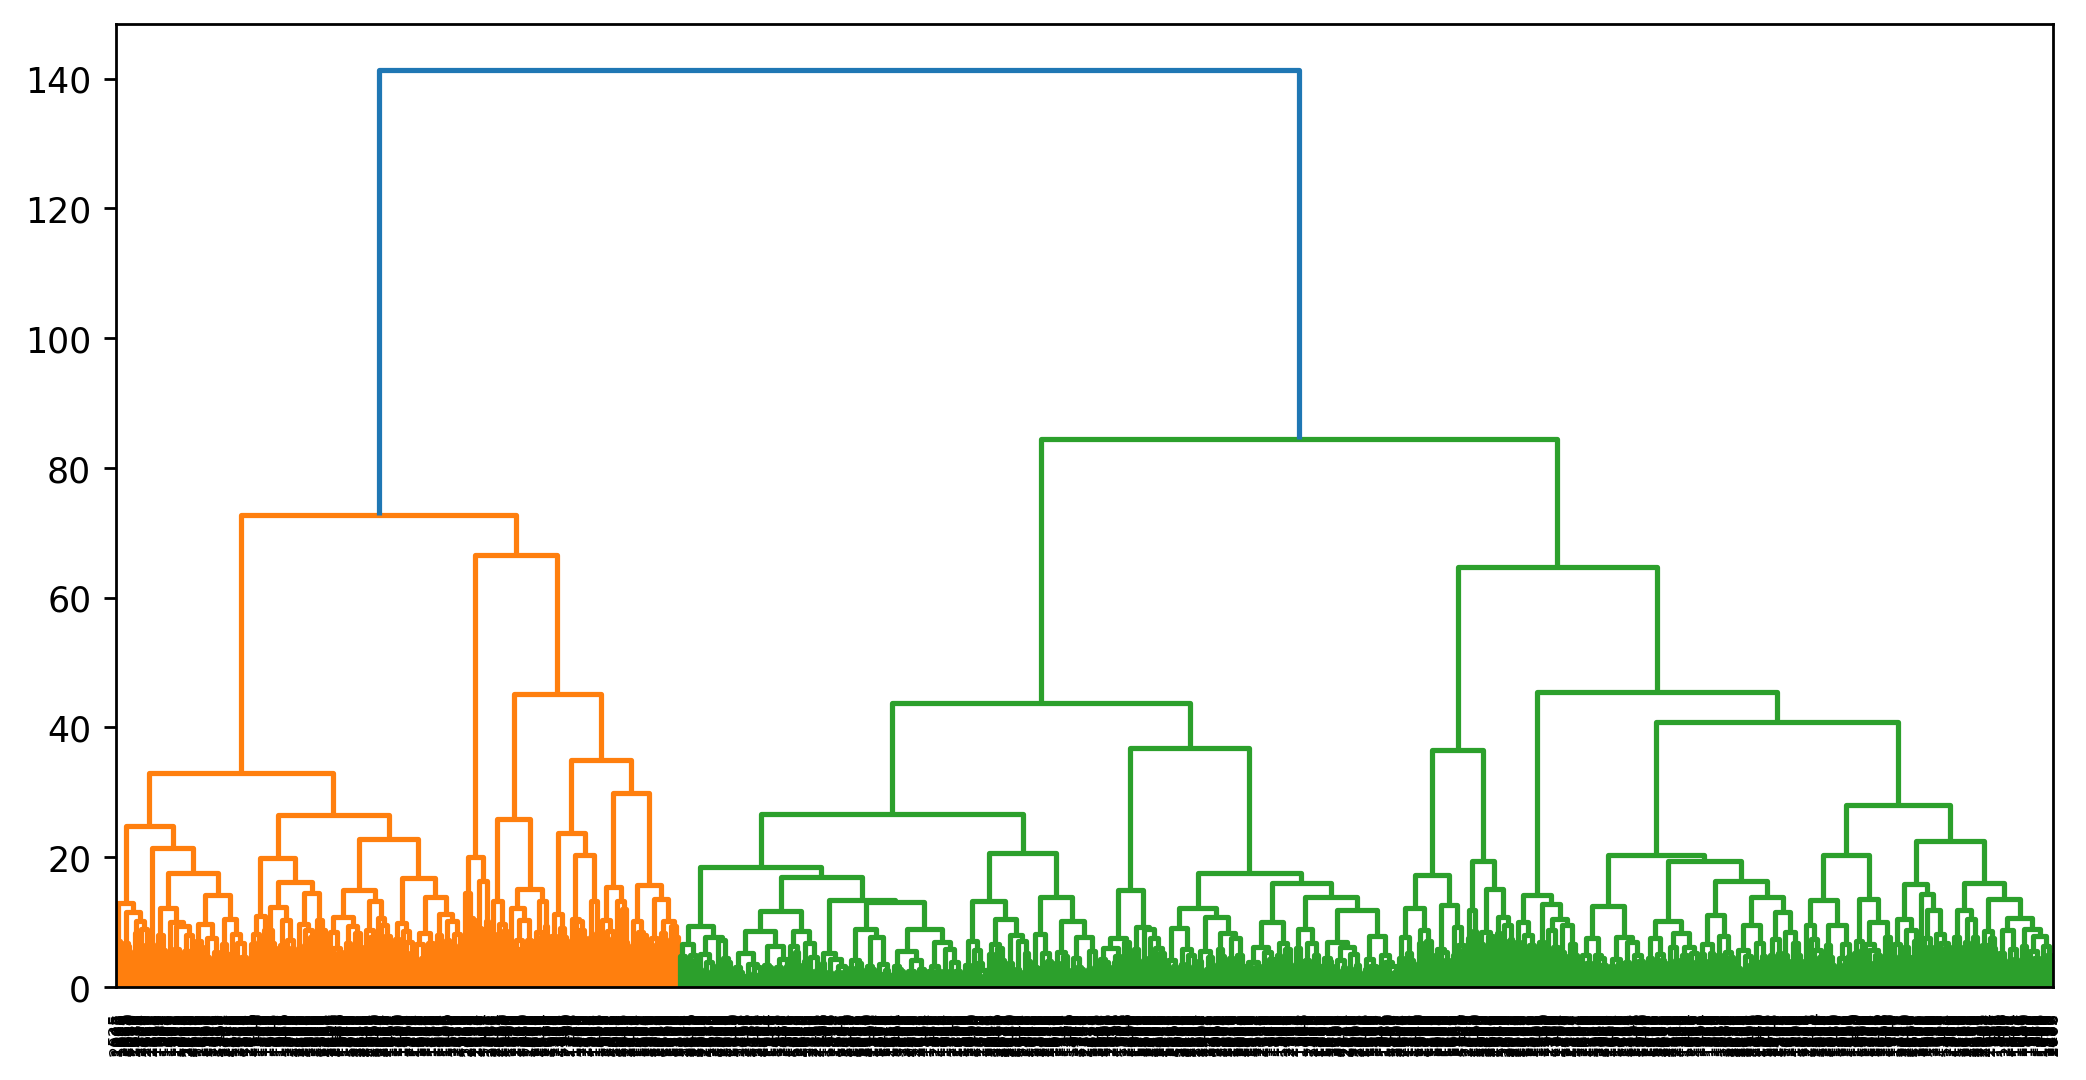

In [99]:
Dendrogram = sch.dendrogram(sch.linkage(data_std, method='ward', metric='euclidean'))

In [100]:
# Creating clusters
hc = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage='complete')
hc.fit(data_std)

AgglomerativeClustering(linkage='complete', n_clusters=6)

In [101]:
hc.labels_

array([0, 3, 0, ..., 0, 0, 0], dtype=int64)

In [102]:
# Creating new variable to store clusters column, after perfoming hierarchical clustering.
data_HC = data_encode
data_HC['Clusters'] = hc.labels_
data_HC

Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0           1957        2.0             4.0  58138.0        0         0   
1           1954        2.0             4.0  46344.0        1         1   
2           1965        2.0             5.0  71613.0        0         0   
3           1984        2.0             5.0  26646.0        1         0   
4           1981        4.0             3.0  58293.0        1         0   
...          ...        ...             ...      ...      ...       ...   
2232        1967        2.0             3.0  61223.0        0         1   
2233        1946        4.0             5.0  64014.0        2         1   
2234        1981        2.0             2.0  56981.0        0         0   
2235        1956        3.0             5.0  69245.0        0         1   
2236        1954        4.0             3.0  52869.0        1         1   

      Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0          58       635         88              546              172   
1          38        11          1                6                2   
2          26       426         49              127              111   
3          26        11          4               20               10   
4          94       173         43              118               46   
...       ...       ...        ...              ...              ...   
2232       46       709         43              182               42   
2233       56       406          0               30                0   
2234       91       908         48              217               32   
2235        8       428         30              214               80   
2236       40        84          3               61                2   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  AcceptedCmp1  \
0                   88            88                  3             0   
1                    1             6                  2             0   
2                   21            42                  1             0   
3                    3             5                  2             0   
4                   27            15                  5             0   
...                ...           ...                ...           ...   
2232               118           247                  2             0   
2233                 0             8                  2             1   
2234                12            24                  1             0   
2235                30            61                  2             0   
2236                 1            21                  3             0   

      AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  Response  \
0                0             0             0             0         1   
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0             0             0         0   
4                0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2232             0             0             0             0         0   
2233             0             0             0             0         0   
2234             0             0             1             0         0   
2235             0             0             0             0         0   
2236             0             0             0             0         1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2232               

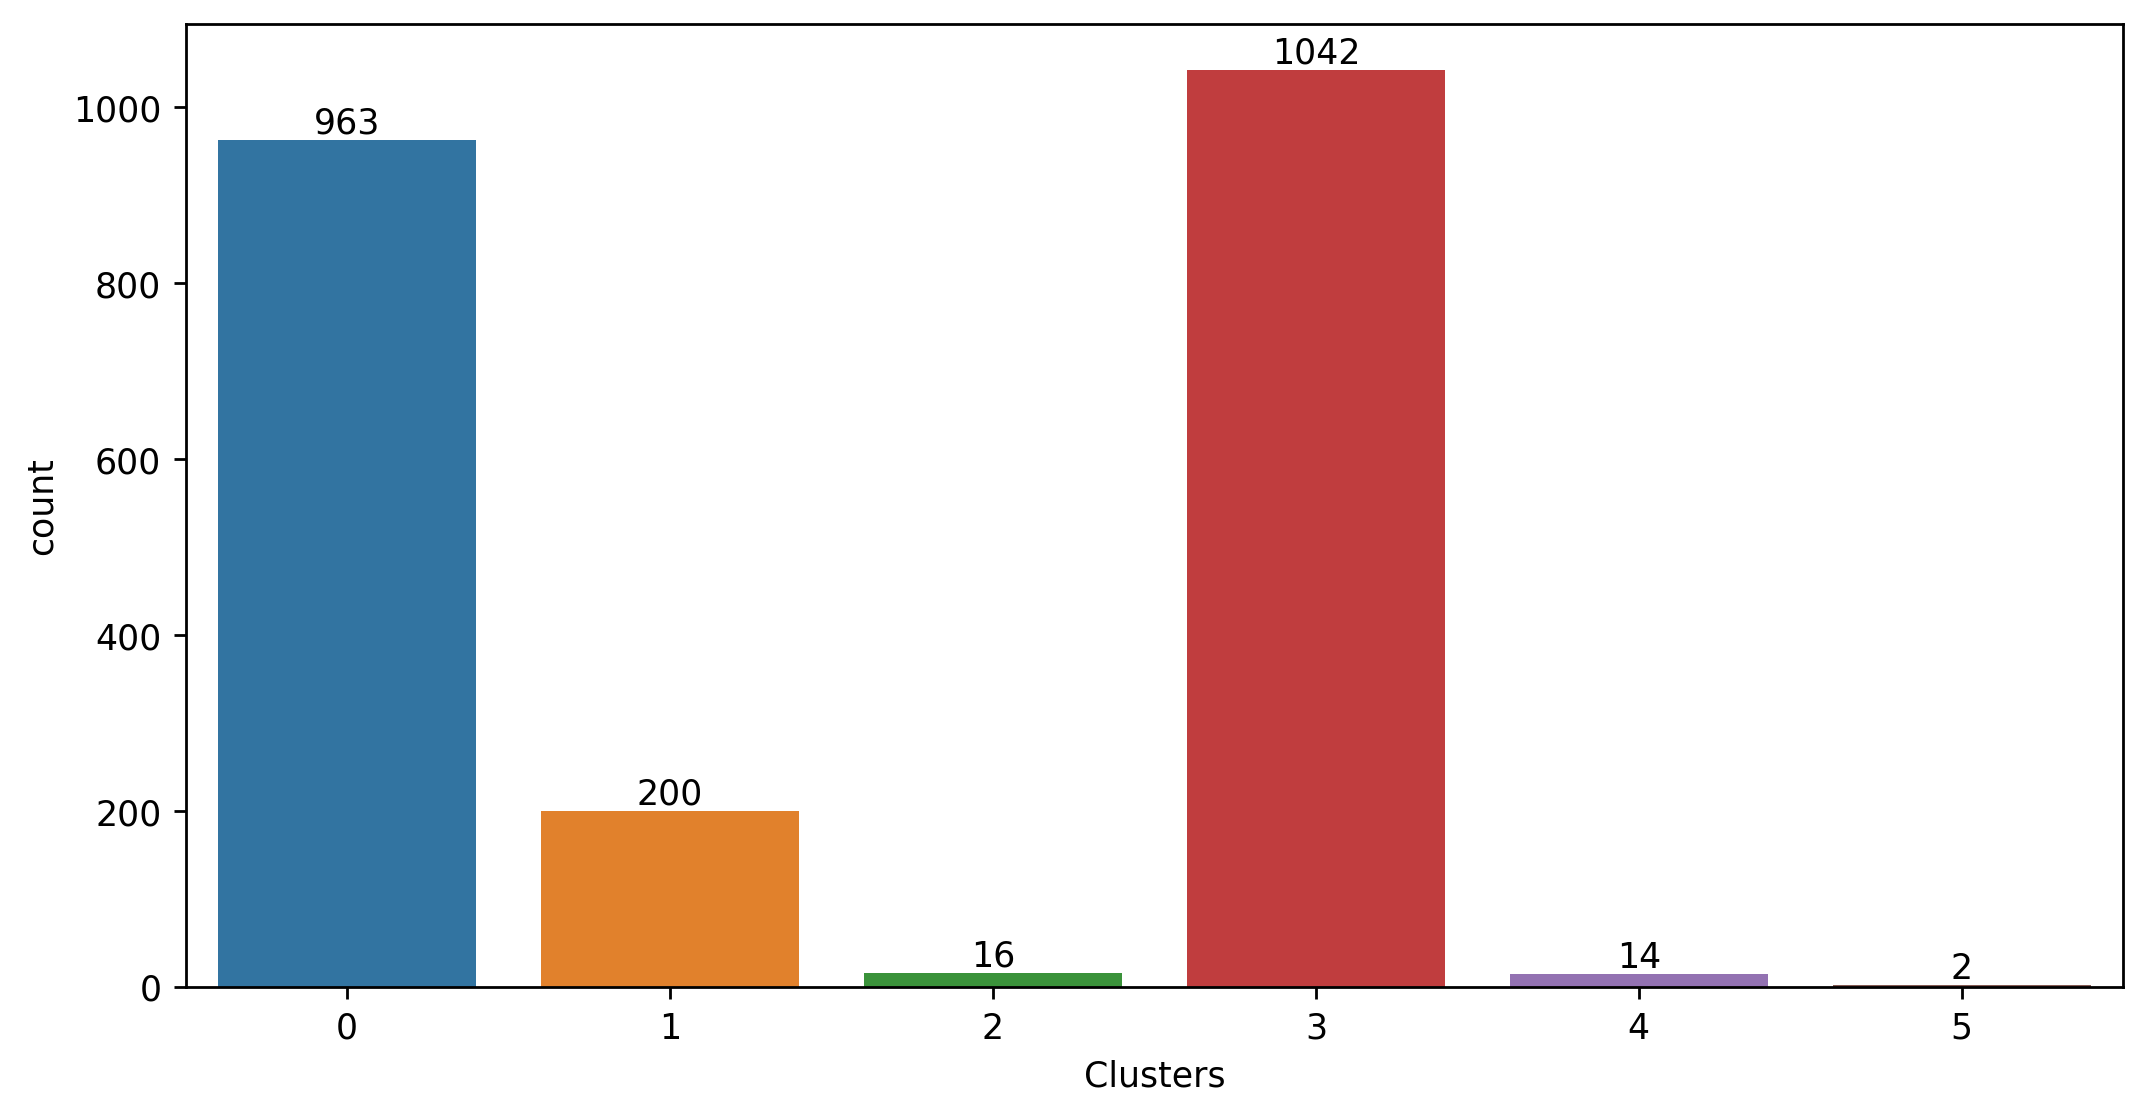

In [103]:
ax = sns.countplot('Clusters', data=data_HC)
ax.bar_label(ax.containers[0]);

In [104]:
print('Silhouette Score = ', silhouette_score(data_std, hc.labels_).round(4))

Silhouette Score =  0.1828


- Hierarchical clustering is not effective clustering technique, because it does not give us optimal number of clusters and it also not suitable for large dataset.

###### 2) DBSCAN

In [105]:
#Library
from sklearn.cluster import DBSCAN

In [106]:
dbscan = DBSCAN(eps=5, min_samples=20)
dbscan.fit_predict(data_std)

# Creating new variable to store clusters.
data_DB = data_encode

data_DB['Clusters'] = dbscan.labels_

silhouette_score(data_std, dbscan.labels_)

0.37103592641215327

- Finding optimal 'eps' value and 'min_samples' values.

In [107]:
from sklearn.neighbors import NearestNeighbors
from collections import Counter

In [108]:
nn = NearestNeighbors(n_neighbors=20).fit(data_std)
distances, indices = nn.kneighbors(data_std)

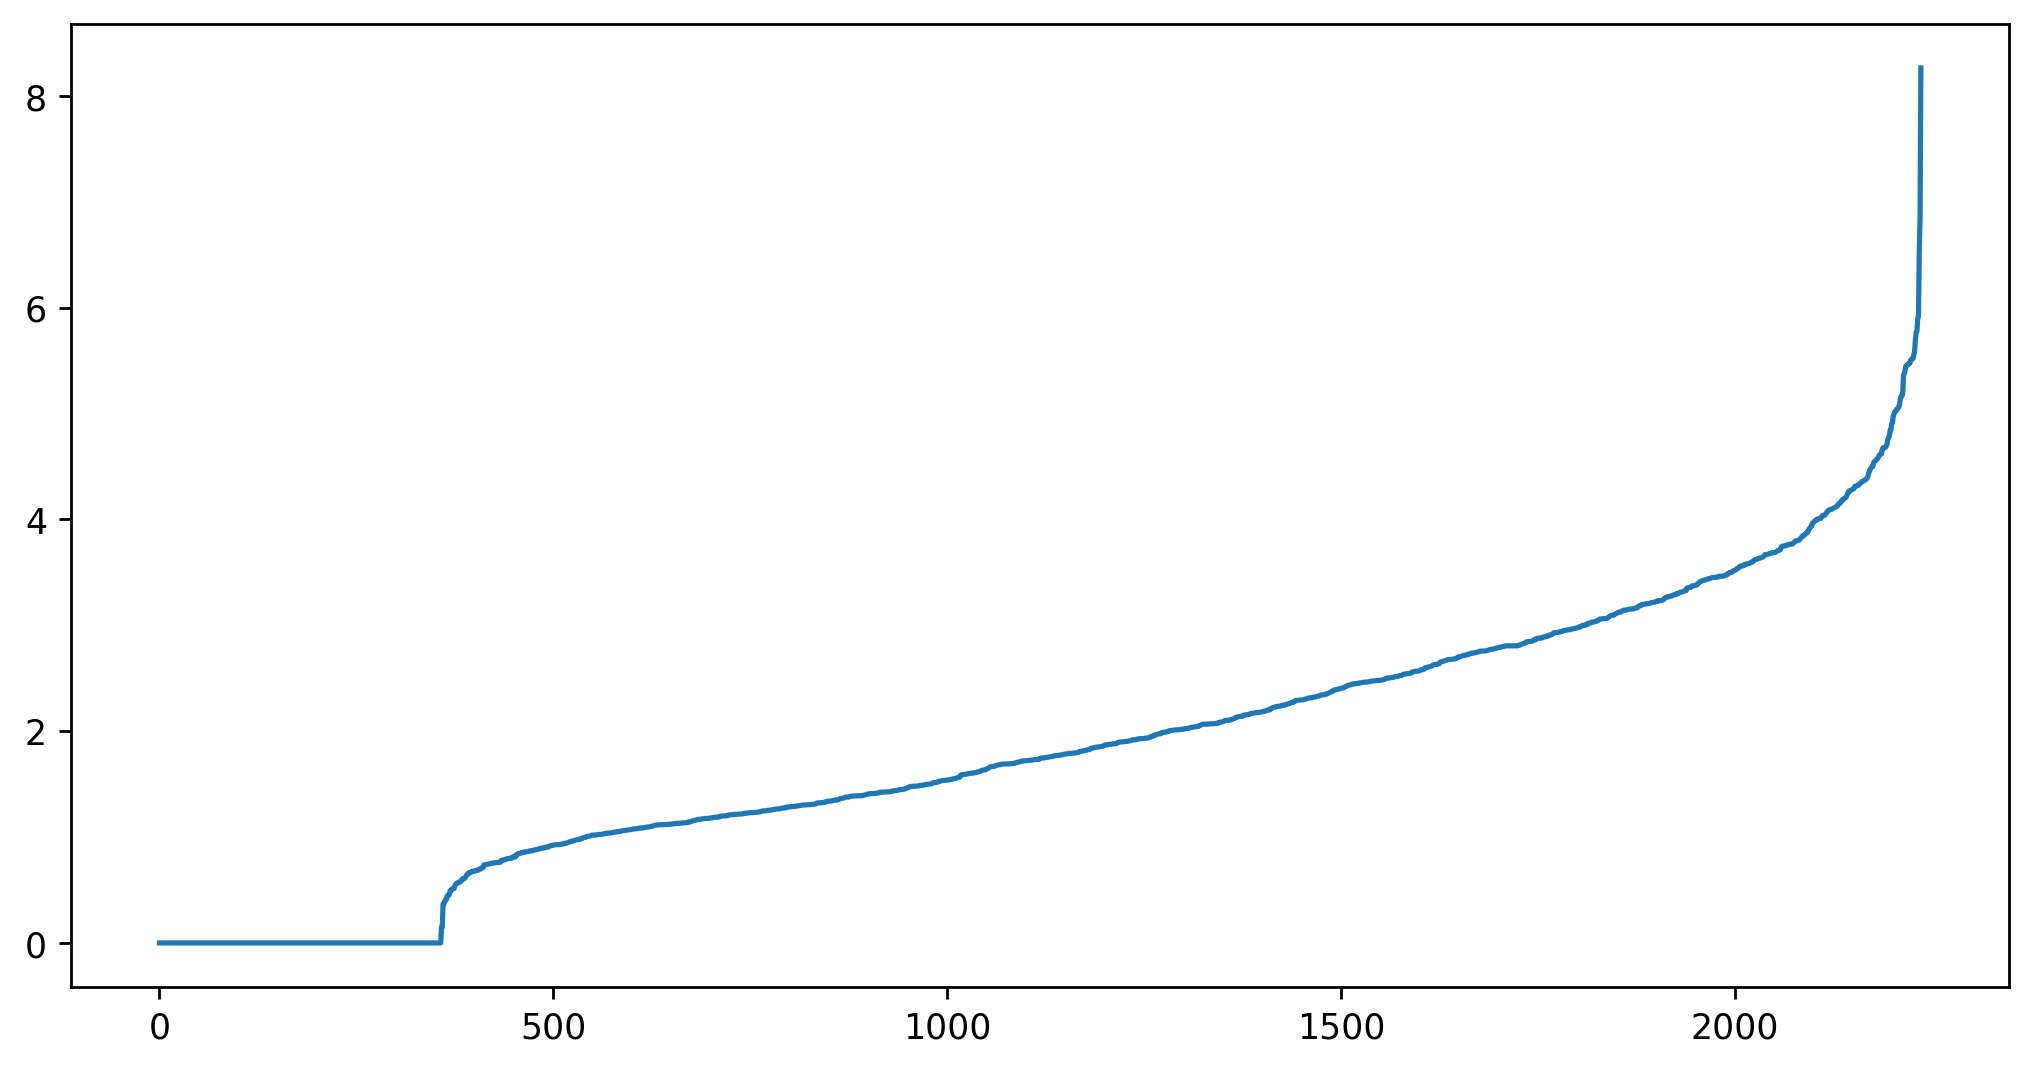

In [109]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances);

In [110]:
min_samples = range(10,21)
eps = np.arange(4.0,7.0, 0.1)

In [111]:
output = []

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, eps = ep).fit(data_std).labels_
        score = silhouette_score(data_std, labels)
        output.append((ms, ep, score))

In [112]:
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.47579017933988843
min_samples: 20
eps: 6.89999999999999


In [113]:
#Final DBSCAN model using optimal values.
labels = DBSCAN(min_samples=20, eps = 6.9).fit(data_std).labels_
clusters = len(Counter(labels))
print(f"Number of clusters: {clusters}")
print(f"Number of outliers: {Counter(labels)[-1]}")
print(f"Silhouette_score: {silhouette_score(data_std, labels)}")

Number of clusters: 2
Number of outliers: 30
Silhouette_score: 0.47579017933988843


In [114]:
dbscan = DBSCAN(eps=6.9, min_samples=20)
dbscan.fit_predict(data_std)

# Creating new variable to store clusters.
data_DB = data_encode

data_DB['Clusters'] = dbscan.labels_

print(f"Silhouette_score: {silhouette_score(data_std, dbscan.labels_)}")

Silhouette_score: 0.47579017933988843


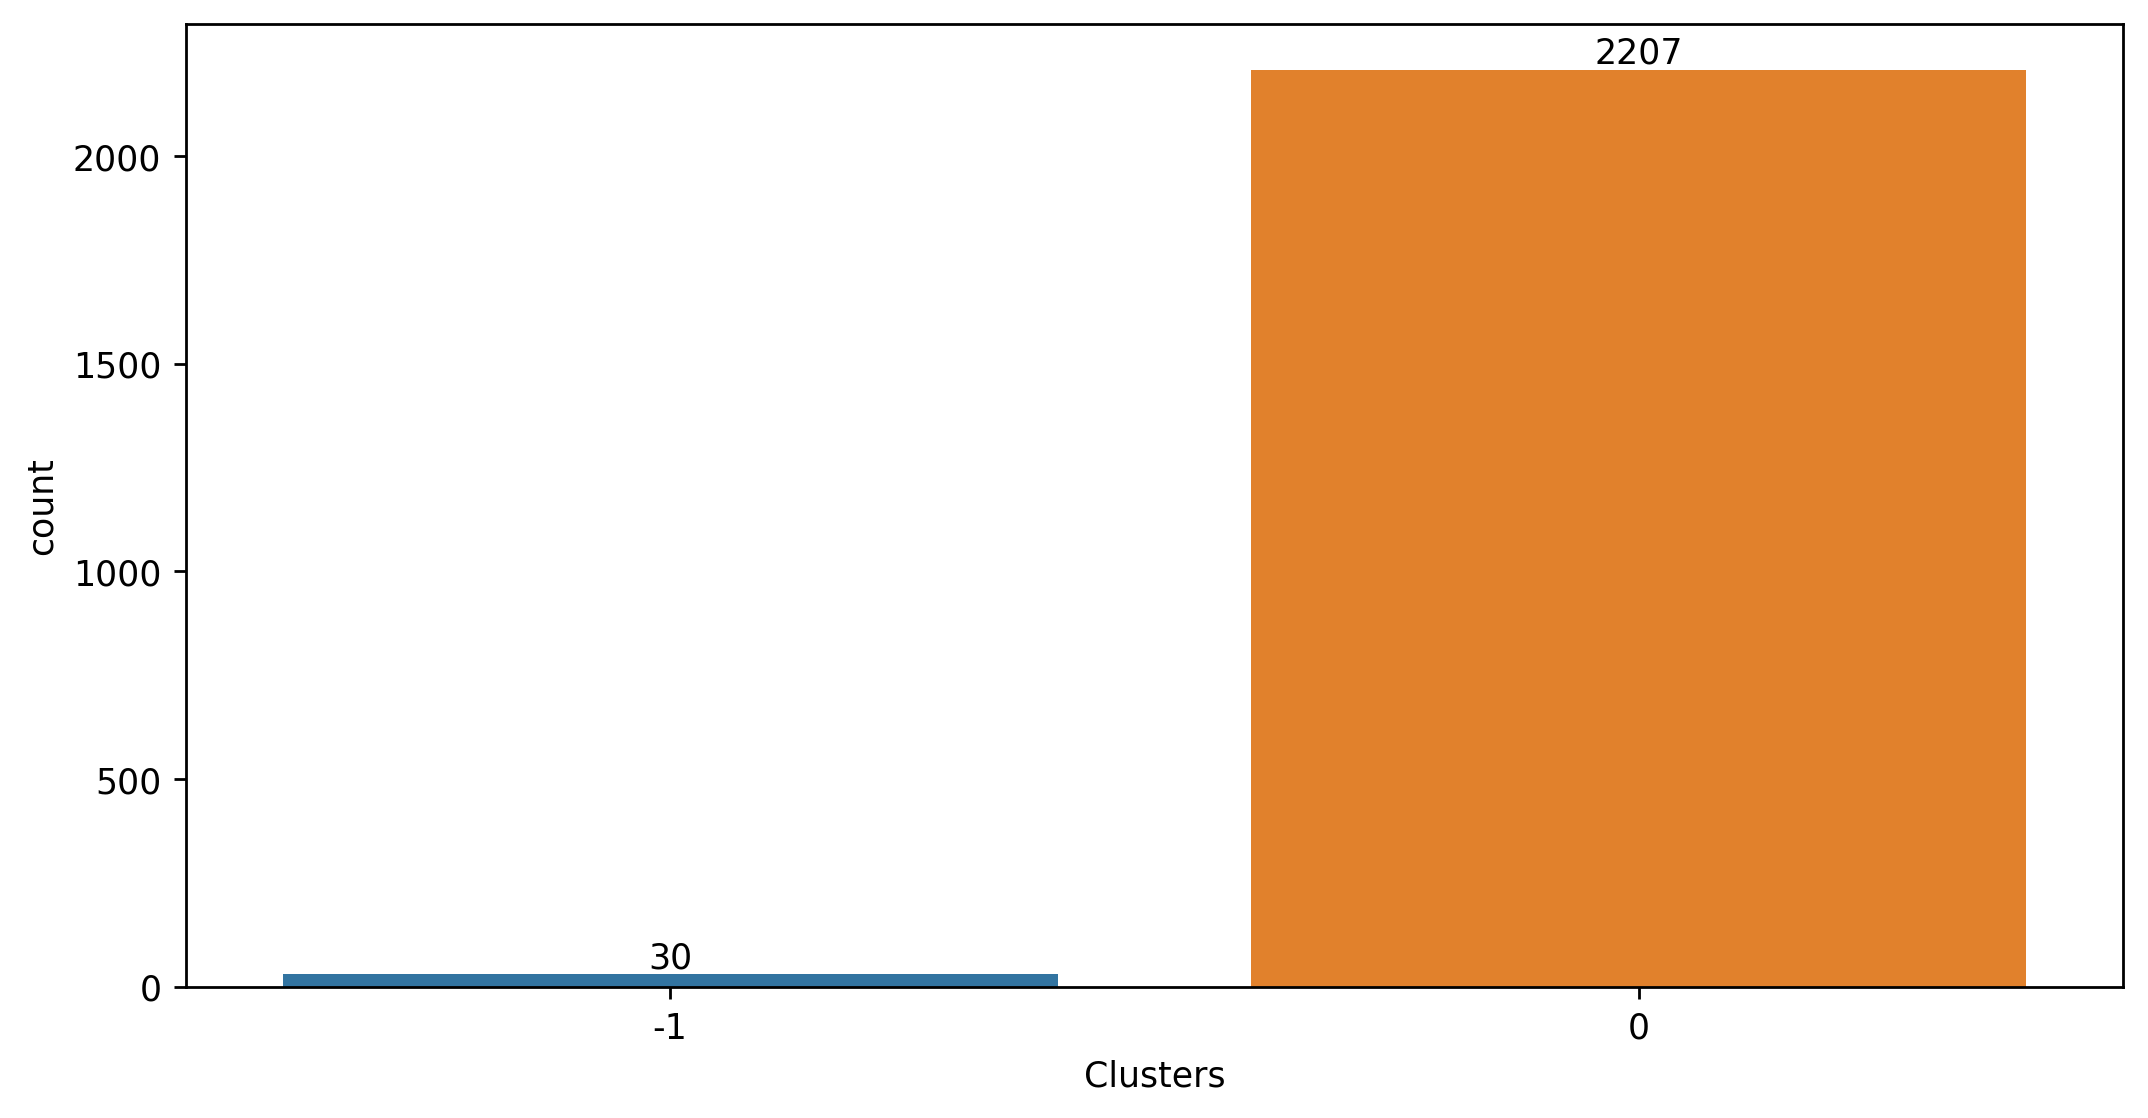

In [115]:
ax = sns.countplot('Clusters', data=data_DB)
ax.bar_label(ax.containers[0]);

In [116]:
#Outliers.
data_DB[data_DB['Clusters'] == -1]

Year_Birth  Education  Marital_Status    Income  Kidhome  Teenhome  \
250         1974        2.0             2.0  102692.0        0         0   
293         1952        3.0             5.0   55951.0        0         1   
339         1969        4.0             3.0   55212.0        0         1   
414         1994        2.0             5.0   80134.0        0         0   
427         1961        4.0             4.0   84865.0        0         0   
556         1959        2.0             5.0   87771.0        0         1   
572         1977        4.0             3.0   61996.0        0         1   
801         1958        2.0             3.0   48192.0        0         0   
819         1961        2.0             4.0   57091.0        0         0   
821         1959        2.0             5.0   87771.0        0         1   
842         1970        2.0             5.0   81205.0        0         0   
867         1983        4.0             5.0   70123.0        0         0   
917         1955        4.0             5.0   46015.0        1         1   
987         1954        2.0             2.0   85683.0        0         0   
1084        1958        4.0             5.0   84460.0        0         0   
1234        1972        2.0             5.0   84906.0        0         0   
1278        1971        0.0             2.0   49118.0        0         0   
1305        1982        2.0             3.0   65169.0        0         0   
1459        1955        4.0             5.0   46015.0        1         1   
1638        1964        4.0             2.0   64140.0        0         2   
1684        1968        2.0             5.0   56534.0        0         1   
1707        1986        2.0             3.0   83512.0        0         0   
1912        1968        2.0             4.0   57107.0        0         1   
1919        1956        2.0             4.0   91249.0        0         0   
1923        1969        4.0             3.0   55212.0        0         1   
1958        1962        4.0             6.0   71670.0        0         0   
2096        1975        2.0             3.0   76068.0        0         1   
2122        1972        2.0             5.0   84906.0        0         0   
2164        1990        3.0             4.0   91172.0        0         0   
2168        1970        0.0             2.0   65706.0        0         0   

      Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
250         5       168        148              444               32   
293        62      1241          0               80                0   
339        65      1103          0               45                0   
414        11       966         26              282               52   
427         1      1248         16              349               43   
556        61      1492         38              287               50   
572        27      1050         12              144                0   
801        76      1039         43              204              153   
819         0       464          5               64                7   
821        61      1492         38              287               50   
842        43       724         74              929               97   
867        27      1308          0              396               23   
917        25        38          0                2                0   
987         6      1296         17              311               45   
1084       80       152         27              103              106   
1234       98       997         15              414               99   
1278       90       620         54              239               99   
1305       23      1074          0               69                0   
1459       25        38          0                2                0   
1638       71      1459          0               61                0   
1684       35       691          7               61               10   
1707       31      1060         61              835              

In [117]:
#Total percentage outliers present in dataset.
print('Outliers = ', "%s%%"%round((30/2237)*100, 2))

Outliers =  1.34%


In [118]:
#Removing outliers from standardised data.
data_std.drop(labels=data_DB[data_DB['Clusters'] == -1].index, axis=0, inplace=True)
data_std.reset_index(drop=True, inplace=True)
data_std.head()

Year_Birth  Education  Marital_Status    Income   Kidhome  Teenhome  \
0   -1.017296  -0.352044        0.250983  0.317093 -0.825388 -0.930227   
1   -1.273722  -0.352044        0.250983 -0.256553  1.032151  0.906417   
2   -0.333495  -0.352044        1.180536  0.972500 -0.825388 -0.930227   
3    1.290534  -0.352044        1.180536 -1.214639  1.032151 -0.930227   
4    1.034108   1.429682       -0.678569  0.324632  1.032151 -0.930227   

    Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  0.307272  0.983671   1.554623         1.680253         2.461700   
1 -0.383584 -0.870717  -0.636422        -0.713250        -0.650275   
2 -0.798098  0.362570   0.572430        -0.176928         1.345050   
3 -0.798098 -0.870717  -0.560868        -0.651196        -0.503829   
4  1.550812 -0.389289   0.421324        -0.216820         0.155177   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  AcceptedCmp1  \
0          1.475877      0.846061           0.698877     -0.262299   
1         -0.631440     -0.729569          -0.047370     -0.262299   
2         -0.147000     -0.037829          -0.793618     -0.262299   
3         -0.582996     -0.748784          -0.047370     -0.262299   
4         -0.001667     -0.556634           2.191372     -0.262299   

   AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  Response  \
0      -0.11659     -0.280343     -0.284036     -0.279414  2.386966   
1      -0.11659     -0.280343     -0.284036     -0.279414 -0.418942   
2      -0.11659     -0.280343     -0.284036     -0.279414 -0.418942   
3      -0.11659     -0.280343     -0.284036     -0.279414 -0.418942   
4      -0.11659     -0.280343     -0.284036     -0.279414 -0.418942   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  
0         1.504693             2.836185          -0.552077           0.748561  
1        -1.160992            -0.586515          -1.167421          -0.120197  
2         1.504693            -0.206215           1.293956          -0.554576  
3        -0.780180            -0.966815          -0.552077           0.314182  
4         0.362257             0.174085           0.063267          -0.120197

In [119]:
#Removing outliers from original dataset.
data.drop(labels=data_DB[data_DB['Clusters'] == -1].index, axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)
data

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2202        1967  Graduation        Married  61223.0        0         1   
2203        1946         PhD       Together  64014.0        2         1   
2204        1981  Graduation       Divorced  56981.0        0         0   
2205        1956      Master       Together  69245.0        0         1   
2206        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  Complain  MntWines  MntFruits  MntMeatProducts  \
0     2012-09-04       58         0       635         88              546   
1     2014-03-08       38         0        11          1                6   
2     2013-08-21       26         0       426         49              127   
3     2014-02-10       26         0        11          4               20   
4     2014-01-19       94         0       173         43              118   
...          ...      ...       ...       ...        ...              ...   
2202  2013-06-13       46         0       709         43              182   
2203  2014-06-10       56         0       406          0               30   
2204  2014-01-25       91         0       908         48              217   
2205  2014-01-24        8         0       428         30              214   
2206  2012-10-15       40         0        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2202               42               118           247                  2   
2203                0                 0             8                  2   
2204               32                12            24                  1   
2205               80                30            61                  2   
2206                2                 1            21                  3   

      AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2202             0             0             0             0             0   
2203             1             0             0             0             0   
2204             0             0             0             1             0   
2205             0             0             0             0             0   
2206             0             0             0             0             0   

      Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0            1                8                   10                  4   
1            0                1                    1                  2   
2            0                8                    2                 10   
3            0                

###### 3) K-Means Clustering

In [120]:
#Libraries
from sklearn.cluster import KMeans

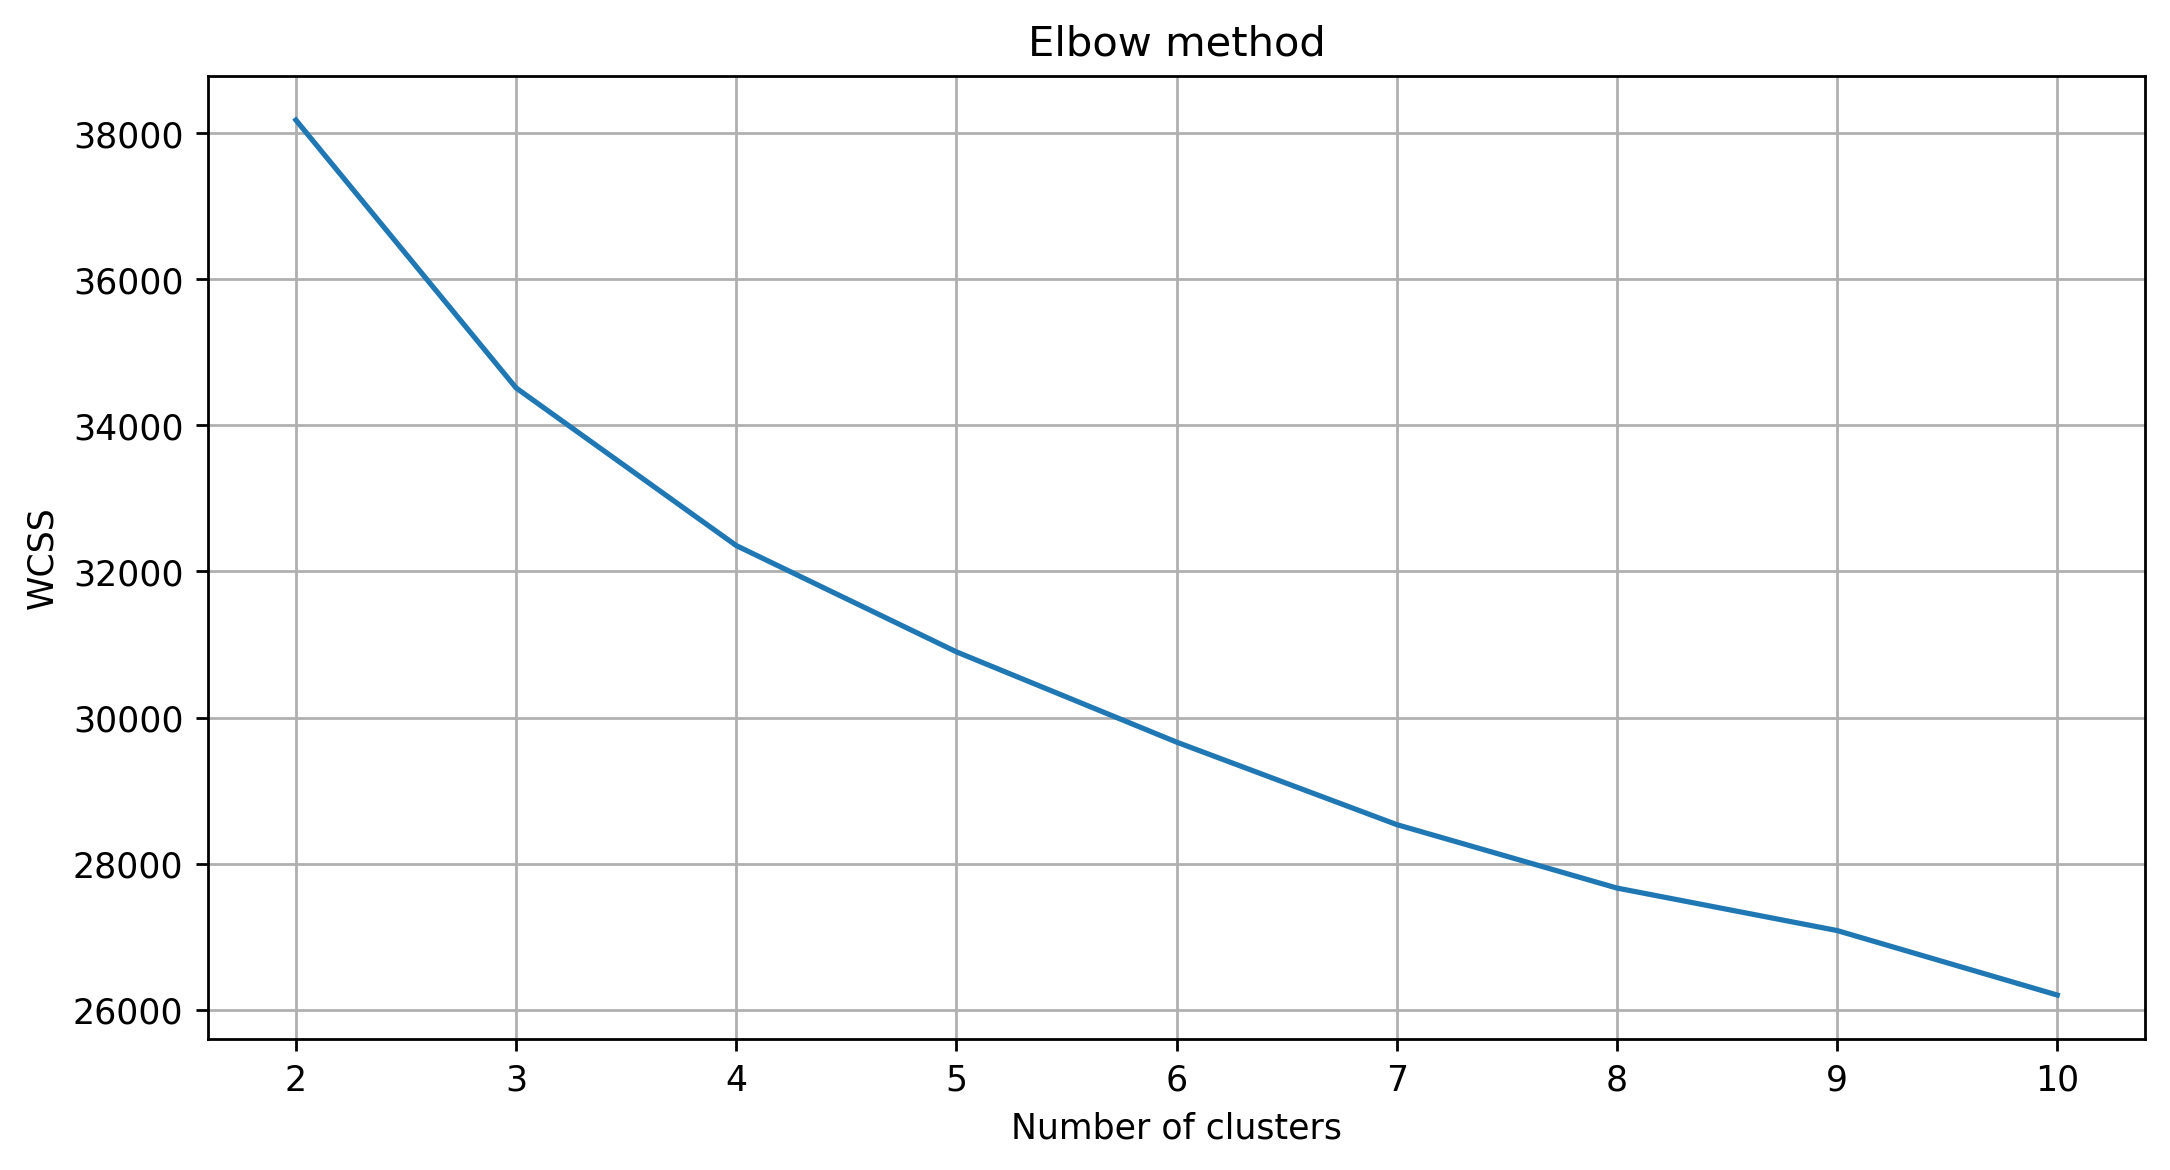

In [121]:
# Finding optimum number of cluster.
wcss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_std)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2,11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

- By ELBOW graph we can select optimum number of clusters using WCSS.

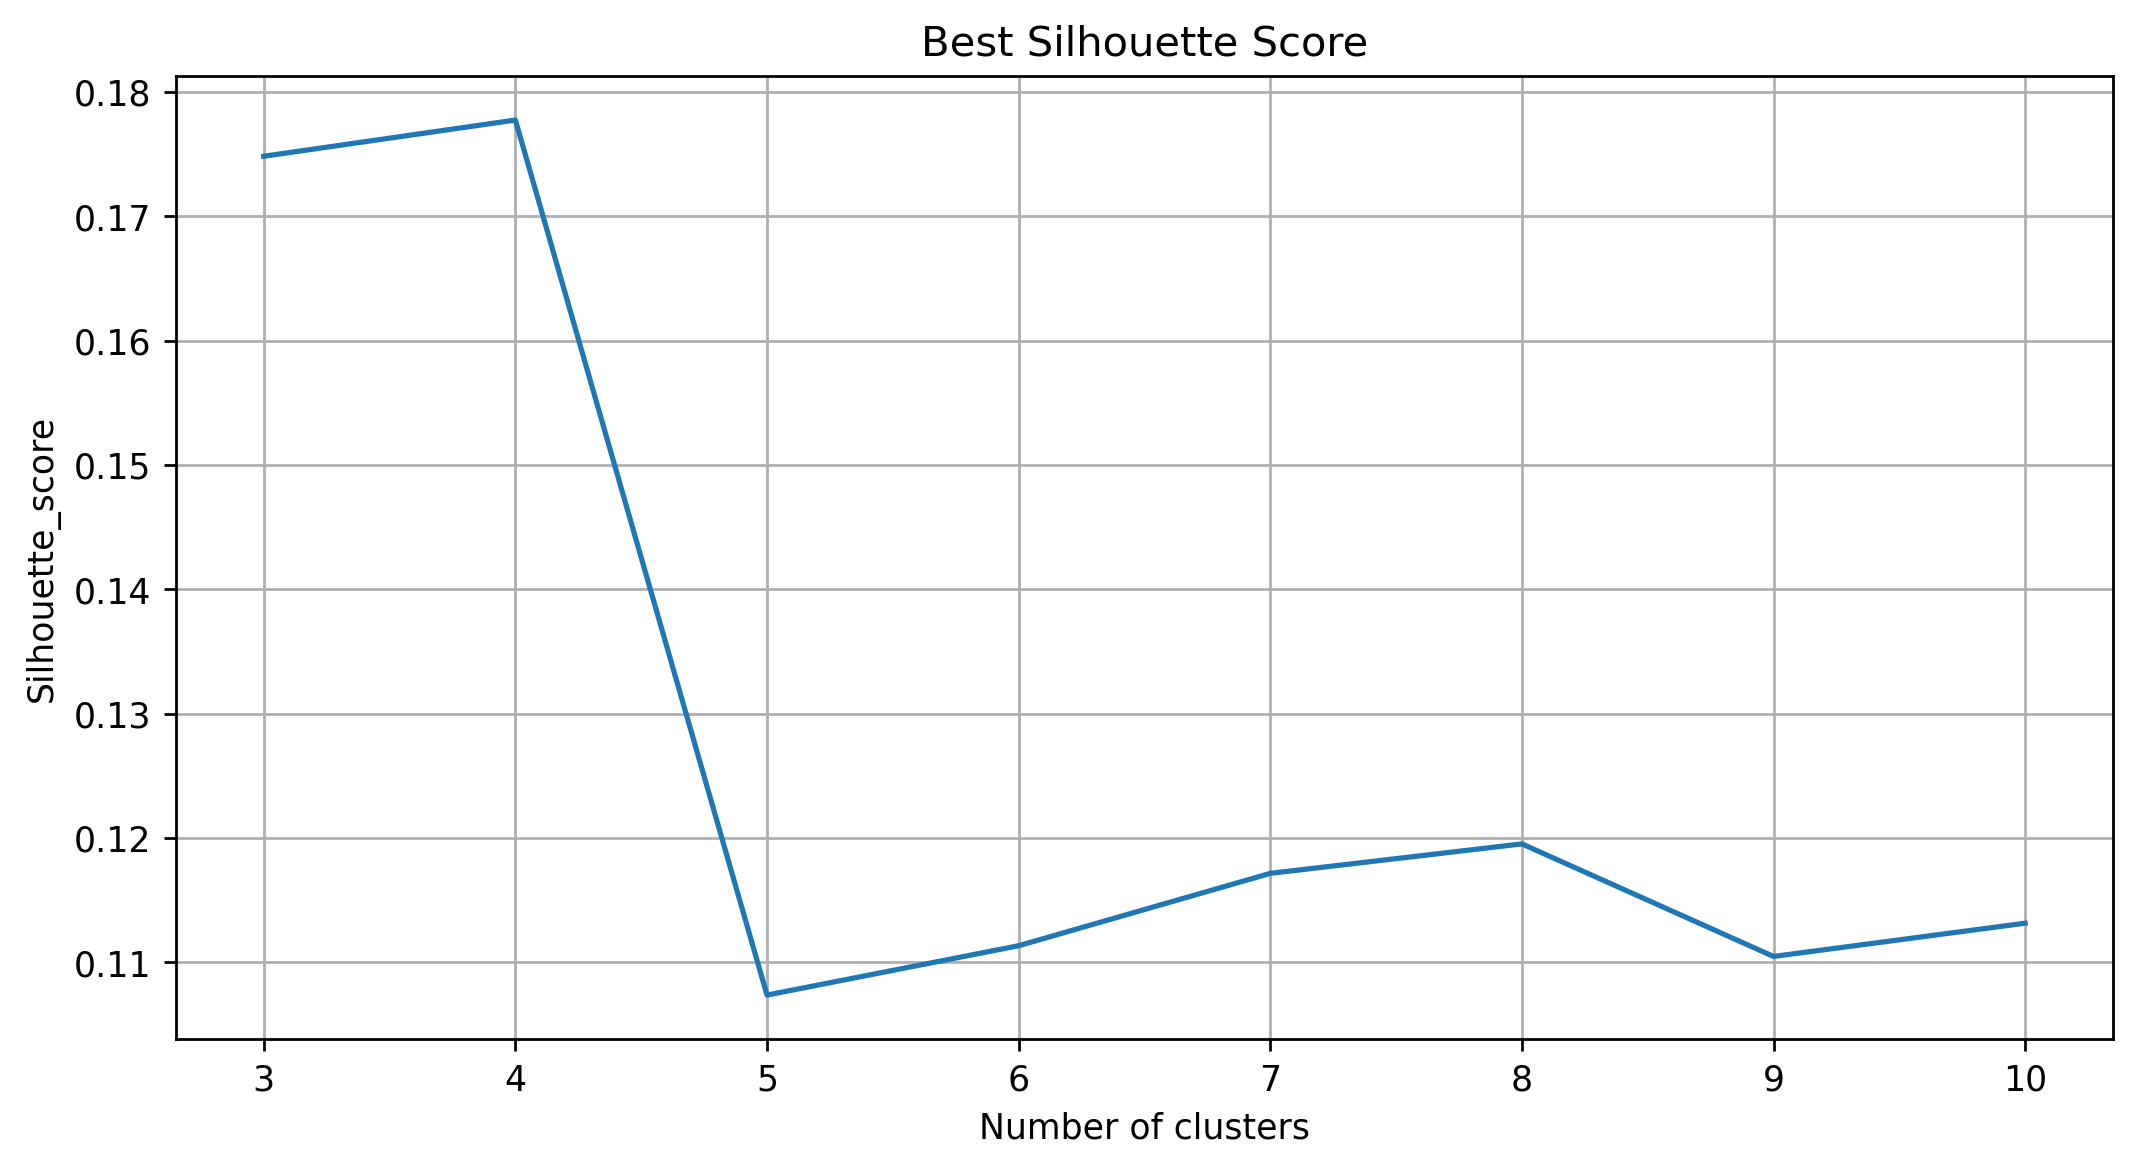

In [122]:
#Claculating best silhouette score.
Silhouette_score = []

for i in range(3,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_std)
    Silhouette_score.append(silhouette_score(data_std,kmeans.labels_))
    
plt.plot(range(3,11), Silhouette_score)
plt.title('Best Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette_score')
plt.grid()
plt.show()

- We get best silhouette score with 4 clusters.

In [123]:
# Building K-Means model with 4 clusters.
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data_std)
kmeans.labels_

array([1, 0, 1, ..., 2, 2, 0])

In [124]:
# Creating new variable of data for k-means.
data_KM = data

In [125]:
data_KM['Clusters'] = kmeans.labels_
data_KM

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2202        1967  Graduation        Married  61223.0        0         1   
2203        1946         PhD       Together  64014.0        2         1   
2204        1981  Graduation       Divorced  56981.0        0         0   
2205        1956      Master       Together  69245.0        0         1   
2206        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  Complain  MntWines  MntFruits  MntMeatProducts  \
0     2012-09-04       58         0       635         88              546   
1     2014-03-08       38         0        11          1                6   
2     2013-08-21       26         0       426         49              127   
3     2014-02-10       26         0        11          4               20   
4     2014-01-19       94         0       173         43              118   
...          ...      ...       ...       ...        ...              ...   
2202  2013-06-13       46         0       709         43              182   
2203  2014-06-10       56         0       406          0               30   
2204  2014-01-25       91         0       908         48              217   
2205  2014-01-24        8         0       428         30              214   
2206  2012-10-15       40         0        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2202               42               118           247                  2   
2203                0                 0             8                  2   
2204               32                12            24                  1   
2205               80                30            61                  2   
2206                2                 1            21                  3   

      AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2202             0             0             0             0             0   
2203             1             0             0             0             0   
2204             0             0             0             1             0   
2205             0             0             0             0             0   
2206             0             0             0             0             0   

      Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0            1                8                   10                  4   
1            0                1                    1                  2   
2            0                8                    2                 10   
3            0                

In [126]:
print('Silhouette Score = ', silhouette_score(data_std, kmeans.labels_).round(4))

Silhouette Score =  0.1777


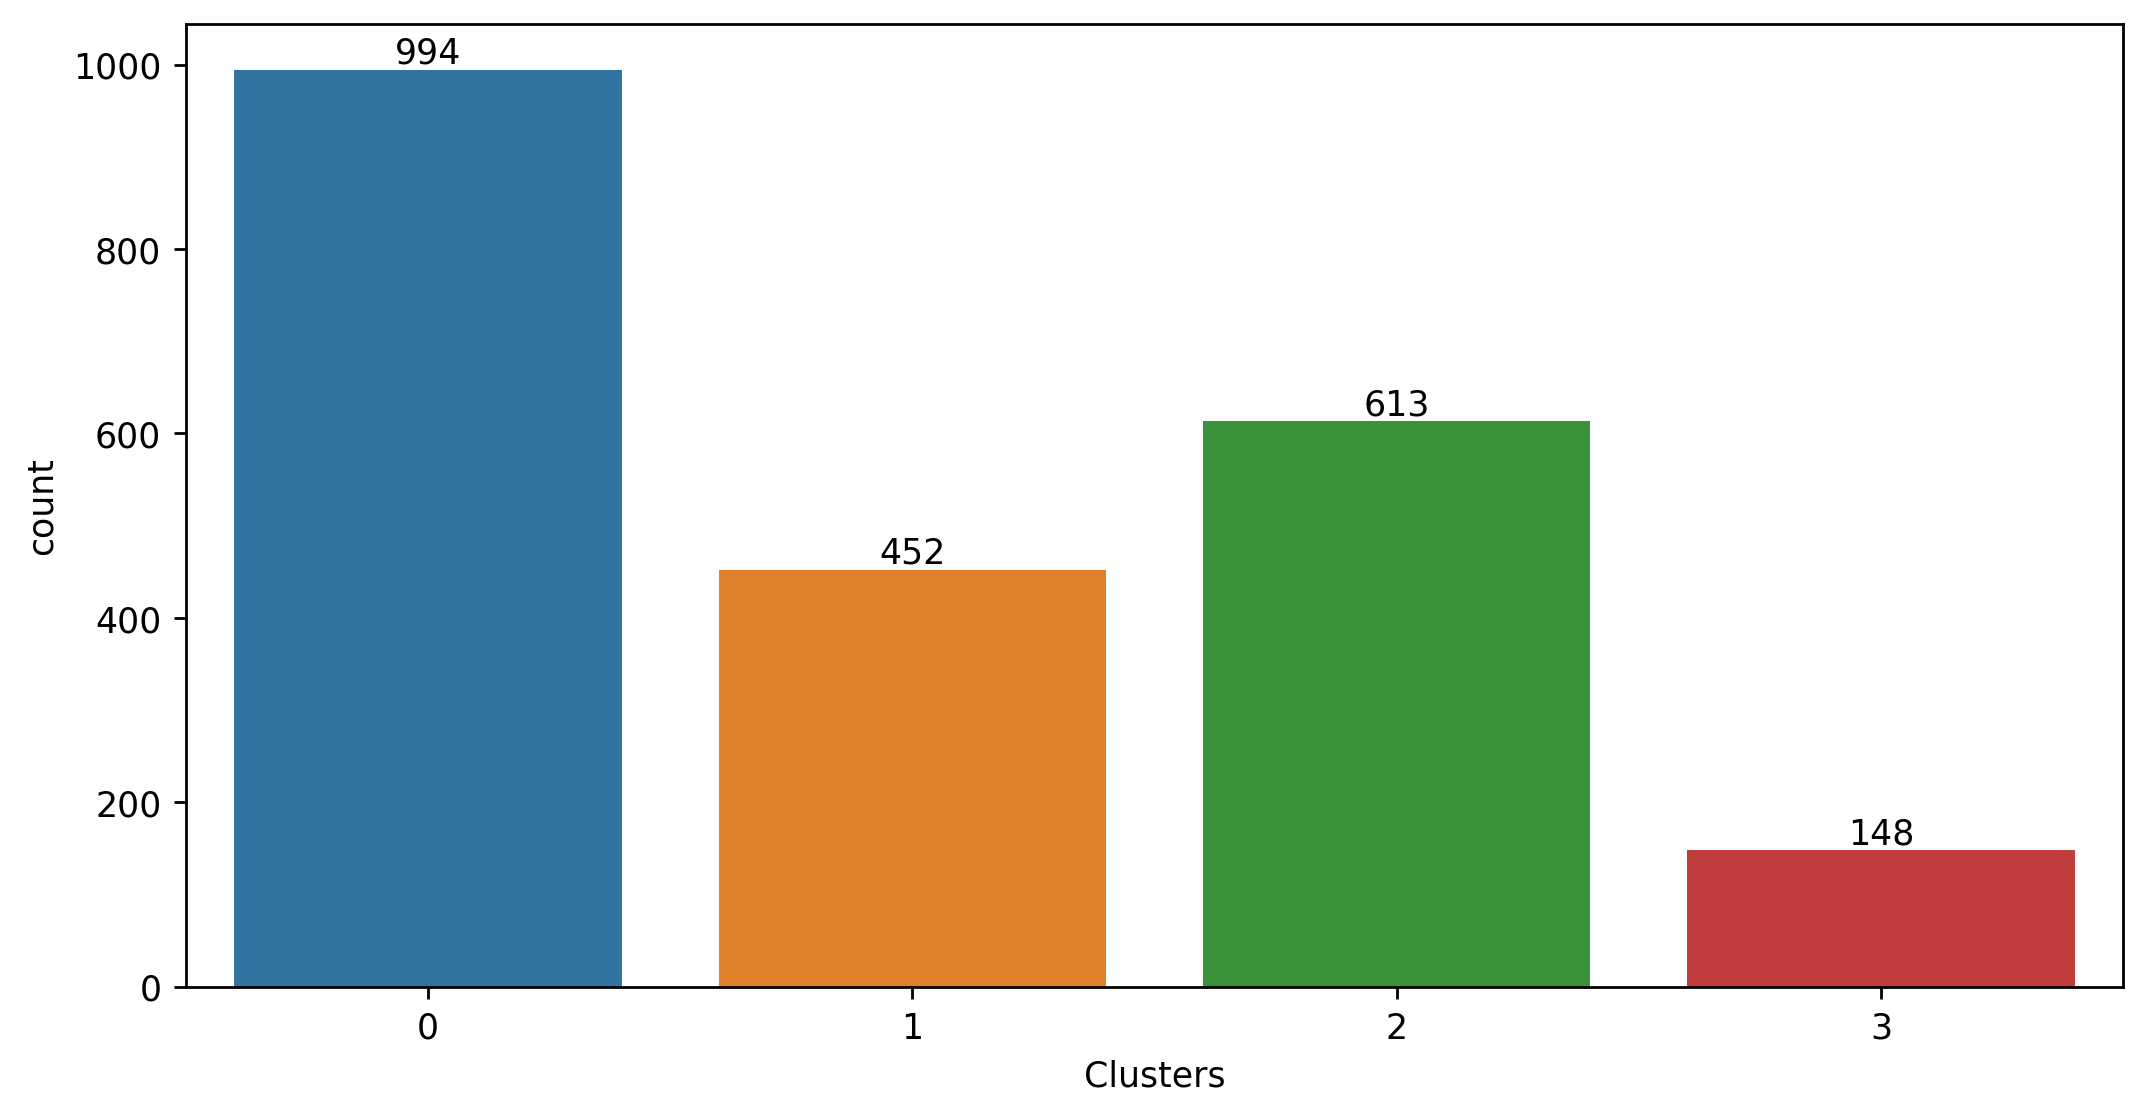

In [127]:
ax = sns.countplot('Clusters', data=data_KM)
ax.bar_label(ax.containers[0]);

<AxesSubplot:xlabel='Age', ylabel='Income'>

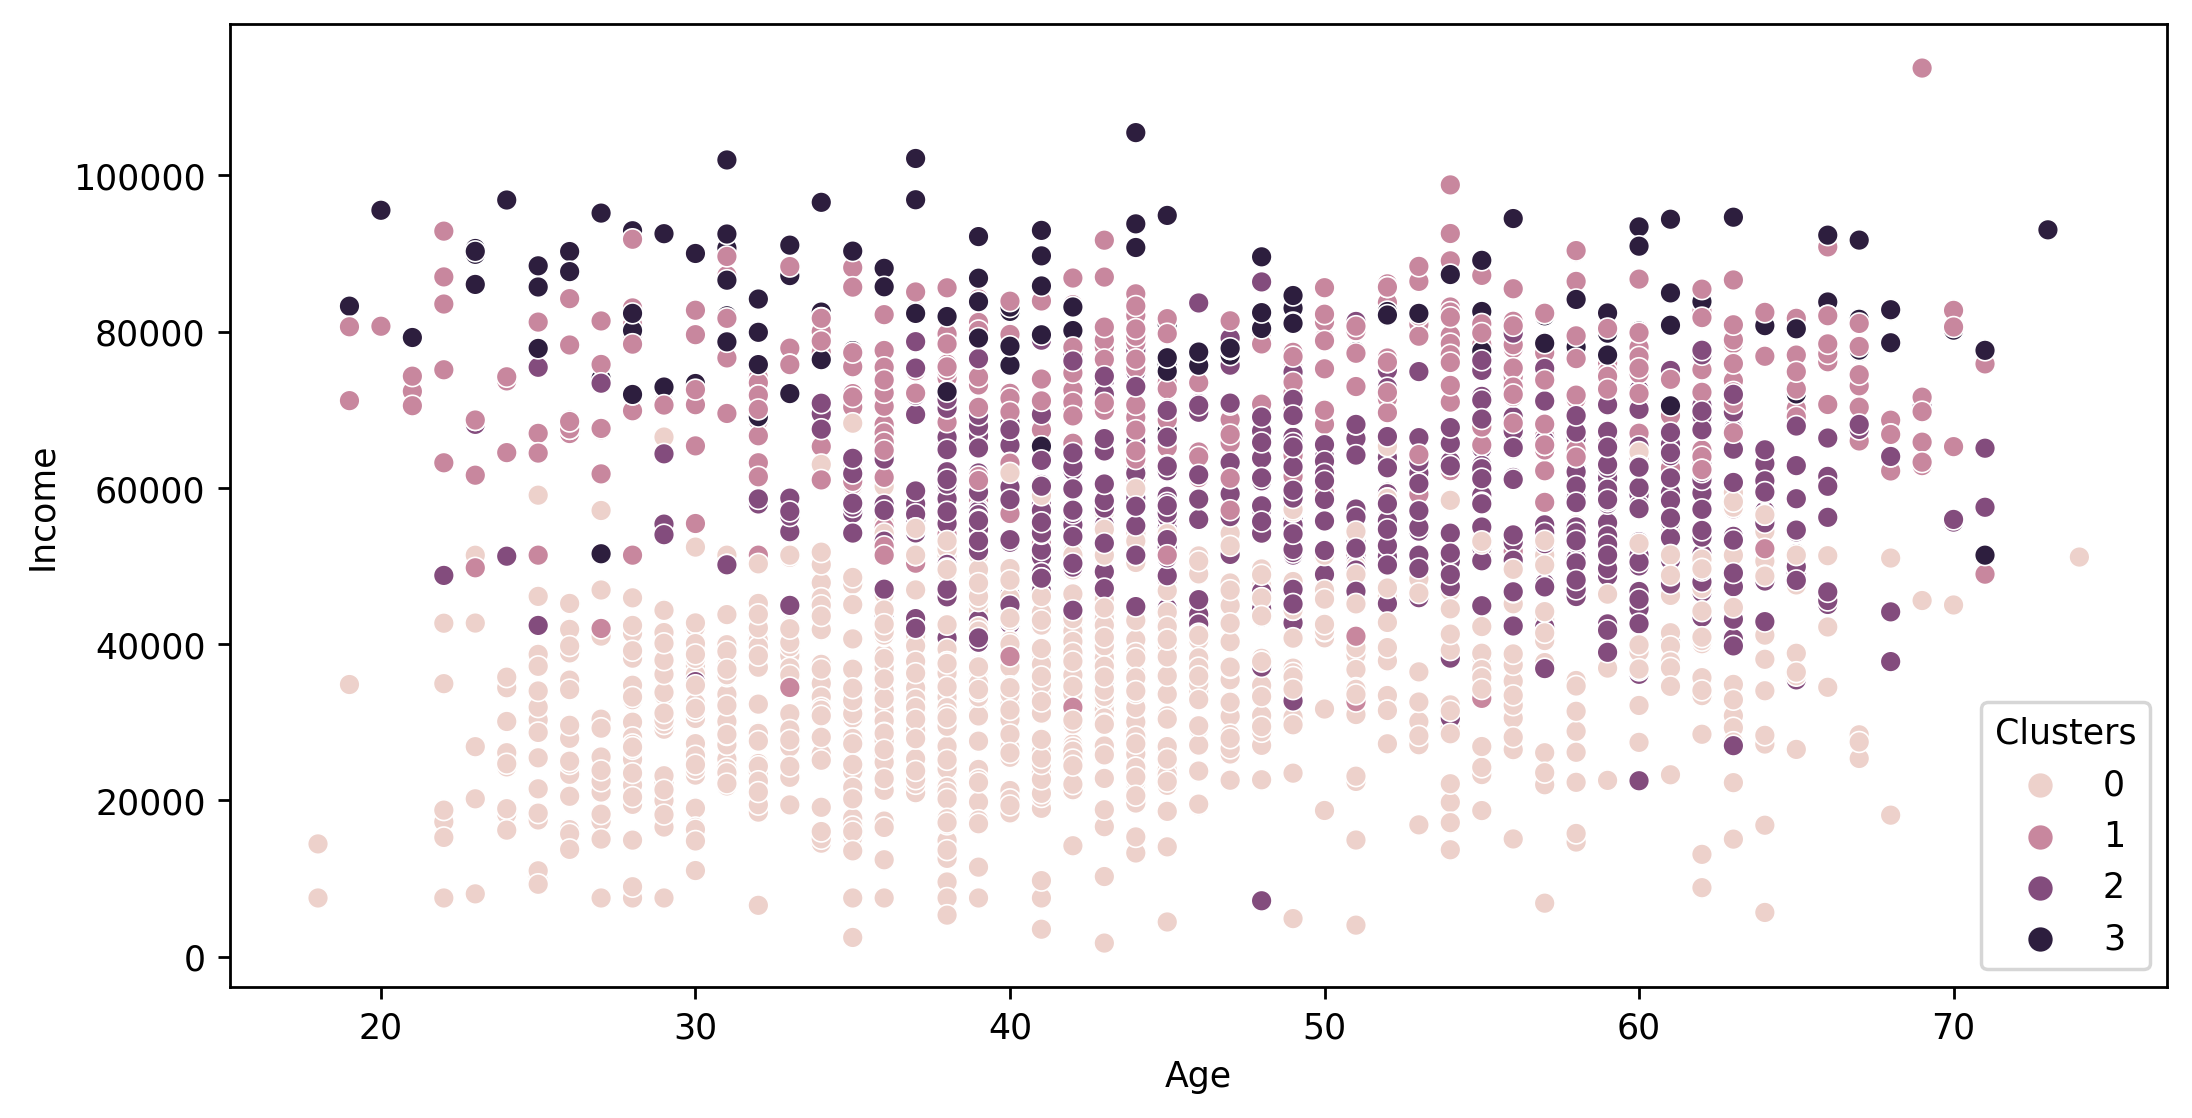

In [128]:
sns.scatterplot(data_KM['Age'],data_KM['Income'],hue= data_KM['Clusters'])

In [129]:
#Segrigating clusters.
cluster_0 = data_KM[data_KM['Clusters'] == 0]
cluster_1 = data_KM[data_KM['Clusters'] == 1]
cluster_2 = data_KM[data_KM['Clusters'] == 2]
cluster_3 = data_KM[data_KM['Clusters'] == 3]

In [130]:
df = data_KM[['Income']].groupby(data_KM['Clusters']).agg(['mean','count']).round(2)
df

Income      
              mean count
Clusters                
0         33777.72   994
1         72000.12   452
2         57166.79   613
3         82276.54   148

In [131]:
df = data_KM[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].groupby(data_KM['Clusters']).mean().round(2)
df

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Clusters                                                          
0            37.31       4.83            23.81             6.94   
1           493.53      72.02           427.16           105.92   
2           434.12      19.61           125.79            26.26   
3           856.78      58.84           486.70            80.41   

          MntSweetProducts  MntGoldProds  
Clusters                                  
0                     4.96         15.54  
1                    71.74         78.72  
2                    19.72         55.46  
3                    68.86         76.60

###### Model Validation

In [132]:
#Data with clusters for model validation.
data_KM

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2202        1967  Graduation        Married  61223.0        0         1   
2203        1946         PhD       Together  64014.0        2         1   
2204        1981  Graduation       Divorced  56981.0        0         0   
2205        1956      Master       Together  69245.0        0         1   
2206        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  Complain  MntWines  MntFruits  MntMeatProducts  \
0     2012-09-04       58         0       635         88              546   
1     2014-03-08       38         0        11          1                6   
2     2013-08-21       26         0       426         49              127   
3     2014-02-10       26         0        11          4               20   
4     2014-01-19       94         0       173         43              118   
...          ...      ...       ...       ...        ...              ...   
2202  2013-06-13       46         0       709         43              182   
2203  2014-06-10       56         0       406          0               30   
2204  2014-01-25       91         0       908         48              217   
2205  2014-01-24        8         0       428         30              214   
2206  2012-10-15       40         0        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2202               42               118           247                  2   
2203                0                 0             8                  2   
2204               32                12            24                  1   
2205               80                30            61                  2   
2206                2                 1            21                  3   

      AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2202             0             0             0             0             0   
2203             1             0             0             0             0   
2204             0             0             0             1             0   
2205             0             0             0             0             0   
2206             0             0             0             0             0   

      Response  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0            1                8                   10                  4   
1            0                1                    1                  2   
2            0                8                    2                 10   
3            0                

In [133]:
#Removing unnecessory variables.
data_KM.drop(columns=['Dt_Customer','Complain','Month','Year','Age'], axis=1, inplace=True)
data_KM

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2202        1967  Graduation        Married  61223.0        0         1   
2203        1946         PhD       Together  64014.0        2         1   
2204        1981  Graduation       Divorced  56981.0        0         0   
2205        1956      Master       Together  69245.0        0         1   
2206        1954         PhD        Married  52869.0        1         1   

      Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0          58       635         88              546              172   
1          38        11          1                6                2   
2          26       426         49              127              111   
3          26        11          4               20               10   
4          94       173         43              118               46   
...       ...       ...        ...              ...              ...   
2202       46       709         43              182               42   
2203       56       406          0               30                0   
2204       91       908         48              217               32   
2205        8       428         30              214               80   
2206       40        84          3               61                2   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  AcceptedCmp1  \
0                   88            88                  3             0   
1                    1             6                  2             0   
2                   21            42                  1             0   
3                    3             5                  2             0   
4                   27            15                  5             0   
...                ...           ...                ...           ...   
2202               118           247                  2             0   
2203                 0             8                  2             1   
2204                12            24                  1             0   
2205                30            61                  2             0   
2206                 1            21                  3             0   

      AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  Response  \
0                0             0             0             0         1   
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0             0             0         0   
4                0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2202             0             0             0             0         0   
2203             0             0             0             0         0   
2204             0             0             1             0         0   
2205             0             0             0             0         0   
2206             0             0             0             0         1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2202               

In [134]:
#Encoding for independent variables.

data_KM_encode = data_KM.copy()
data_KM_encode[['Education','Marital_Status']] = oe.fit_transform(data_KM_encode[['Education','Marital_Status']])
data_KM_encode.head()

Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
0        1957        2.0             4.0  58138.0        0         0       58   
1        1954        2.0             4.0  46344.0        1         1       38   
2        1965        2.0             5.0  71613.0        0         0       26   
3        1984        2.0             5.0  26646.0        1         0       26   
4        1981        4.0             3.0  58293.0        1         0       94   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       635         88              546              172                88   
1        11          1                6                2                 1   
2       426         49              127              111                21   
3        11          4               20               10                 3   
4       173         43              118               46                27   

   MntGoldProds  NumDealsPurchases  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
0            88                  3             0             0             0   
1             6                  2             0             0             0   
2            42                  1             0             0             0   
3             5                  2             0             0             0   
4            15                  5             0             0             0   

   AcceptedCmp4  AcceptedCmp5  Response  NumWebPurchases  NumCatalogPurchases  \
0             0             0         1                8                   10   
1             0             0         0                1                    1   
2             0             0         0                8                    2   
3             0             0         0                2                    0   
4             0             0         0                5                    3   

   NumStorePurchases  NumWebVisitsMonth  Clusters  
0                  4                  7         1  
1                  2                  5         0  
2                 10                  4         1  
3                  4                  6         0  
4                  6                  5         2

In [135]:
#Splitting dependent and independent variables.
x = data_KM_encode.iloc[:,:-1]
y = data_KM_encode['Clusters']

In [136]:
#Normalization
from sklearn.preprocessing import MinMaxScaler

mmc = MinMaxScaler()

x = mmc.fit_transform(x)
x

array([[0.30357143, 0.5       , 0.57142857, ..., 1.        , 0.30769231,
        0.53846154],
       [0.25      , 0.5       , 0.57142857, ..., 0.1       , 0.15384615,
        0.38461538],
       [0.44642857, 0.5       , 0.71428571, ..., 0.2       , 0.76923077,
        0.30769231],
       ...,
       [0.73214286, 0.5       , 0.28571429, ..., 0.3       , 1.        ,
        0.46153846],
       [0.28571429, 0.75      , 0.71428571, ..., 0.5       , 0.76923077,
        0.23076923],
       [0.25      , 1.        , 0.42857143, ..., 0.1       , 0.30769231,
        0.53846154]])

In [137]:
#Libraries.
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

###### Train Test Split

In [138]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1)

- Logistic Regression

In [139]:
lg_model = LogisticRegression()

lg_model.fit(xtrain,ytrain)
ypred = lg_model.predict(xtest)

lg_accuracy = lg_model.score(xtest,ytest)

print('Training Accuracy = ', lg_model.score(xtrain,ytrain))
print('Testing Accuracy = ', lg_accuracy)

Training Accuracy =  0.9842900302114803
Testing Accuracy =  0.980072463768116


- KNN

In [140]:
knn_model = KNeighborsClassifier()

knn_model.fit(xtrain,ytrain)
ypred = knn_model.predict(xtest)

knn_accuracy = knn_model.score(xtest,ytest)

print('Training Accuracy = ', knn_model.score(xtrain,ytrain))
print('Testing Accuracy = ', knn_accuracy)

Training Accuracy =  0.9522658610271904
Testing Accuracy =  0.9420289855072463


- Naive Bayes

In [141]:
nb_model = MultinomialNB()

nb_model.fit(xtrain,ytrain)
ypred = nb_model.predict(xtest)

nb_accuracy = nb_model.score(xtest,ytest)

print('Training Accuracy = ', nb_model.score(xtrain,ytrain))
print('Testing Accuracy = ', nb_accuracy)

Training Accuracy =  0.9154078549848943
Testing Accuracy =  0.927536231884058


- Decision Tree

In [142]:
#Decision tree using C5.0
dt_model = DecisionTreeClassifier(criterion='entropy')

dt_model.fit(xtrain,ytrain)
ypred = dt_model.predict(xtest)

dt1_accuracy = dt_model.score(xtest,ytest)

print('Training Accuracy = ', dt_model.score(xtrain,ytrain))
print('Testing Accuracy = ', dt1_accuracy)

Training Accuracy =  1.0
Testing Accuracy =  0.9202898550724637


In [143]:
#Decision tree using CART
dt_model = DecisionTreeClassifier(criterion='gini')

dt_model.fit(xtrain,ytrain)
ypred = dt_model.predict(xtest)

dt2_accuracy = dt_model.score(xtest,ytest)

print('Training Accuracy = ', dt_model.score(xtrain,ytrain))
print('Testing Accuracy = ', dt2_accuracy)

Training Accuracy =  1.0
Testing Accuracy =  0.9184782608695652


- Random Forest

In [144]:
#Random forest model using Decision tree C5.0
rf_model = RandomForestClassifier(criterion='entropy')

rf_model.fit(xtrain,ytrain)
ypred1 = rf_model.predict(xtest)

rf1_accuracy = rf_model.score(xtest,ytest)

print('Training Accuracy = ', rf_model.score(xtrain,ytrain))
print('Testing Accuracy = ', rf1_accuracy)

Training Accuracy =  1.0
Testing Accuracy =  0.9692028985507246


In [145]:
#Random forest model using Decision tree CART - gini impurities.
rf_model = RandomForestClassifier(criterion='gini')

rf_model.fit(xtrain,ytrain)
ypred = rf_model.predict(xtest)

rf2_accuracy = rf_model.score(xtest,ytest)

print('Training Accuracy = ', rf_model.score(xtrain,ytrain))
print('Testing Accuracy = ', rf2_accuracy)

Training Accuracy =  1.0
Testing Accuracy =  0.9583333333333334


- SVM

In [146]:
svc = SVC()

svc.fit(xtrain,ytrain)
ypred = svc.predict(xtest)

svc_accuracy = svc.score(xtest,ytest)

print('Training Accuracy = ', svc.score(xtrain,ytrain))
print('Testing Accuracy = ', svc_accuracy)

Training Accuracy =  0.9921450151057402
Testing Accuracy =  0.9746376811594203


- Accuracy scores obtained using train test split.

In [147]:
Accuracy = pd.DataFrame({
                        'Model' : ['Logistic Regression','KNN','Naive Bayes','Decision tree(C5.0)','Decision tree(CART)','Random Forest(C5.0)','Random Forest(CART)','SVM'],
                        'Accuracy' : [lg_accuracy,knn_accuracy,nb_accuracy,dt1_accuracy,dt2_accuracy,rf1_accuracy,rf2_accuracy,svc_accuracy]})
Accuracy = Accuracy.sort_values(by='Accuracy', ascending=False)
Accuracy.reset_index(drop=True, inplace=True)
Accuracy

Model  Accuracy
0  Logistic Regression  0.980072
1                  SVM  0.974638
2  Random Forest(C5.0)  0.969203
3  Random Forest(CART)  0.958333
4                  KNN  0.942029
5          Naive Bayes  0.927536
6  Decision tree(C5.0)  0.920290
7  Decision tree(CART)  0.918478

###### K-Fold Cross Validation

- Logistic Regression

In [148]:
kfold = KFold(n_splits=10, shuffle=True, random_state=7)

lg_model = LogisticRegression()
lg_results = cross_val_score(lg_model, x, y, cv=kfold)

lg_accuracy = lg_results.mean()
print('Accuracy = ', lg_accuracy)

Accuracy =  0.9777807486631017


- KNN

In [149]:
kfold = KFold(n_splits=10, shuffle=True, random_state=7)

knn_model = KNeighborsClassifier()
knn_results = cross_val_score(knn_model, x, y, cv=kfold)

knn_accuracy = knn_results.mean()
print('Accuracy = ', knn_accuracy)

Accuracy =  0.927490744549568


- Naive Bayes

In [150]:
kfold = KFold(n_splits=10, shuffle=True, random_state=7)

nb_model = MultinomialNB()
nb_results = cross_val_score(nb_model, x, y, cv=kfold)

nb_accuracy = nb_results.mean()
print('Accuracy = ', nb_accuracy)

Accuracy =  0.9193274372686137


- Decision Tree

In [151]:
#Decision tree model using Decision tree C5.0
kfold = KFold(n_splits=10, shuffle=True, random_state=7)

dt1_model = DecisionTreeClassifier(criterion='entropy')
dt1_results = cross_val_score(dt1_model, x, y, cv=kfold)

dt1_accuracy = dt1_results.mean()
print('Accuracy = ', dt1_accuracy)

Accuracy =  0.919337721102427


In [152]:
#Decision tree model using Decision tree CART - gini impurities
kfold = KFold(n_splits=10, shuffle=True, random_state=7)

dt2_model = DecisionTreeClassifier(criterion='gini')
dt2_results = cross_val_score(dt2_model, x, y, cv=kfold)

dt2_accuracy = dt2_results.mean()
print('Accuracy = ', dt2_accuracy)

Accuracy =  0.9084677087618264


- Random Forest

In [153]:
#Random forest model using Decision tree C5.0
kfold = KFold(n_splits=10, shuffle=True, random_state=7)

rf1_model = RandomForestClassifier(criterion='entropy')
rf1_results = cross_val_score(rf1_model, x, y, cv=kfold)

rf1_accuracy = rf1_results.mean()
print('Accuracy = ', rf1_accuracy)

Accuracy =  0.9565014397367337


In [154]:
#Decision tree model using Decision tree CART - gini impurities
kfold = KFold(n_splits=10, shuffle=True, random_state=7)

rf2_model = RandomForestClassifier(criterion='gini')
rf2_results = cross_val_score(rf2_model, x, y, cv=kfold)

rf2_accuracy = rf2_results.mean()
print('Accuracy = ', rf2_accuracy)

Accuracy =  0.9583113944878651


- SVM

In [155]:
kfold = KFold(n_splits=10, shuffle=True, random_state=7)

svc_model = SVC()
svc_results = cross_val_score(svc_model, x, y, cv=kfold)

svc_accuracy = svc_results.mean()
print('Accuracy = ', svc_accuracy)

Accuracy =  0.9777828054298642


- Accuracy scores obtained using K-Fold Cross Validation.

In [156]:
Accuracy = pd.DataFrame({
                        'Model' : ['Logistic Regression','KNN','Naive Bayes','Decision tree(C5.0)','Decision tree(CART)','Random Forest(C5.0)','Random Forest(CART)','SVM'],
                        'Accuracy' : [lg_accuracy,knn_accuracy,nb_accuracy,dt1_accuracy,dt2_accuracy,rf1_accuracy,rf2_accuracy,svc_accuracy]})
Accuracy = Accuracy.sort_values(by='Accuracy', ascending=False)
Accuracy.reset_index(drop=True, inplace=True)
Accuracy

Model  Accuracy
0                  SVM  0.977783
1  Logistic Regression  0.977781
2  Random Forest(CART)  0.958311
3  Random Forest(C5.0)  0.956501
4                  KNN  0.927491
5  Decision tree(C5.0)  0.919338
6          Naive Bayes  0.919327
7  Decision tree(CART)  0.908468

- In the above model validation techniques 'SVC' model gives better accuracy as compaired to others.

###### Final model build using SVC Algorithm and Train Test Split Technique. 

In [157]:
lg_model = SVC()

lg_model.fit(xtrain,ytrain)
ypred = lg_model.predict(xtest)

lg_accuracy = lg_model.score(xtest,ytest)
    
print('Accuracy = ', "%s%%"%round(lg_accuracy*100,2))

Accuracy =  97.46%


- Pipeline

In [158]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [159]:
trf1 = ColumnTransformer(transformers=[('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'),[1,2])], remainder='passthrough')

In [160]:
trf2 = ColumnTransformer(transformers=[('Scaler', StandardScaler(), slice(0,35))])

In [161]:
model = Pipeline(steps=[('trf1', trf1), ('trf2', trf2), ('model', SVC())])

In [162]:
data_KM

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2202        1967  Graduation        Married  61223.0        0         1   
2203        1946         PhD       Together  64014.0        2         1   
2204        1981  Graduation       Divorced  56981.0        0         0   
2205        1956      Master       Together  69245.0        0         1   
2206        1954         PhD        Married  52869.0        1         1   

      Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0          58       635         88              546              172   
1          38        11          1                6                2   
2          26       426         49              127              111   
3          26        11          4               20               10   
4          94       173         43              118               46   
...       ...       ...        ...              ...              ...   
2202       46       709         43              182               42   
2203       56       406          0               30                0   
2204       91       908         48              217               32   
2205        8       428         30              214               80   
2206       40        84          3               61                2   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  AcceptedCmp1  \
0                   88            88                  3             0   
1                    1             6                  2             0   
2                   21            42                  1             0   
3                    3             5                  2             0   
4                   27            15                  5             0   
...                ...           ...                ...           ...   
2202               118           247                  2             0   
2203                 0             8                  2             1   
2204                12            24                  1             0   
2205                30            61                  2             0   
2206                 1            21                  3             0   

      AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  Response  \
0                0             0             0             0         1   
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0             0             0         0   
4                0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2202             0             0             0             0         0   
2203             0             0             0             0         0   
2204             0             0             1             0         0   
2205             0             0             0             0         0   
2206             0             0             0             0         1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2202               

In [163]:
X = data_KM.iloc[:,:-1]
Y = data_KM['Clusters']

In [164]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.25, random_state=1)

In [165]:
# Display Pipeline
from sklearn import set_config
set_config(display='diagram')

In [166]:
model = model.fit(Xtrain,Ytrain)
model

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2])])),
                ('trf2',
                 ColumnTransformer(transformers=[('Scaler', StandardScaler(),
                                                  slice(0, 35, None))])),
                ('model', SVC())])

In [167]:
ypred = model.predict(Xtest)
ypred

array([1, 2, 3, 0, 2, 0, 2, 3, 1, 2, 2, 1, 0, 2, 2, 3, 2, 2, 1, 0, 0, 1,
       3, 1, 0, 0, 1, 3, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 2,
       2, 2, 0, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 3, 1,
       1, 3, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 2, 0, 2, 0, 0, 1, 0, 1, 0,
       0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 1, 2, 2, 2, 3, 0, 2, 1, 0, 0, 1, 0, 2, 2, 0, 1, 3,
       1, 2, 3, 2, 1, 0, 2, 1, 2, 2, 1, 0, 0, 3, 3, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 1, 1, 0, 3, 0, 1, 3, 2, 1,
       2, 1, 0, 0, 0, 2, 1, 2, 0, 0, 1, 2, 3, 3, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 2, 2, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 2, 2, 1, 1, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 3, 0,
       0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 1, 0, 3, 0, 2, 1, 3, 0, 1, 1, 2, 0,
       2, 2, 0, 2, 3, 3, 2, 0, 2, 0, 0, 2, 0, 3, 0,

In [168]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       243
           1       1.00      0.96      0.98       113
           2       0.94      0.98      0.96       157
           3       0.97      1.00      0.99        39

    accuracy                           0.98       552
   macro avg       0.98      0.98      0.98       552
weighted avg       0.98      0.98      0.98       552



###### Save Model

In [169]:
import pickle

In [170]:
pickle.dump(model, open('model.pkl', 'wb'))

## =======================================================================